In [1]:
!pip install kagglehub -q

In [2]:
import kagglehub
import shutil
import os

# Veri setini indir
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

# Hedef klasörü belirle
target_dir = "/content/sentiment"
os.makedirs(target_dir, exist_ok=True)

# Dosyaları ve klasörleri kopyala
for item in os.listdir(path):
    source_item_path = os.path.join(path, item)
    target_item_path = os.path.join(target_dir, item)
    if os.path.isfile(source_item_path):
        shutil.copy(source_item_path, target_item_path)
    elif os.path.isdir(source_item_path):
        shutil.copytree(source_item_path, target_item_path, dirs_exist_ok=True)


print(f"Veri seti '{target_dir}' klasörüne kopyalandı.")

Using Colab cache for faster access to the 'sentiment-analysis-for-financial-news' dataset.
Veri seti '/content/sentiment' klasörüne kopyalandı.


In [3]:
####################### Text Yapısındaki Verisetini CSV Formatına Çevir #######################


import pandas as pd

input_path = "/content/sentiment/FinancialPhraseBank/Sentences_AllAgree.txt"
output_path = "/content/veriler_AllAgree.csv"

haberler = []
sentiments = []

encodings_to_try = ['utf-8', 'latin-1', 'cp1254']
decoded = False
for encoding in encodings_to_try:
    try:
        with open(input_path, "r", encoding=encoding) as f:
            for line in f:
                line = line.strip()
                if ".@" in line:
                    # Haber ve sentiment'i ayır
                    parts = line.rsplit(".@", 1)
                    haber = parts[0].strip()
                    sentiment = parts[1].strip()
                    haberler.append(haber)
                    sentiments.append(sentiment)
        decoded = True
        print(f"✅ Dosya '{input_path}' '{encoding}' encoding ile başarıyla okundu.")
        break
    except UnicodeDecodeError:
        print(f"❌ '{encoding}' encoding ile okuma başarısız oldu.")
        haberler = []
        sentiments = []
    except FileNotFoundError:
        print(f"Hata: Dosya '{input_path}' bulunamadı.")
        break

if not decoded:
    print(f"Hata: Dosya '{input_path}' belirtilen encodinglerle okunamadı.")
else:
    df = pd.DataFrame({
        "Haber": haberler,
        "Sentiment": sentiments
    })

    df.to_csv(output_path, index=False, encoding="utf-8-sig")

    print("✅ Dönüştürme tamamlandı. Çıktı kaydedildi:", output_path)
    print(df.head())

❌ 'utf-8' encoding ile okuma başarısız oldu.
✅ Dosya '/content/sentiment/FinancialPhraseBank/Sentences_AllAgree.txt' 'latin-1' encoding ile başarıyla okundu.
✅ Dönüştürme tamamlandı. Çıktı kaydedildi: /content/veriler_AllAgree.csv
                                               Haber Sentiment
0  According to Gran , the company has no plans t...   neutral
1  For the last quarter of 2010 , Componenta 's n...  positive
2  In the third quarter of 2010 , net sales incre...  positive
3  Operating profit rose to EUR 13.1 mn from EUR ...  positive
4  Operating profit totalled EUR 21.1 mn , up fro...  positive


In [4]:
!pip install deep_translator -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [5]:
df.to_csv("/content/df.csv", index=False)
print("✅ df.csv saved successfully.")


✅ df.csv saved successfully.


In [8]:
import pandas as pd

df = pd.read_csv("/content/veriler_AllAgree.csv")

# Keep 30% of the data (remove 70%)
df_2_reduced = df.sample(frac=.99, random_state=42)

display(df.head())

,Haber,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [9]:
len(df)

2208

In [7]:
####################### Bu İşlem Csv Formatını Json Formatına Dönüştür #######################



import pandas as pd
import json
# Sütun isimleri düzenle
df = df.rename(columns={"Haber": "text", "Sentiment": "label"})

# Eksik verileri çıkar
df = df.dropna(subset=["text", "label"])

# Metin ve etiket temizle (string'e çevir, boşlukları al, küçük harf yap)
df["text"] = df["text"].astype(str).str.strip()
df["label"] = df["label"].astype(str).str.strip().str.lower()  # ✅ .str.lower() oldu!

# Sadece 'positive' ve 'negative' etiketlerini tut
valid_labels = {"positive", "negative","neutral"}
df = df[df["label"].isin(valid_labels)]

output_path = "/content/CSV_JSON_DÖnüştü_dataset.json"

system_message = "Metnin duygusal durumunu sınıflandır. Cevap sadece 'positive' veya 'negative'veya 'neutral' olmalıdır."

with open(output_path, "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        messages = [
            {"role": "system", "content": system_message},
            {"role": "user", "content": row["text"]},
            {"role": "assistant", "content": row["label"]}
        ]
        f.write(json.dumps({"messages": messages}, ensure_ascii=False) + "\n")

print("✅ Başarılı: Chat formatında JSONL dosyası oluşturuldu:", output_path)

✅ Başarılı: Chat formatında JSONL dosyası oluşturuldu: /content/CSV_JSON_DÖnüştü_dataset.json


In [10]:
# ############################## Ver Setini Özetle Hale Getirmektedir ##############################

import json
from transformers import pipeline

# Özetleme Modeli (İngilizce için)
summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn",
    tokenizer="facebook/bart-large-cnn"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [11]:


input_path = "/content/CSV_JSON_DÖnüştü_dataset.json"
output_path = "/content/Özetlenmiş_AllAgree_CSV_JSON_DÖnüştü_dataset.json"


with open(input_path, "r", encoding="utf-8") as f_in, \
     open(output_path, "w", encoding="utf-8") as f_out:

    for i, line in enumerate(f_in, 1):
        line = line.strip()
        if not line:
            continue

        try:
            data = json.loads(line)

            messages = data.get("messages", [])
            if len(messages) < 3:
                print(f"[Uyarı] Satır {i}: messages eksik, atlanıyor")
                f_out.write(line + "\n")
                continue

            for msg in messages:
                if msg["role"] == "user":
                    original_text = msg["content"]

                    summary = summarizer(
                        original_text,
                        max_length=200,
                        min_length=50,
                        do_sample=False,
                        truncation=True
                    )[0]["summary_text"]

                    msg["content"] = summary
                    print(f"[{i}] ✅ Özetlendi: {summary[:80]}...")
                    break

            f_out.write(json.dumps(data, ensure_ascii=False) + "\n")

        except Exception as e:
            print(f"[{i}] ❌ Hata: {e}")
            f_out.write(line + "\n")
print(f"\n🎉 İşlem tamamlandı! Özetlenmiş chat formatı hazır: {output_path}")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[1] ✅ Özetlendi: The company has no plans to move all production to Russia, although that is wher...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[2] ✅ Özetlendi: Componenta 's net sales doubled to EUR131m from EUR76m for the same period a yea...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[3] ✅ Özetlendi: In the third quarter of 2010, net sales increased by 5.2 % to EUR 205.5 mn. Oper...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[4] ✅ Özetlendi: Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[5] ✅ Özetlendi: Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representi...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[6] ✅ Özetlendi: Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 f...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[7] ✅ Özetlendi: Clothing retail chain Sepp+ñl+ñ 's sales increased by 8 % to EUR 155.2 mn. Opera...


Your max_length is set to 200, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


[8] ✅ Özetlendi: Consolidated net sales increased 16 % to reach EUR74 .8 m , while operating prof...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[9] ✅ Özetlendi: The Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from ...


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[10] ✅ Özetlendi: Nokia announces plans to team up with Sanyo to manufacture 3G handsets. Nokian T...


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[11] ✅ Özetlendi: The board of directors will propose a dividend of EUR0 .12 per share for 2010. T...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[12] ✅ Özetlendi: MegaFon 's subscriber base increased 16.1 % in 2009 to 50.5 million users as of ...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[13] ✅ Özetlendi: Net income from life insurance doubled to EUR 6.8 mn from EUR 3.2 mn in the corr...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[14] ✅ Özetlendi: Net sales surged by 18.5 % to EUR167 .8 m. Teleste said that EUR20 .4 m , or 12....


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[15] ✅ Özetlendi: Nordea Group 's operating profit increased in 2010 by 18 percent year-on-year to...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[16] ✅ Özetlendi: Operating profit for the nine-month period increased from EUR13 .6 m to EUR394 ....


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[17] ✅ Özetlendi: Operating profit for the three-month period increased from EUR1 .2 m to EUR20 .2...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[18] ✅ Özetlendi: The company 's net profit rose 11.4 % on the year to 82.2 million euros in 2005 ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[19] ✅ Özetlendi: Lithuanian beer market made up 14.41 million liters in January. That's a rise of...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[20] ✅ Özetlendi: Viking Line 's cargo revenue increased by 5.4 % to EUR 21.46 mn. Cargo volume in...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[21] ✅ Özetlendi: The fair value of the property portfolio doubled as a result of the Kapiteeli ac...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[22] ✅ Özetlendi: Finnish media company Sanoma Oyj announced a proposal for a raised payout. 2010 ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[23] ✅ Özetlendi: ELIiV today reported EPS of EUR1 .13 for 2009. This is an increase over EPS of E...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[24] ✅ Özetlendi: Commission income increased by 22 % to EUR 4.4 mn. Lending volume rose by 13.5 %...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[25] ✅ Özetlendi: In January, traffic went up by 3.2 % and capacity rose by 12.2%. Traffic measure...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[26] ✅ Özetlendi: In January-September 2010 , Fiskars ' net profit went up by 14 % year-on-year to...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[27] ✅ Özetlendi: Net income from life insurance rose to EUR 16.5 mn from EUR 14.0 mn in 2009. Net...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[28] ✅ Özetlendi: Sales have risen in other export markets, including China and the U.S. Sales hav...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[29] ✅ Özetlendi: "Sales increased due to growing market rates and increased operations," the comp...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[30] ✅ Özetlendi: "The agreement strengthens our long-term partnership with Nokia Siemens Networks...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[31] ✅ Özetlendi: The company 's order book stood at 1.5 bln euro $ 2.2 bln on September 30 , 2007...


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[32] ✅ Özetlendi: The company said that paper demand increased in all of its main markets, includi...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[33] ✅ Özetlendi: The world 's second largest stainless steel maker said net profit in the three-m...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[34] ✅ Özetlendi: Shares of Standard Chartered ( STAN ) rose 1.2 % in the FTSE 100. Royal Bank of ...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[35] ✅ Özetlendi: Nokia's third-quarter earnings almost doubled and its share of the global handse...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[36] ✅ Özetlendi: SEB proposed a 50 % dividend increase to SEK1 .50 per share. In its financial re...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[37] ✅ Özetlendi: Research manager Jari Kaivo-oja at the Finland Futures Research Centre at the Tu...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[38] ✅ Özetlendi: A total of 119 850 shares have been subscribed with BasWare Warrant Program. Bas...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[39] ✅ Özetlendi: A maximum of 666,104 new shares can further be subscribed for by exercising B op...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[40] ✅ Özetlendi: Tiimari operates 194 stores in six countries -- including its core Finnish marke...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[41] ✅ Özetlendi: The acquisition will considerably increase Kemira 's sales and market position i...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[42] ✅ Özetlendi: In January-September 2007 , Finnlines ' net sales rose to EUR 505.4 mn from EUR ...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[43] ✅ Özetlendi: Adjusted for changes in the Group structure , the Division 's net sales increase...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[44] ✅ Özetlendi: Finnish broadband data communication systems provider Teleste Oyj saw its net pr...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[45] ✅ Özetlendi: Finnish Aktia Group 's operating profit rose to EUR 17.5 mn in the first quarter...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[46] ✅ Özetlendi: Finnish Bank of +àland 's consolidated net operating profit increased from EUR 4...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[47] ✅ Özetlendi: Finnish financial group Aktia reports operating profit of EUR 44.4 mn in January...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[48] ✅ Özetlendi: Vaahto Group reports net sales of EUR 41.8 mn in the accounting period September...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[49] ✅ Özetlendi: Net sales of Finnish food industry company L+ñnnen Tehtaat 's continuing operati...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[50] ✅ Özetlendi: Biohit already services many current Genesis customers and the customer base is ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[51] ✅ Özetlendi: Both operating profit and turnover for the three-month period increased , respec...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[52] ✅ Özetlendi: Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008. C...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[53] ✅ Özetlendi: Clothing chain Sepp+ñl+ñ 's net sales increased by 7.0 % to EUR 30.8 mn. Clothin...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[54] ✅ Özetlendi: Construction volumes grow at a rate of 10-15 percent annually. Construction volu...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[55] ✅ Özetlendi: Biohit estimates its total net sales will continue to grow in 2009. The company ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[56] ✅ Özetlendi: In 2009, Fiskars ' cash flow from operating activities amounted to EUR121m , up ...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[57] ✅ Özetlendi: Operating profit rose to EUR 190,000 from EUR 70,000 in the corresponding period...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[58] ✅ Özetlendi: In the fourth quarter of 2008 , net sales increased by 2 % to EUR 1,050.7 mn fro...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[59] ✅ Özetlendi: International sales rose by 59.8 % to EUR 1,244.4 mn to EUR1,244,8 mn. Internati...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[60] ✅ Özetlendi: Net sales grew in the period to  x20ac 402 million $ 585US million from  x 20ac ...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[61] ✅ Özetlendi: Net sales increased to EUR655m in April to June 2010 from EUR438m a year earlier...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[62] ✅ Özetlendi: Net sales rose by 25.5 % year-on-year to EUR59 .6 m. Number of chargers delivere...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[63] ✅ Özetlendi: Net sales totaled EUR 93.6 mn , up from EUR93.2 mn in the corresponding period i...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[64] ✅ Özetlendi: Operating profit increased by 145.1 % to EUR 8.3 mn from EUR 3.4 mn. Operating p...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[65] ✅ Özetlendi: Operating profit margin increased from 11.2 % to 11.7 % in the past year. Operat...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[66] ✅ Özetlendi: Operating profit rose to EUR 3.11 mn from EUR 1.22 mn in the corresponding perio...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[67] ✅ Özetlendi: Operating profit rose to EUR 5mn from EUR 2.8 mn in the fourth quarter of 2008. ...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[68] ✅ Özetlendi: Operating profit was EUR 24.5 mn , up from EUR 23.0 mn. Operating profit was up ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[69] ✅ Özetlendi: Ramirent 's net sales in the second quarterended June 30 were EURO 128.7 million...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[70] ✅ Özetlendi: Revenue grew by 2 percent to  x20ac 580 million $ 743 million. Revenue grew from...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[71] ✅ Özetlendi: Ruukki 's delivery volumes and selling prices showed favourable development and ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[72] ✅ Özetlendi: Consolidated operating profit amounted to EUR 15.86 mn , up from EUR 4.14 mn yea...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[73] ✅ Özetlendi: The Department Store Division reported an increase in sales of 4 per cent. The d...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[74] ✅ Özetlendi: The fair value of the company 's investment properties grew to EUR 2.803 billion...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[75] ✅ Özetlendi: The last quarter was the best quarter of 2009 in net sales , and the operating m...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[76] ✅ Özetlendi: The major breweries increased their domestic beer sales by 4.5 per cent last yea...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[77] ✅ Özetlendi: Operating profit rose by 26.9 % to EUR 105.8 ( 83.4 ) million. Operating profit ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[78] ✅ Özetlendi: Finnish fishing tackle company Rapala VMC Corp ( HEL : RAP1V ) said today its ne...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[79] ✅ Özetlendi: Finnish Metso Minerals' orders have gone up to EUR 1.9 bn in 12 months. The valu...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[80] ✅ Özetlendi: Finnish Bank of +àland reports its operating profit rose to EUR 21.3 mn in the s...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[81] ✅ Özetlendi: Finnish financial group Aktia 's operating profit for 2009 increased to EUR 47.0...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[82] ✅ Özetlendi: Finnish forest machinery manufacturer Ponsse 's net sales grew to EUR 51.3 mn in...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[83] ✅ Özetlendi: Finnish KCI Konecranes has raised its net sales growth estimate for 2006 from ov...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[84] ✅ Özetlendi: The plan is to increase J+ñrvi-Suomen Portti 's net sales to EUR 80mn to EUR 100...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[85] ✅ Özetlendi: Advertising and circulation revenues grew by 3.4 % and by 0.4% , respectively. A...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[86] ✅ Özetlendi: At the end of March 2007 , the group 's order book was at EUR 39.6 mn , up 42 % ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[87] ✅ Özetlendi: The company made a profit of Ls 79,000 in H1. At the same time profit of the com...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[88] ✅ Özetlendi: Both operating profit and net sales for the 12-month period increased , respecti...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[89] ✅ Özetlendi: Both operating profit and net sales for the 12-month period increased , respecti...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[90] ✅ Özetlendi: Both operating profit and net sales for the 12-month period increased , respecti...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[91] ✅ Özetlendi: Both operating profit and net sales for the 12-month period increased , respecti...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[92] ✅ Özetlendi: Both operating profit and net sales for the nine-month period increased by 26.6 ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[93] ✅ Özetlendi: Both operating profit and net sales for the six-month period increased , respect...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[94] ✅ Özetlendi: Both operating profit and net sales for the six-month period increased , respect...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[95] ✅ Özetlendi: Both operating profit and net sales for the six-month period increased , respect...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[96] ✅ Özetlendi: Both operating profit and net sales for the six-month period increased , respect...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[97] ✅ Özetlendi: Both operating profit and net sales for the three-month period increased , respe...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[98] ✅ Özetlendi: Both operating profit and net sales for the three-month period increased , respe...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[99] ✅ Özetlendi: Both operating profit and sales for the three-month period increased , respectiv...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[100] ✅ Özetlendi: Both operating profit and turnover for the nine-month period increased , respect...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[101] ✅ Özetlendi: Both operating profit and turnover for the six-month period increased , respecti...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[102] ✅ Özetlendi: Both operating profit and turnover for the six-month period increased , respecti...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[103] ✅ Özetlendi: Cargo volume increased by approximately 5 %. Cargo volume was up by about 5% com...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[104] ✅ Özetlendi:  comparable operating profit totaled EUR 854mn , up from EUR 730mn in 2004. In 2...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[105] ✅ Özetlendi: Digia said its consolidated net sales for January-June 2010 were EUR67 .8 m , up...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[106] ✅ Özetlendi: Diluted earnings per share ( EPS ) rose to EUR 0.29 from EUR0.05. Diluted sales ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[107] ✅ Özetlendi: Diluted earnings per share ( EPS ) rose to EUR 0.52 versus EUR 0 to 0.09 in the ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[108] ✅ Özetlendi: Diluted earnings per share ( EPS ) rose to EUR 1.05 from EUR 0.64. Diluted reven...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[109] ✅ Özetlendi: Diluted earnings per share (EPS) rose to EUR 3.68 from EUR 0.50. Diluted revenue...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[110] ✅ Özetlendi: Diluted EPS rose to EUR3 .68 from EUR0 .50. Diluted earnings per share rose to E...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[111] ✅ Özetlendi: EBIT margin was up from 1.4 % to 5.1 % at the end of the quarter. EBIT margin fo...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[112] ✅ Özetlendi: EPS from continuing operations came in at 0.30 eur, up from 0.17 eur in the prev...


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[113] ✅ Özetlendi: Net sales of the Frozen Foods Business totaled EUR 11.0 , up by about 5 % from t...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[114] ✅ Özetlendi: Finnish textile and clothing design company Marimekko Oyj ( HEL : MMO1V ) said t...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[115] ✅ Özetlendi: Finland-based Elcoteq SE says it signed a long-term manufacturing supply deal wi...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[116] ✅ Özetlendi: Fiskars Oyj Abp ( HEL : FISAS ) said today its net profit rose to EUR 24.1 milli...


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[117] ✅ Özetlendi: Finnish department store chain Stockmann Oyj Abp net profit rose to 39.8 mln eur...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[118] ✅ Özetlendi: Finnish lifting equipment maker Konecranes Oyj said on July 30 , 2008 that its n...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[119] ✅ Özetlendi: Finnish metal industry solutions supplier Outotec Oyj net profit rose to 50.4 ml...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[120] ✅ Özetlendi: Finnish metal products company Componenta Oyj net profit rose to 26.1 mln euro (...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[121] ✅ Özetlendi: Finnish office supplies and computer accessories dealer Beltton-Group Plc said i...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[122] ✅ Özetlendi: Security and privacy software solutions developer Stonesoft Oyj said on January ...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[123] ✅ Özetlendi: Finnish silicon wafer technology company Okmetic Oyj reported on Thursday ( 7 Au...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[124] ✅ Özetlendi: Finnish software developer Done Solutions Oyj said its net profit increased to 3...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[125] ✅ Özetlendi: First quarter underlying operating profit rose to 41 mln eur from 33 mln a year ...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[126] ✅ Özetlendi: For the first nine months of 2010 , the company 's net profit rose to EUR41m fro...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[127] ✅ Özetlendi: Kesko reported net sales of 659.4 mln eur for February, an increase of 10.8 pct ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[128] ✅ Özetlendi: Net sales in 2010 are seen to have grown to EUR598 .3 m from EUR582 .3m in 2009....


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[129] ✅ Özetlendi: Sales returned to growth in April-June 2010, CEO Pekka Eloholma said. However , ...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[130] ✅ Özetlendi: Ragutis reported a 5.4-per-cent rise in beer sales to 10.44 million litres. The ...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[131] ✅ Özetlendi: Svyturys-Utenos Alus posted a 4.7-per- cent growth in beer sales for January-May...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[132] ✅ Özetlendi: In December alone, the members of the Lithuanian Brewers ' Association sold a to...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[133] ✅ Özetlendi: In January-September 2009 , the Group 's net interest income increased to EUR 11...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[134] ✅ Özetlendi: In Q1 of 2010, Bank of +àland 's net interest income increased from EUR 9.1 mn t...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[135] ✅ Özetlendi:  operating profit for the period under review totaled EUR 3.4 mn , up 30.8 % fro...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[136] ✅ Özetlendi: Orion 's net profit went up by 33.8 % year-on-year to EUR33m. In the fourth quar...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[137] ✅ Özetlendi: In the second quarter of 2010 , the group 's net profit rose to EUR 3.1 million ...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[138] ✅ Özetlendi: In the second quarter of 2010 , the group 's net profit rose to EUR3 .1 m from E...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[139] ✅ Özetlendi: In the third quarter , net sales increased by 12 % year-on-year to EUR 159.5 mil...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[140] ✅ Özetlendi: In the third quarter , net sales increased by 12 % year-on-year to EUR159 .5 m ,...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[141] ✅ Özetlendi: The company's market share widened to 48.51 percent from 48.31 percent a year ea...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[142] ✅ Özetlendi: Kesko Agro Eesti had net sales of 81 million euros in 2007, an increase by one-t...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[143] ✅ Özetlendi: Kesko's car import and retailing business VV-Auto saw sales grow by 17.1 pct. Ke...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[144] ✅ Özetlendi: Kone 's net sales rose by some 14 % year-on-year in the first nine months of 200...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[145] ✅ Özetlendi: Finnish management software solutions provider Ixonos Oyj said today its net pro...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[146] ✅ Özetlendi: Finnish IT solutions provider Affecto Oyj said today its net profit rose to EUR ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[147] ✅ Özetlendi: Finnish fishing tackle company Rapala VMC Corp said today its net profit rose to...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[148] ✅ Özetlendi: Metso expects its net sales to increase by about 10 % in 2008 at comparable exch...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[149] ✅ Özetlendi: Net interest income increased by 4.5 % to EUR 31.4 mn from EUR 30.0 mn in 2004. ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[150] ✅ Özetlendi: Net interest income was EUR 152.2 mn , up from EUR 101.0 mn in 2008. Net interes...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[151] ✅ Özetlendi: Net interest income was EUR 39.3 mn , up from EUR 32.7 mn. Net interest income f...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[152] ✅ Özetlendi: Net sales of the Vegetable Oil Business rose to EUR 10.6 mn from EUR10.1 mn. The...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[153] ✅ Özetlendi: Nokia Multimedia 's net sales totaled EUR 5.7 bn , up 45 % from the correspondin...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[154] ✅ Özetlendi: Operating income rose to EUR 696.4 mn from EUR 600.3 mn in 2009. Operating incom...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[155] ✅ Özetlendi: Operating profit of Kauppalehti group rose to EUR 1.5 mn from EUR1.3 mn in the t...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[156] ✅ Özetlendi: Operating profit rose from EUR 1.94 mn to EUR 2.45 mn, according to the company'...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[157] ✅ Özetlendi: Operating profit rose to 22.1 mln eur from 19.9 mln in Q3, according to the comp...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[158] ✅ Özetlendi: Operating profit rose to EUR 1.6 mn from EUR1.1 mn in the corresponding period i...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[159] ✅ Özetlendi: Operating profit rose to EUR 103.4 mn from EUR 23.2 mn in the corresponding peri...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[160] ✅ Özetlendi: Operating profit rose to EUR 13.5 mn from EUR 9.7 mn in the corresponding period...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[161] ✅ Özetlendi: Operating profit rose to EUR 26.7 mn from EUR 14.9 mn in the corresponding perio...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[162] ✅ Özetlendi: Operating profit rose to EUR 27.8 mn from EUR 17.5 mn in 2008. Operating profit ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[163] ✅ Özetlendi: Operating profit rose to EUR 3.2 mn from EUR 1.0 mn in the corresponding period ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[164] ✅ Özetlendi: Operating profit rose to EUR 4.7 mn from EUR 3.6 mn, according to the company's ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[165] ✅ Özetlendi: Operating profit rose to EUR 4.7 mn from EUR4.6 mn, according to the company's a...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[166] ✅ Özetlendi: Operating profit rose to EUR 9.2 mn from EUR 6.8 mn in the corresponding period ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[167] ✅ Özetlendi: Operating profit rose to EUR2 .4 m from EUR1 .6 m year earlier. Operating profit...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[168] ✅ Özetlendi: Operating profit surged to EUR21m from EUR106 ,000 in the first half of the year...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[169] ✅ Özetlendi: Operating profit totaled EUR 37,7 mn , up slightly from EUR 37.2 mn in the corre...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[170] ✅ Özetlendi: Operating profit totaled EUR 5.5 mn , up from EUR -0.7 mn. Operating profit for ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[171] ✅ Özetlendi: Operating profit was EUR 11.4 mn , up from EUR 7.5 mn. Operating profit for the ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[172] ✅ Özetlendi: Operating profit was EUR 139.7 mn , up 23 % from EUR 113.8 mn. Operating profit ...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[173] ✅ Özetlendi:  order intake grew by 40 % year-on-year and 30 % year on year to EUR 576 million...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[174] ✅ Özetlendi: Orders received grew by 55 % year-on-year to EUR732m. Sales increased by 55% to ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[175] ✅ Özetlendi: Orion Pharma 's operating profit increased by 42.5 % from 2004 to $1.2 billion. ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[176] ✅ Özetlendi: Passenger volumes rose by 8.4 % in the accounting period. Passenger volumes incr...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[177] ✅ Özetlendi: Passenger-related revenue rose by 5.1 % to EUR 460.8 mn from EUR 438.5 mn in 200...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[178] ✅ Özetlendi: Pretax profit rose to EUR 0.6 mn from EUR0.4 mn in the corresponding period in 2...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[179] ✅ Özetlendi: Pretax profit rose to EUR 1.019 mn from EUR 1,007 in the corresponding period in...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[180] ✅ Özetlendi: Pretax profit rose to EUR 17.8 mn from EUR 14.9 mn in 2005. Pretax profit fell t...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[181] ✅ Özetlendi: Pre-tax profit totaled EUR 397.4 mn , up from EUR 164.7 mn. Pre-tax loss totaled...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[182] ✅ Özetlendi: Profit for the period totaled EUR 39.4 mn , up from EUR 33.9 mn in the correspon...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[183] ✅ Özetlendi:  profit for the period was EUR 5.9 mn , up from EUR 1.3 mn. Profit for the year ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[184] ✅ Özetlendi: Profit for the period was EUR 9.8 mn , up from EUR 6.0 mn in 2004. Profit for th...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[185] ✅ Özetlendi: Revenue grew 12 percent to (  x20ac ) 3.6 billion ( US$ 4.5 billion ) in the fir...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[186] ✅ Özetlendi: Revenue in July to September grew 14 percent to ( EURO ) 467 million from a year...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[187] ✅ Özetlendi: Revenues at the same time grew 14 percent to 43 million euros. Revenues were up ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[188] ✅ Özetlendi: Sales in Latin America increased by 42 % to EUR 432mn. A total of 8.7 mn mobile ...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[189] ✅ Özetlendi: Sanoma Magazines Finland 's net sales grew to EUR 140.1 mn from EUR 131.8 mn. Sa...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[190] ✅ Özetlendi: Satama 's net profit for the third quarter of 2007 rose to 275,000 euro ( $ 395,...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[191] ✅ Özetlendi: The demand in Finnair 's Asian traffic was up 34.9% in August compare to last ye...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[192] ✅ Özetlendi: Svyturys-Utenos Alus posted a 6.1 percent growth in beer sales for January-Septe...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[193] ✅ Özetlendi:  estimated sales of 117 million would be an increase from 117 million last year....


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[194] ✅ Özetlendi: The chain posted sales of 298 million euros for full 2005. The figure is a rise ...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[195] ✅ Özetlendi: The company expects its net sales in 2008 to increase 5-10 % from 2007. The comp...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[196] ✅ Özetlendi: The company 's operating income ( EBIT ) totalled EUR 0.0 mn , up from EUR -0.3 ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[197] ✅ Özetlendi: The EPS outlook was increased by 5.6 pct for 2007 and 7.0 p percent for 2008. Th...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[198] ✅ Özetlendi: The fair value of the investment properties totaled EUR 2,534.9 mn , up from EUR...


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[199] ✅ Özetlendi: The Finnish government announced Wednesday that it sold a 32 percent stake in ch...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[200] ✅ Özetlendi: The Helsinki-based company also owns the Salomon , Atomic and Suunto brands. The...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[201] ✅ Özetlendi: The operating profit for Grain Trading increased to EUR 2.0 mn from EUR 1.4 mn i...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[202] ✅ Özetlendi: The stock rose for a second day on Wednesday bringing its two-day rise to GBX12 ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[203] ✅ Özetlendi: The stock rose for a third day on Tuesday bringing its three-day rise to GBX10 ....


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[204] ✅ Özetlendi: The transactions would increase earnings per share in the first quarter by some ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[205] ✅ Özetlendi: Total operating revenue grew by 27.6 % year-on-year to EUR61m to EUR 61m. Total ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[206] ✅ Özetlendi: Vacon 's cash flow from operations grew to EUR 37.1 mn from EUR 21.9 mn a year a...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[207] ✅ Özetlendi: BasWare product sales grew strongly in the financial period by 24 percent. BasWa...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[208] ✅ Özetlendi: Finnish textile and clothing company Marimekko Oyj said today its preliminary op...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[209] ✅ Özetlendi: Affecto expects its net sales for the whole 2010 to increase from the 2009 level...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[210] ✅ Özetlendi: Cash flow from operations rose to EUR 52.7 mn from EUR 15.6 mn in 2007. Cash flo...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[211] ✅ Özetlendi: Commission income rose by 25.7 % to EUR 16.1 mn from EUR 12.8 mn in 2004. Commis...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[212] ✅ Özetlendi:  Earnings per share for January-June 2010 were EUR0 .30 , an increase of 20 % ye...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[213] ✅ Özetlendi: EUR 0.11 per share EPS rose to EUR.11 from EUR 0.03. Earnings per share for the ...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[214] ✅ Özetlendi: Elisa said mobile subscriptions grew 7 percent during 2007. Customers adopting s...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[215] ✅ Özetlendi: EPS for the quarter came in at 0.36 eur , up from 0.33 eur a year ago and ahead ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[216] ✅ Özetlendi: EPS grew to 0.04 eur from 0.02 eur in the first quarter of 2014. The figure is a...


Your max_length is set to 200, but your input_length is only 63. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[217] ✅ Özetlendi: Exports grew 16.5 percent to 19.1 million liters. Exports to China grew by 16.4 ...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[218] ✅ Özetlendi: Finnish investment group Panostaja Oyj said its net profit went up to 8.6 mln eu...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[219] ✅ Özetlendi: Finnish metal components supplier Componenta Oyj said its net profit went up to ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[220] ✅ Özetlendi: Finnish silicon wafer technology company Okmetic Oyj OMX Helsinki : OKM1V report...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[221] ✅ Özetlendi: Fiskars Brands report net sales of EUR 145.8 mn , up from EUR 138.4 mn. Fiskars ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[222] ✅ Özetlendi: The proportion of the paid standing orders grew in 2009. However, the number of ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[223] ✅ Özetlendi: In January-September 2007 , the group 's net sales from continuing operations ro...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[224] ✅ Özetlendi: In July-September 2008 , YIT 's net sales increased to EUR 970.8 mn. In the corr...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[225] ✅ Özetlendi: Net sales rose by 8 % year-on-year to EUR64 .3 m due to the business acquisition...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[226] ✅ Özetlendi: In the reporting period , the company 's operating profit grew by 43.2 % to EUR ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[227] ✅ Özetlendi: Last year 's net sales rose to EUR 68.3 million from EUR 62.2 million. Last year...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[228] ✅ Özetlendi: Last year the company raised its turnover to approximately 7 million litas EUR 2...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[229] ✅ Özetlendi: Marimekko Group 's full-year net sales are estimated to increase by about 10 %. ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[230] ✅ Özetlendi: Net sales surged by 30 % to EUR 36 million to EUR36.5 million, up from EUR28.6 m...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[231] ✅ Özetlendi: The company's market share rose to 49.14 percent from 48.51 percent a year earli...


Your max_length is set to 200, but your input_length is only 63. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[232] ✅ Özetlendi: October-December sales were 302 mln eur , or a 25.3 pct increase year on year. O...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[233] ✅ Özetlendi: Ragutis' sales reached 15.04 million euros last year, a rise of 20.4 percent fro...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[234] ✅ Özetlendi: Olvi expects sales and market share to increase in the first quarter of 2010. Ol...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[235] ✅ Özetlendi: Operating profit increased to EUR 14.0 mn from EUR 4.9 mn in the corresponding p...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[236] ✅ Özetlendi: Operating profit of the Asian plants grew markedly in the last three years. The ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[237] ✅ Özetlendi: Operating profit totaled EUR 825mn , up from EUR 763mn in 2004. Operating profit...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[238] ✅ Özetlendi: Operating profit totalled EUR 83.0 mn , up from EUR 23.5 mn year-on-year. Operat...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[239] ✅ Özetlendi: Production capacity will increase from 36 000 to 85 000 tonnes per year. Raw mat...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[240] ✅ Özetlendi:  Profit for the period increased from EUR 2.9 mn to EUR 10.5 mn, according to th...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[241] ✅ Özetlendi: Profit per share was EUR 1.03 , up from EUR 0.87. Profit per share for the year ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[242] ✅ Özetlendi: Return on capital employed rose by 4.8 percentage points to 19.6% in the last ye...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[243] ✅ Özetlendi: Revenue from July to September grew 21 percent to EURO 2.3 billion, the Finnish ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[244] ✅ Özetlendi: Revenue grew 1 percent to euro742 .2 million US$ 964 million from euro735 millio...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[245] ✅ Özetlendi: Ruukki 's order book at the end of 2010 was 30 % up year-on-year and 10 % up qua...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[246] ✅ Özetlendi: Sales in Finland rose by 3.9 % and international growth was 0.7 % in 2013. Sales...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[247] ✅ Özetlendi: Sales of security and system packaging increased slightly. Sales of security, sy...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[248] ✅ Özetlendi: Stora Enso 's third-quarter pre-tax profit doubled to EUR 197mn. Stora Enthusias...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[249] ✅ Özetlendi: The company 's market share is continued to increase further. The company's mark...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[250] ✅ Özetlendi: Nearly 3 % more passengers were carried on scheduled flights than in February 20...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[251] ✅ Özetlendi: The disposal of Autotank will also strengthen Aspo 's capital structure. Gustav ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[252] ✅ Özetlendi: The earnings per share for the quarter came in at 0.25 eur , up from the 0.20 eu...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[253] ✅ Özetlendi: The economic occupancy rate of Sponda 's property portfolio rose to 91.2 % from ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[254] ✅ Özetlendi: The group 's 12-month operating profit grew 31 percent to 337.8 million euros. T...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[255] ✅ Özetlendi: The growth of net sales in the first half of 2008 has been 28 % compared with th...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[256] ✅ Özetlendi: The pretax profit of the group 's life insurance business increased to EUR 36 mi...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[257] ✅ Özetlendi: The pretax profit of the group 's life insurance business increased to EUR36m fr...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[258] ✅ Özetlendi: The total delivery volume of paper businesses in 2010 was 1,155,000 tonnes. This...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[259] ✅ Özetlendi: The value of the firm 's forestry holdings increased by SEK 3.6 bn. The company ...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[260] ✅ Özetlendi: Turnover rose to EUR21m from EUR17m. Turnover rose from EUR16m to EUR20m in the ...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[261] ✅ Özetlendi: Finnish Talvivaara Mining Co HEL : TLV1V said Thursday it had picked BofA Merril...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[262] ✅ Özetlendi: The mall is part of the Baltic Pearl development project in the city of St Peter...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[263] ✅ Özetlendi: The amount of shares now transferred corresponds to 5.68 % of the total number o...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[264] ✅ Özetlendi: A data processing unit collects the data , calculates RVR values and provides th...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[265] ✅ Özetlendi: German Commerzbank AG 's Hamburg Branch and US JP Morgan ( NYSE : JPM ) particip...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[266] ✅ Özetlendi: Increase in the number of shares is based on the option rights which were grante...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[267] ✅ Özetlendi: More than 90 pct of its net sales are generated outside Finland. It has some 30 ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[268] ✅ Özetlendi: Nokia Messaging 1.1 enables customers to receive e-mails from up to 10 e-mail ac...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[269] ✅ Özetlendi: The contract value amounts to about EUR11m , the company added. The contract val...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[270] ✅ Özetlendi: Aldata said that there are still a number of operational aspects to be defined b...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[271] ✅ Özetlendi: Kenneth Bower of Vista, Calif. has developed an ornamental design for a handset....


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[272] ✅ Özetlendi: Biohit Oyj develops, manufactures and markets liquid handling products and diagn...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[273] ✅ Özetlendi: Mr Ashley sold a 43pc stake in the company for more than pounds 900m at the time...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[274] ✅ Özetlendi: Rental of building equipment accounted for 88 percent of the operating income. T...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[275] ✅ Özetlendi: Ruukki 's delivery includes steel structures , including installation , for Krak...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[276] ✅ Özetlendi: Stockmann was established in 1862 in Finland and it became the first foreign com...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[277] ✅ Özetlendi: The broad-based WIG index ended Thursday 's session 0.1 pct up at 65,003.34 pts....


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[278] ✅ Özetlendi: The business to be divested generates consolidated net sales of EUR 60 million a...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[279] ✅ Özetlendi: The company generates net sales of about 600 mln euro $ 775.5 mln annually. The ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[280] ✅ Özetlendi: The contract covers the manufacturing, surface-treatment and installation of the...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[281] ✅ Özetlendi: The order also includes start-up and commissioning services. The order includes ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[282] ✅ Özetlendi: The phones are targeted at first time users in growth markets. The phones are av...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[283] ✅ Özetlendi: Tielinja generated net sales of 7.5 mln euro $ 9.6 mln in 2005. The company is b...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[284] ✅ Özetlendi: Tikkurila Powder Coatings has some 50 employees at its four paint plants in Finl...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[285] ✅ Özetlendi: Under the rental agreement, Stockmann was committed to invest in the building of...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[286] ✅ Özetlendi: VNH generates annual net sales of about 5 mln eur and employs 21 people. VNH is ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[287] ✅ Özetlendi: Ford is struggling in the face of slowing truck and SUV sales. The company has a...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[288] ✅ Özetlendi: Orion Corp reported a fall in its third-quarter earnings that were hit by larger...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[289] ✅ Özetlendi: The growth margin slowed down due to the financial crisis. However, the growth m...


Your max_length is set to 200, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


[290] ✅ Özetlendi: Nokian Tyres reported a fourth quarter pretax profit of 61.5 mln eur , up from 4...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[291] ✅ Özetlendi: Kalnapilio-Tauro Grupe, owned by Denmark 's Royal Unibrew, raised its market sha...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[292] ✅ Özetlendi: The company now estimates its net sales in 2010 to increase considerably from 20...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[293] ✅ Özetlendi: Uponor made an operating profit of EUR 151.0 mn , up from EUR 143.7 mn in 2007. ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[294] ✅ Özetlendi: Basware Corporation stock exchange release August 31, 2010 at 16:25 Basware sign...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[295] ✅ Özetlendi: The company estimates the operating profit to further improve from the third qua...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[296] ✅ Özetlendi: Ruukki forecast a 15-20 % annual sales growth and a positive pretax result for 2...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[297] ✅ Özetlendi: Sales rose 10 pct to 566 mln eur on the back of strong volume. Strong volume and...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[298] ✅ Özetlendi: The growth of net sales has continued favourably in the Middle East and Africa a...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[299] ✅ Özetlendi: Kaupthing Bank aims to further co-ordinate Capital Markets activities within the...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[300] ✅ Özetlendi: Huhtamaki 's registered share capital is EUR360 .62 m and the number of shares o...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[301] ✅ Özetlendi: SSH COMMUNICATIONS SECURITY CORP Board of Directors Tomi Laamanen, Chairman. NAS...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[302] ✅ Özetlendi: The offer of some 30 million shares aimed to raise more than  x20ac 500 million ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[303] ✅ Özetlendi: Tellabs could be of value to Nokia Siemens or Nortel, Theodosopoulos says. Tella...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[304] ✅ Özetlendi: "We succeeded in increasing our market share of sold apartment '' , comments Mr ...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[305] ✅ Özetlendi: "With CapMan as a partner , we will be able to further develop our business and ...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[306] ✅ Özetlendi: Finnish Suominen Corporation specialises in wet wipes , nonwovens , and flexible...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[307] ✅ Özetlendi: Finnish telecoms software developer Tecnomen Oyj said on December 5 , 2006 it wo...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[308] ✅ Özetlendi: The bank sees a potential for Getinge share to rise. Getinge shares are up more ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[309] ✅ Özetlendi: Company recorded revenues of E658 .1 million during the fiscal year ended Decemb...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[310] ✅ Özetlendi: The robust growth was the result of the inclusion of clothing chain Lindex in th...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[311] ✅ Özetlendi: The six breweries recorded a 5.2 percent growth in domestic beer sales last year...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[312] ✅ Özetlendi: The EPHC board of directors has approved an increase in the quarterly dividend f...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[313] ✅ Özetlendi: Bilfinger investors cheered the agreement , pushing shares up 7% in afternoon tr...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[314] ✅ Özetlendi: Shares in Rautaruukki Corp upgraded to ' hold' from ' sell' by ABN Amro. Price t...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[315] ✅ Özetlendi: Nokia nok said it 's won a five-year services contract to run Hutchison Essar 's...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[316] ✅ Özetlendi:  Progress Group has signed a framework agreement for a long term strategic relat...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[317] ✅ Özetlendi: Ragutis achieved a 5.7 percent rise in beer sales to 22.6 million liters. Raguti...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[318] ✅ Özetlendi: Cramo and Peab have signed exclusive five-year rental agreements in Finland and ...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[319] ✅ Özetlendi: Outotec establishes a new subsidiary in Kolkata. Outotec has established a subsi...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[320] ✅ Özetlendi: The original contract was signed last summer. It is believed to be the longest-r...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[321] ✅ Özetlendi: The number of collection errors fell considerably, and operations speeded up. Th...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[322] ✅ Özetlendi: In the second quarter of 2010 , the group 's pretax loss narrowed to EUR 400,000...


Your max_length is set to 200, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


[323] ✅ Özetlendi: Finnish metal products company Componenta Oyj ( HEL : CTH1V ) said yesterday its...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[324] ✅ Özetlendi: Finnish liquid handling products and diagnostic test systems maker Biohit Oyj ( ...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[325] ✅ Özetlendi: Componenta's net loss narrowed to EUR 500,000 ( USD 680,000 ) in the last quarte...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[326] ✅ Özetlendi: Rautaruukki Oyj ( HEL : RTRKS ) , or Ruukki , said today its net loss contracted...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[327] ✅ Özetlendi: Talvivaara 's net loss narrowed to EUR 8.3 million from EUR 21.9 million for the...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[328] ✅ Özetlendi: In the first nine months of 2010 , the company 's net loss narrowed to EUR 415,0...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[329] ✅ Özetlendi: In the first nine months of 2010 , the company 's net loss narrowed to EUR415 ,0...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[330] ✅ Özetlendi: Finnish computer services company Proha Oyj said today its net loss narrowed to ...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[331] ✅ Özetlendi: The new factory working model and reorganisations would decrease Nokian Tyres ' ...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[332] ✅ Özetlendi: Finnish metal products company Componenta Oyj said yesterday that its net loss n...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[333] ✅ Özetlendi: Suominen Corporation said its net loss narrowed to 1.6 mln euro $ 2.0 mln in the...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[334] ✅ Özetlendi: Raute 's net loss narrowed to EUR 123,000 from EUR 1.5 million in the same perio...


Your max_length is set to 200, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


[335] ✅ Özetlendi: Metsaliitto narrowed its net loss for the second quarter of 2007 to 5.0 mln euro...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[336] ✅ Özetlendi: Finnish software and hardware developer Elektrobit Oyj said today that its net l...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[337] ✅ Özetlendi: The diluted loss per share narrowed to EUR 0.27 from EUR0.86. The share price fe...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[338] ✅ Özetlendi: Unit costs for flight operations fell by 6.4 percent in the first quarter of thi...


Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[339] ✅ Özetlendi: The loss for the third quarter of 2007 was EUR 0.3 mn smaller than the loss of t...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[340] ✅ Özetlendi: Finland-based steel maker Rautaruukki Oyj slips to a larger-than-expected pretax...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[341] ✅ Özetlendi:  Result before taxes decreased to nearly EUR 14.5 mn , compared with nearly EUR ...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[342] ✅ Özetlendi: The company slipped to an operating loss of EUR 2.6 million from a profit of EUR...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[343] ✅ Özetlendi: Finnish construction and engineering company Outotec Oyj slipped to a net loss o...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[344] ✅ Özetlendi: Cramo slipped to a pretax loss of EUR 6.7 million from a profit of EUR 58.9 mill...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[345] ✅ Özetlendi: Finnish IT solutions provider Affecto Oyj slipped to a net loss of EUR 115,000 U...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[346] ✅ Özetlendi: Comptel slipped to a net loss of EUR2 .1 m from a profit of EUR6 .6 m in the pre...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[347] ✅ Özetlendi: In Q2 of 2009 , profit before taxes amounted to EUR 13.6 mn , down from EUR 26.8...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[348] ✅ Özetlendi: Finnish real estate investor Sponda Oyj slipped to a net loss of EUR 81.5 millio...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[349] ✅ Özetlendi: Profit before taxes amounted to EUR 56.5 mn , down from EUR 232.9 mn a year ago....


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[350] ✅ Özetlendi: Profit before taxes decreased by 9 % to EUR 187.8 mn in the first nine months of...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[351] ✅ Özetlendi: Profit before taxes decreased to EUR 31.6 mn from EUR 50.0 mn the year before. T...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[352] ✅ Özetlendi: Profit before taxes was EUR 4.0 mn , down from EUR4.9 mn. Revenue was EUR 7.0m, ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[353] ✅ Özetlendi: The company 's profit before taxes fell to EUR 21.1 mn in the third quarter of 2...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[354] ✅ Özetlendi: In August-October 2010 , the company 's result before taxes totalled EUR 9.6 mn ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[355] ✅ Özetlendi: Finnish Bore that is owned by the Rettig family has grown recently through the a...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[356] ✅ Özetlendi: The plan is estimated to generate some EUR 5 million ( USD 6.5 m ) in cost savin...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[357] ✅ Özetlendi: Orion reports profit before taxes of EUR 70.0 mn in the third quarter of 2010. T...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[358] ✅ Özetlendi: Finnish Sampo Bank reports profit before taxes of EUR 152.3 mn in 2010 , up from...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[359] ✅ Özetlendi: Profit after taxes for the period was up to EUR0 .9 m , from EUR 0 .01 m last ye...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[360] ✅ Özetlendi: Profit before taxes was EUR 5.4 mn , up from EUR 3.6 mn a year earlier. Profit b...


Your max_length is set to 200, but your input_length is only 65. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[361] ✅ Özetlendi: Vaisala's net loss widened to EUR4 .8 m in the first half of 2010 from EUR2 .3 m...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[362] ✅ Özetlendi: Finnish power supply solutions and systems provider Efore Oyj said its net loss ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[363] ✅ Özetlendi: The Elcoteq group recently announced that the last three months of the previous ...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[364] ✅ Özetlendi: Raute expects its net sales to increase and the operating result -- to be positi...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[365] ✅ Özetlendi: Turnover surged to EUR61 .8 m from EUR47 .6 m due to increasing service demand ,...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[366] ✅ Özetlendi: The company currently anticipates net sales to increase and the operating result...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[367] ✅ Özetlendi: UPM 's deliveries increased during the third quarter by 4 percent. Chief Executi...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[368] ✅ Özetlendi: Amer Sports Corp. saw a 64 percent increase in third-quarter net profit to EURO ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[369] ✅ Özetlendi: The market share of Tallink in terms of passenger carriage through Tallinna Sada...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[370] ✅ Özetlendi: Cash Flow from Operations for the most recent quarter also reached a eight year ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[371] ✅ Özetlendi:  Earnings per share ( EPS ) amounted to EUR0.98 , up from the loss of EUR0 .02. ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[372] ✅ Özetlendi:  Earnings per share ( EPS ) were EUR0.03 , up from the loss of EUR0 .083. The co...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[373] ✅ Özetlendi: Operating profit totalled EUR 0.4 mn , up from an operating loss of EUR0.8 mn ye...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[374] ✅ Özetlendi: Operating profit totalled EUR 7.0 mn , up from a loss of EUR 4.0m in the second ...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[375] ✅ Özetlendi: Operating result including non-recurring items rose to EUR 146mn from a loss of ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[376] ✅ Özetlendi: Tiimari reported quarterly revenues totalling EUR 1.3 mn in the 4th quarter 2009...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[377] ✅ Özetlendi: The company reported a loss of EUR0.08 per share. Earnings per share amounted to...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[378] ✅ Özetlendi: Operating profit totalled EUR 5.8 mn , up from a loss of EUR 1.7 mn in the fourt...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[379] ✅ Özetlendi: Operating profit was EUR 0.6 mn , up from a loss of EUR 19mn a year earlier. Ope...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[380] ✅ Özetlendi: The investments and operational changes enable additional optimisation of the wo...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[381] ✅ Özetlendi: Petri Ailus was born 15.9.1966. Shareholder 's full name and ID code : - Petri A...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[382] ✅ Özetlendi: Finnish stationery and gift retailer Tiimari HEL : TII1V said today its net sale...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[383] ✅ Özetlendi: Shares in Bavarian Nordic had climbed 1.21 % to DKK250 on the stock exchange in ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[384] ✅ Özetlendi: Net sales increased by 5.9 % from the first quarter of 2009. EBITDA increased fr...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[385] ✅ Özetlendi: At this growth rate , paying off the national debt will be extremely painful, wr...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[386] ✅ Özetlendi: Basware Invoice Automation solution. Basware's customer has been satisfied with ...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[387] ✅ Özetlendi: "We will be able to faster expand and develop Tapro retail network," says Tapro ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[388] ✅ Özetlendi: Viking Line's Board of Directors is very satisfied with the company's performanc...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[389] ✅ Özetlendi: Deep domain expertise and outsourcing service offerings have proved to be a winn...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[390] ✅ Özetlendi: Finnish construction company YIT Oyj said on November 13 , 2007 it won a 70 mln ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[391] ✅ Özetlendi: Comptel Corporation has received a significant long-term order for mediation and...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[392] ✅ Özetlendi: Olvi posted a strong set of figures for the first six months of this year. Olvi ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[393] ✅ Özetlendi: Operating profit improved by 27 % to EUR 579.8 mn from EUR 457.2 mn in 2006. Ope...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[394] ✅ Özetlendi: "Our standardised services have met with a positive reception among our customer...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[395] ✅ Özetlendi: Performance in the second half of 2009 exceeded expectations. Performance in the...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[396] ✅ Özetlendi: Ponsse projects the forest machine markets to improve more than expected in 2010...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[397] ✅ Özetlendi: Ragutis, based in Lithuania 's second-largest city Kaunas, boosted its sales las...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[398] ✅ Özetlendi: Raisio 's bid to buy Glisten is a win-win deal for both companies, chairman of U...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[399] ✅ Özetlendi: The aim is an annual improvement in Ruukki Construction 's operating profit of m...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[400] ✅ Özetlendi: The transaction will have a positive impact of around EUR2m on earnings , which ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[401] ✅ Özetlendi: "The combined activities will create value for shareholders and be good for our ...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[402] ✅ Özetlendi: The trend in the sports and leisure markets was favorable in the first months of...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[403] ✅ Özetlendi: Finnish IT solutions provider Affecto Oyj ( HEL : AFE1V ) said today it has won ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[404] ✅ Özetlendi: Finnish construction group Lemmink+ñinen has been awarded two road building cont...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[405] ✅ Özetlendi: Finnish flexible packaging manufacturer Suominen Corporation reports net sales o...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[406] ✅ Özetlendi: Finnish Metso Paper has been awarded a contract for the rebuild of Sabah Forest ...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[407] ✅ Özetlendi: Finnish Outokumpu Technology has been awarded several new grinding technology co...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[408] ✅ Özetlendi: Finnish Rautaruukki has been awarded a contract to supply and install steel supe...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[409] ✅ Özetlendi: Atria's Swedish operations significantly improved in the first quarter. Atria 's...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[410] ✅ Özetlendi: This makes Nokia 's portfolio competitive again. According to Nordic financial g...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[411] ✅ Özetlendi: The Loviisa plant 's general manager said the application for the new licence wa...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[412] ✅ Özetlendi: BasWare 's CEO Ilkka Sihvo comments in conjunction with the Interim Report. BasW...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[413] ✅ Özetlendi: Cision says sale will return its U.K. operation to profitability. Cision says th...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[414] ✅ Özetlendi: Citigroup's Global Transaction Services ( GTS ) business has been awarded a new ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[415] ✅ Özetlendi: Department store sales improved by 14 % to EUR 1,070.6 mn. Department store sale...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[416] ✅ Özetlendi: Finland's national carrier Finnair PLC carried a record 8.5 million passengers i...


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[417] ✅ Özetlendi: Finnair PLC carried a record 8.8 million passengers in 2006. That's an increase ...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[418] ✅ Özetlendi: Finnish consulting and engineering group Poyry Plc ( OMX Helsinki : POY ) said o...


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[419] ✅ Özetlendi: Finnish handling systems company Cargotec Oyj ( HEL : CGCBV ) said today that it...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[420] ✅ Özetlendi: Finnish steel maker Rautaruukki Oyj ( Ruukki ) said on July 7 , 2008 that it won...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[421] ✅ Özetlendi: The broker gave an `` outperform '' recommendation on the stock. However, the br...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[422] ✅ Özetlendi: SysOpen Digia invested in IBM product know-how in the building of portal and tra...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[423] ✅ Özetlendi: Outotec 's net profit for the second quarter of 2007 jumped to 16.8 mln euro ( $...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[424] ✅ Özetlendi: Pretax profit jumped to EUR 21.9 million from EUR 3.1 million. Pretax profit was...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[425] ✅ Özetlendi: Profitability ( EBIT % ) was 13.9 % , compared to 13.1 % in the previous-year pe...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[426] ✅ Özetlendi: Sales improved to SEK 1,553 mn , compared with SEk 1,408 mn in 2013. Sales impro...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[427] ✅ Özetlendi: Savon koulutuskuntayhtyma awarded contract for specialist agricultural or forest...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[428] ✅ Özetlendi: Alandsbanken has given a buy recommendation on Swedish industrial company SKF AB...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[429] ✅ Özetlendi: Sports equipment sales also progressed well owing to the prolonged winter season...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[430] ✅ Özetlendi: TELE2 Affarsvarlden gave a buy recommendation on mobile operator Tele2 AB. The s...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[431] ✅ Özetlendi: The acquisition will have an immediate positive impact on Aspocomp 's financial ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[432] ✅ Özetlendi: Mirabela Nickel has awarded Outokumpu Technology a contract for grinding technol...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[433] ✅ Özetlendi: In Poland, a profitability program has been launched at the Oborniki steel frame...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[434] ✅ Özetlendi: The Group also has a strong global position in other fishing categories. The Gro...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[435] ✅ Özetlendi: The company has seen a 63 % growth in Q1 2010 , in comparison to Q1 2009. The or...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[436] ✅ Özetlendi: This resulted in improved sales figures in Sweden. This resulted in an increase ...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[437] ✅ Özetlendi: UPM-Kymmene upgraded to 'in-line' from 'underperform' by Goldman Sachs. Goldman ...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[438] ✅ Özetlendi: Demand for sports equipment was good in 2005, says sports equipment company. "It...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[439] ✅ Özetlendi: Finlan 's listed food industry company HKScan Group controlled companies in the ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[440] ✅ Özetlendi: Finnair has won a deal with the UK public sector to be the official airline for ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[441] ✅ Özetlendi: Finnish Cargotec 's Kalmar has received a significant order from the US Departme...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[442] ✅ Özetlendi: Cargotec Germany GmbH has been awarded a contract by Stadtverwaltung Mainz for c...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[443] ✅ Özetlendi:  Earnings per share for the quarter were also higher year-on-year at 0.33 eur ve...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[444] ✅ Özetlendi: EBITDA for the year 2009 improved to EUR484m , as compared with EUR472m in 2008....


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[445] ✅ Özetlendi: Finnish construction group Lemminkainen Oyj said today it has won a contract to ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[446] ✅ Özetlendi: Finnish software developer Basware Oyj said on November 30 , 2006 its U.S. subsi...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[447] ✅ Özetlendi: Sales volumes in the food industry are expected to remain at relatively good lev...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[448] ✅ Özetlendi: Nordea sees a return to positive growth for the Baltic countries in 2011. Nordea...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[449] ✅ Özetlendi: Operating profit improved by 16.7 % to EUR 7.7 mn to make up for losses from the...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[450] ✅ Özetlendi: Operating profit improved by 39.9 % to EUR 18.0 mn from EUR12 .8 mn. Operating p...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[451] ✅ Özetlendi: Operating profit improved by 44.0 % to ER 4.7 mn from EUR 3.3 mn in 2004. Operat...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[452] ✅ Özetlendi: Operating profit improved to EUR 20.3 mn from EUR 11.4 mn. Operating profit for ...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[453] ✅ Özetlendi: The company anticipated its operating profit to improve over the same period. Pr...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[454] ✅ Özetlendi: Productional situation has now improved, according to officials. Productional si...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[455] ✅ Özetlendi: Rautaruukki said construction group YIT has awarded it a 2.5 mln eur contract to...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[456] ✅ Özetlendi: Sales came in at 241 mln eur , compared with 211.4 mln , and also beating consen...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[457] ✅ Özetlendi: "Thanks to the multiplying effect of wagon performance , transport will be much ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[458] ✅ Özetlendi: The company said earnings were boosted by 6.9 mln eur of income it received from...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[459] ✅ Özetlendi: The company anticipates its turnover for the whole 2010 to surpass that of the p...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[460] ✅ Özetlendi: The EPS improved to EUR0.38 from EUR0 .27. The EBITDA margin improved to EUR0 .3...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[461] ✅ Özetlendi: The financial impact is estimated to be an annual improvement of EUR2 .0 m in th...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[462] ✅ Özetlendi: The financial impact is estimated to be some 1.5 MEUR annual improvement in the ...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[463] ✅ Özetlendi: The rationalization of the operations seeks to achieve over EUR 1 million in yea...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[464] ✅ Özetlendi: The sale will result in a gain of some EUR 60 million in the second quarter of 2...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[465] ✅ Özetlendi: Finland based company has awarded contract to Lemminkainen Talotekniikka Oy for ...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[466] ✅ Özetlendi: "These moderate but significant changes resulted in a significant 24-32 % reduct...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[467] ✅ Özetlendi: . Uponor improved its performance in spite of the decrease in residential constr...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[468] ✅ Özetlendi: His responsibility area is extended from legal affairs to cover also mergers and...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[469] ✅ Özetlendi: The success of any garden lies in how well it 's maintained. Once your plants ar...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[470] ✅ Özetlendi: Poyry 's contract includes engineering management, civil and detail engineering ...


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[471] ✅ Özetlendi: Addus ' services include personal care and assistance with activities of daily l...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[472] ✅ Özetlendi: At Aldata 100 % of our business is dedicated to retail and wholesale business im...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[473] ✅ Özetlendi: Alfa group will have 43.9 % of voting stock in the new company. Telenor will hav...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[474] ✅ Özetlendi: 150 subjects with mildly elevated cholesterol levels participated in the four-mo...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[475] ✅ Özetlendi: Arto Ryymin will replace Juhani Kaisanlahti who has worked as acting EVP , Healt...


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[476] ✅ Özetlendi: Haavisto will be responsible for Group Finances and Accounting and IT at CapMan....


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[477] ✅ Özetlendi: Cablevision Systems Corp. owns and operates the New York Knickerbockers basketba...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[478] ✅ Özetlendi: CapMan has six investment areas CapMan Buyout , CapMan Technology, CapMan Life S...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[479] ✅ Özetlendi: Jukka Ruuska, President of the OMX Nordic Exchanges and the Stockholm Stock Exch...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[480] ✅ Özetlendi: The profile contains business operations, the company history, major products an...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[481] ✅ Özetlendi: To participate via a conference call , please dial in 5-10 minutes before the be...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[482] ✅ Özetlendi: Construction is scheduled to start in April-June 2007 and to be completed in ear...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[483] ✅ Özetlendi: Strand Associates provides civil , environmental , transportation , electrical a...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[484] ✅ Özetlendi: Halonen 's office acknowledged receiving the letter but declined comment. Halone...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[485] ✅ Özetlendi: The company is nearly 75 years old and focuses on science-based innovation and t...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[486] ✅ Özetlendi: Lee & Man had a combined annual production capacity of close to 4.5 million tonn...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[487] ✅ Özetlendi: Smelt spouts 2 are separated from the working area 6 by a shielding wall 8 , 10 ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[488] ✅ Özetlendi: It is necessary to strengthen the company 's operations. However, it is not nece...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[489] ✅ Özetlendi: Le Lay succeeds Walter G++nter and will be based in Finland. Le Lay succeeds G +...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[490] ✅ Özetlendi: Lemminkainen Infra Oy's subsidiary will perform the construction work. The const...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[491] ✅ Özetlendi: Pacific Office Properties Trust acquires, owns, and operates office properties i...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[492] ✅ Özetlendi: Gibtelecom provides a perfect illustration of the variety of business , technica...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[493] ✅ Özetlendi: Professional and consumer applications include personal navigation, personal saf...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[494] ✅ Özetlendi: Satama and Trainers ' House will remain as names and independent brands of the b...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[495] ✅ Özetlendi: A monthly salary of EUR 1,400 would be paid for the Board members outside the co...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[496] ✅ Özetlendi: The address location is provided to a local controller by wireless transmission....


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[497] ✅ Özetlendi: The Bank is examining the benefits of transferring the Swedish business to opera...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[498] ✅ Özetlendi: The donations are granted to Aalto University and the universities of Helsinki, ...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[499] ✅ Özetlendi: The guidance has been set at 90 basis points over mid-swaps, the report said. Th...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[500] ✅ Özetlendi: The invention carries International Patent Publication No. No. 1,000,000. The in...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[501] ✅ Özetlendi: The inventors are Bylander Johan , Ponten Fredrik and Lundberg Jorgen. The inven...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[502] ✅ Özetlendi: The inventors are Mukkavilli Krishna Kiran, Sabharwal Ashutosh and Aazhang Behna...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[503] ✅ Özetlendi: The Inventors are Ridge Justin , Bao Yiliang and Karczewicz Marta. The Inventor'...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[504] ✅ Özetlendi: The issuer is solely responsible for the content of this announcement. For confi...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[505] ✅ Özetlendi: The issuer is solely responsible for the content of this announcement. For confi...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[506] ✅ Özetlendi: The market making in accordance with the agreement will begin on September 24, 2...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[507] ✅ Özetlendi: The offer price is $ 35 million , including cash of $ 10 million as net debt ass...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[508] ✅ Özetlendi: The original patent was filed in Finland under application No. No. 1,000,000. Th...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[509] ✅ Özetlendi: Avalon Minerals Ltd. holds 1.0 % net smelter return royalties over two advanced ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[510] ✅ Özetlendi: The total investment in the Vantaa plant extension will amount to around 10 mill...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[511] ✅ Özetlendi: You need to be ready when the window opens up , Rosberg said. Rosberg: 'I'm look...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[512] ✅ Özetlendi: Stonesoft issues identified by Stonesoft affect a range of content inspection te...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[513] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Visi...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[514] ✅ Özetlendi: Dopplr is a service for smart travellers. Dopplr allows users to track their loc...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[515] ✅ Özetlendi: Swedish Minister for Local Government and Financial Markets Mats Odell says the ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[516] ✅ Özetlendi: The majority of the committees ' members shall be independent of the Company. Ac...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[517] ✅ Özetlendi: Finnair says the measure is above all due to the employment situation. Finnair T...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[518] ✅ Özetlendi: Honka Japan exports about 200 ready made log houses to Japan a year. According t...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[519] ✅ Özetlendi:  goods worth E36.4 million were imported from Finland between January and Octobe...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[520] ✅ Özetlendi: According to Seikku , the retail sector in Finland is controlled by 3-4 large ac...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[521] ✅ Özetlendi: A six-year historic analysis is provided for these markets. Also, a six- year hi...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[522] ✅ Özetlendi: A six-year historic analysis is provided for this market. Also, a six- year hist...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[523] ✅ Özetlendi: Amanda said that it had already made a USD5 .0 m investment commitment in Russia...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[524] ✅ Özetlendi: Patent Office: The chambers are pressurized. Patent Office: Chamber is pressuriz...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[525] ✅ Özetlendi: An audio webcast will be available live and archived on Cerner 's Web site at ww...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[526] ✅ Özetlendi: BasWare Order Matching automatically matches purchase invoices with approved pur...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[527] ✅ Özetlendi: Capacity of the facility made by Finland 's Vaahto Group is 86,000 tons of light...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[528] ✅ Özetlendi: CapMan has EUR 3bn worth of assets under management in the Nordic region. CapMan...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[529] ✅ Özetlendi: CapMan has four investment areas ( CapMan Buyout , CapMan Technology , Cap man L...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[530] ✅ Özetlendi: The town hall will hold talks with other investors interested in the zone. Caste...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[531] ✅ Özetlendi: Changes being announced today will be effective after the close of trading on Fr...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[532] ✅ Özetlendi: CHS Expo Freight is a major Finnish fair , exhibition and culture logistics comp...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[533] ✅ Özetlendi: Competition authorities will have to approve the deal before it can be finalized...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[534] ✅ Özetlendi: Otto Henrik Bernhard Nyberg is a major shareholder of the company. The company i...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[535] ✅ Özetlendi: The transaction is subject to a final agreement and a Due Diligence process. Com...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[536] ✅ Özetlendi: Construction is expected to be completed in the summer of 2011. The project will...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[537] ✅ Özetlendi: Dragonfly Love is another video shot from start to finish using the Nokia N8. Th...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[538] ✅ Özetlendi: Elcoteq 's Electronics Manufacturing Services ( EMS ) Business Segment serves cu...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[539] ✅ Özetlendi: EQT has completed its exit from Salcomp, a Finnish company that makes mobile pho...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[540] ✅ Özetlendi: FinancialWire also provides complete , daily conference call and webcast schedul...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[541] ✅ Özetlendi: The number of issued and outstanding shares of Basware is 12,890,829. Following ...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[542] ✅ Özetlendi: Fortum had previously bought the state-held stake in TGK-10 from RAO UES during ...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[543] ✅ Özetlendi: 20 pct of purchase price is payable in Aspo shares. Goodwill and other intangibl...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[544] ✅ Özetlendi: Harold W. Young is an independent broker working closely with several retailers ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[545] ✅ Özetlendi: Honkarakenne mainly exports large luxury log houses to Russia to be used as one-...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[546] ✅ Özetlendi: Nokia takes responsibility for building, operating and transferring as well as o...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[547] ✅ Özetlendi: In today s business , you have to pre-empt what consumers want , said Mohammed Z...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[548] ✅ Özetlendi: Insurance policies should be simple, says insurance company chief executive. "It...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[549] ✅ Özetlendi: It is a member of the OneWorld alliance, which includes American Airlines and Br...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[550] ✅ Özetlendi: The project is expected to be completed by the end of 2007. It will be the first...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[551] ✅ Özetlendi: It will provide heating in the form of hot water for the sawmill 's needs. It wi...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[552] ✅ Özetlendi: 's 168 asset management experts manage assets worth over EUR 35 billion. The com...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[553] ✅ Özetlendi: Jon Risfelt is 49 years old holds a Master of Science in Chemical Engineering fr...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[554] ✅ Özetlendi: Juha Haapakoski will continue as Editor-in-Chief with budget responsibility also...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[555] ✅ Özetlendi: Last July, the group said it intended to relocate warehouse and office space in ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[556] ✅ Özetlendi: LKAB is a high-tech mining company based in Lulea, Sweden. The company produces ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[557] ✅ Özetlendi: Look out for vintage fabric cushion covers , '70s coffee pots , ceramic serving ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[558] ✅ Özetlendi: The Big Read is sponsored by the National Endowment for the Arts and the Institu...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[559] ✅ Özetlendi: Neste Oil Corporation Refining Operation Asset Summary Report is an essential so...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[560] ✅ Özetlendi: The number of outstanding shares and voting rights attached to the shares amount...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[561] ✅ Özetlendi: Oka specialises in new construction , renovation work of residential and non-res...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[562] ✅ Özetlendi: Okmetic Board of Directors has also decided on a new share ownership program dir...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[563] ✅ Özetlendi: Panostaja is an investment company based in Tampere, Finland. The company focuse...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[564] ✅ Özetlendi: Pertti Ervi is independent from the Company and its major shareholders. PerttiEr...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[565] ✅ Özetlendi: A telephone conference for financial analysts and investors, conducted in Englis...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[566] ✅ Özetlendi: Previously, the plant was expected to be completed by the end of 2008. The plant...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[567] ✅ Özetlendi: Prothious Engineering employs more than 1,000 and has a large portfolio of proje...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[568] ✅ Özetlendi: Rapala aims to move the distribution unit Ragot from Loudeac in Bretagne to Morv...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[569] ✅ Özetlendi: Bargain-priced games such as Rapala aim for a smaller audience. With all the maj...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[570] ✅ Özetlendi: RFID ( Radio Frequency Identification ) is a method of so-called intelligent tra...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[571] ✅ Özetlendi: Sanoma has an Executive Committee that prepares proposals for matters to be deci...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[572] ✅ Özetlendi: Sarantel designs high-performance antennas for portable wireless devices. Sarant...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[573] ✅ Özetlendi: Shares will be acquired in accordance with section 5 of the rules of NASDAQ OMX ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[574] ✅ Özetlendi: She will succeed Krister Kylas, who has decided to leave TeliaSonera. She will b...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[575] ✅ Özetlendi: Shuweihat 2 got under way in July 2008 when the project was awarded to desalinat...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[576] ✅ Özetlendi: Gordon A. Simmons Elected DCUC Chairman. Simmons CEO of Service Credit Union. Si...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[577] ✅ Özetlendi: Sanoma has published its Annual Report and Financial Statements for 2010 and its...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[578] ✅ Özetlendi:  Stockholm-based Nordea Bank ( STO : NDA ) said yesterday it had hired Casper vo...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[579] ✅ Özetlendi: Swedish, Finnish and Danish listed companies are organized in three market cap s...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[580] ✅ Özetlendi: Symphony Services provides development services for Aldata GOLD. Symphony Servic...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[581] ✅ Özetlendi: Tekla provides 3D software for building and infrastructure engineering. With a f...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[582] ✅ Özetlendi: Teleste 's hybrid TV solution includes components for the whole process of deliv...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[583] ✅ Özetlendi: The agreement is valid for four years. The deal is believed to be worth more tha...


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[584] ✅ Özetlendi: The broker started UPM-Kymmene, Stora Enso and Sappi with ` equal-weight ' recom...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[585] ✅ Özetlendi: Kemira bought Lanxess 's paper chemicals business early this year. The business ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[586] ✅ Özetlendi: The business section also includes Ahlstrom 's sustainability report. The sustai...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[587] ✅ Özetlendi: The hydrogen peroxide and PBS market was worth about 470 million euros in 2000, ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[588] ✅ Özetlendi: The company is examining whether the project would be financially feasible. The ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[589] ✅ Özetlendi: The company is studying the feasibility of focusing most of its processed meat p...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[590] ✅ Özetlendi: The company specialises in temporary electrification and heating at construction...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[591] ✅ Özetlendi: The dividend is payable on February 1 , 2010 to shareholders of record on Januar...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[592] ✅ Özetlendi: EUR 0.7 million non-recurring expenses have been recorded for the third quarter....


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[593] ✅ Özetlendi: The event can be followed on-line via Orion 's Finnish homepage at www.orion.fi ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[594] ✅ Özetlendi: The Extraordinary General Meeting is expected to take place no later than 18 Feb...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[595] ✅ Özetlendi: The first of the two project phases is expected to be completed by the end of 20...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[596] ✅ Özetlendi: The group intends to relocate warehouse and office space in Loudeac and Saint Ma...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[597] ✅ Özetlendi: The Group owns and operates a fleet of more than 800dwt , while container capaci...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[598] ✅ Özetlendi: The Hayward, Calif.-based target designs active , casual and dress footwear. The...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[599] ✅ Özetlendi: The Lemminkainen Group operates in all sectors of the construction industry. The...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[600] ✅ Özetlendi: The Marubeni Group focuses on creating a value chain from upstream to downstream...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[601] ✅ Özetlendi: The new B shares carry the right to dividend and other shareholder rights with e...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[602] ✅ Özetlendi: Office space will rise above the remodeled Cannon Street underground station. Th...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[603] ✅ Özetlendi: The Oxyview Pulse Oximeter is a common device to check patient blood-oxygen satu...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[604] ✅ Özetlendi: The project is expected to be completed in 2009. It will be the first of its kin...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[605] ✅ Özetlendi: The reason for this is St. Petersburg status as a capital, one of the participan...


Your max_length is set to 200, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


[606] ✅ Özetlendi: The report goes on to provide detailed profiles of ten leading European specialt...


Your max_length is set to 200, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


[607] ✅ Özetlendi: The report profiles 614 companies including many key and niche players worldwide...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[608] ✅ Özetlendi: The report profiles 614 companies including many key and niche players worldwide...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[609] ✅ Özetlendi: The server is responsible for managing devices and user accounts and a desktop c...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[610] ✅ Özetlendi: The share of the share capital of both above mentioned shareholders remains belo...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[611] ✅ Özetlendi: The shares shall be repurchased through public trading , for which reason the sh...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[612] ✅ Özetlendi: The subsidiary will be responsible for filter sales , local assembly of filters ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[613] ✅ Özetlendi: The total value of the project is valued at SEK 30bn ( EUR 2.83 bn USD 3.81 bn )...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[614] ✅ Özetlendi: The trade is in accordance with the agreement announced on 26 March 2008. The tr...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[615] ✅ Özetlendi: The transaction is expected to be completed next spring. The deal is worth an es...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[616] ✅ Özetlendi: Lemmink+ñinen -¦ s history is a continuation of earlier collaboration between An...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[617] ✅ Özetlendi: These products include Personal Communications products such as mobile phones an...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[618] ✅ Özetlendi: They will be at the Deka Showroom in Fortitude Valley. To check them out or to m...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[619] ✅ Özetlendi: Uponor maintains its full-year guidance for 2010. Uponor is the world's second-l...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[620] ✅ Özetlendi: Amer Sports Corp. is a ski-equipment company. Utah 's capital wanted to be the n...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[621] ✅ Özetlendi: When completed, the 120-meter Watchtower will be the highest building in Ireland...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[622] ✅ Özetlendi: Viking will pay EUR 130 million for the new ship. The new ship will be completed...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[623] ✅ Özetlendi: Kaupthing Bank gave a ` neutral ' recommendation and a share price target of 174...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[624] ✅ Özetlendi: "Our aim is to understand different traffic patterns based on the use of each bu...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[625] ✅ Özetlendi: The Vaalipalvelu-service was especially developed for use by communities and org...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[626] ✅ Özetlendi: The industry is coming to an interesting fork in the road as both handset manufa...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[627] ✅ Özetlendi: The conference program can also be viewed as a live audio webcast through the in...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[628] ✅ Özetlendi: Plumbings company sponsors professional darts player. Business has announced it ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[629] ✅ Özetlendi: A. A. Le Coq Special was developed for the bicentenary of the company and the tr...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[630] ✅ Özetlendi: The search for Tata and Airtel brands was mostly related to broadband connection...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[631] ✅ Özetlendi: Aspo has investigated the sales opportunities of Kaukomarkkinat 's electronics b...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[632] ✅ Özetlendi: The share subscription price under B option right is EUR 10.22 per share. At the...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[633] ✅ Özetlendi: Both Mr Walden and Mr Ignatius will be responsible also for the newspapers ' bus...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[634] ✅ Özetlendi: Capitex Kalmar will continue to be responsible for the maintenance and technical...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[635] ✅ Özetlendi: Changes to the as-built models from the design were communicated to the subcontr...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[636] ✅ Özetlendi: Customers in a wide range of industries use our stainless steel and services wor...


Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[637] ✅ Özetlendi: Exel wants to serve its industrial customers with individual products. Exel is a...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[638] ✅ Özetlendi: Finnish bank Pohjola Bank Plc HEL : POH1S said today that it will issue a EUR 40...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[639] ✅ Özetlendi: Asfaltti Osakeyhti+Â Lemmink+ñinen was established in 1910 by a group of master ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[640] ✅ Özetlendi: F-Secure announced results from its annual Online Wellbeing Survey. F-Secure is ...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[641] ✅ Özetlendi: Kemira recorded revenue of approximately EUR 2.8 billion in 2008. In 2008, Kemir...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[642] ✅ Özetlendi: The share subscription price for the 2006A option rights was EUR 4.88 per share ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[643] ✅ Özetlendi: In Penttil+ñ 's vision , the most important reason for the transaction is Russia...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[644] ✅ Özetlendi: The company confirmed its earnings guidance for the whole 2009 issued in its rep...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[645] ✅ Özetlendi: The hook is 75cm long by 25cm deep from top to bottom of the middle hook. It is ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[646] ✅ Özetlendi: Karara has the known potential for over 30 million metric tons of annual process...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[647] ✅ Özetlendi: United Supermarkets operates under three distinct brands: United Supermarkets, M...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[648] ✅ Özetlendi: Kaupthing Bank will publish its annual results for 2007 before markets open on T...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[649] ✅ Özetlendi: UK and European brokers ' recommendations issued today, as collated by AFX News ...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[650] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Plea...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[651] ✅ Özetlendi: M.B.A. and a Master of Business Administration MBA are among her degrees. She al...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[652] ✅ Özetlendi: More than 80 special events in the three counties during four months were hosted...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[653] ✅ Özetlendi: Ms Laakso will be responsible for HKScan 's HR functions and for their developme...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[654] ✅ Özetlendi: Sahlberg Teppo, Kallio Timo and Mustonen Tuomas of M Real OYJ have developed nov...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[655] ✅ Özetlendi: Nokia Siemens Networks provides mobile and fixed network infrastructure, communi...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[656] ✅ Özetlendi: The number of outstanding shares and voting rights attached to the shares thus a...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[657] ✅ Özetlendi: Outotec 's scope of delivery covers the engineering , supply of special equipmen...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[658] ✅ Özetlendi: Outotec 's scope of delivery includes design , basic engineering and supply of p...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[659] ✅ Özetlendi:  Participants at any of the book discussions or other special events or visitors...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[660] ✅ Özetlendi: Peigs will become part of Sardus Latta Maltider Light Meals unit. Peigs www.peig...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[661] ✅ Özetlendi: Product coverage : baked goods ; biscuits ; breakfast cereals. Data coverage : m...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[662] ✅ Özetlendi: Quality chargers under CHARGZ brand are sold in selected retail stores and other...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[663] ✅ Özetlendi: S Group 's loyal customer magazine Yhteishyv+ñ came second with 1,629,000 reader...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[664] ✅ Özetlendi:  SCOPI Chief Business Excellence Officer , Eng. is the CEO of SCOPi, the world's...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[665] ✅ Özetlendi: The East Dillon Lions have a special team of heavy-hitting style players. The pl...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[666] ✅ Özetlendi: Tekla's defense business employs over 20 persons and is located in Espoo, Finlan...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[667] ✅ Özetlendi: Tekla will organize an information meeting for analysts and media at WTC Helsink...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[668] ✅ Özetlendi: The Annual General Meeting approved that the yearly remuneration for the members...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[669] ✅ Özetlendi: The board machine will have a wire width of 6.25 m and a design speed of 900 m-m...


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[670] ✅ Özetlendi: The change in holdings in accordance with Chapter 2 , Section 9 of the Finnish S...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[671] ✅ Özetlendi: The company also appointed Leif Rosen head of the Special Plate unit. The unit i...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[672] ✅ Özetlendi: The company designs , manufactures and markets advanced composite products for i...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[673] ✅ Özetlendi: Tekla is an international software company that provides solutions for building ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[674] ✅ Özetlendi: The company said that currently the French distribution unit Ragot is located in...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[675] ✅ Özetlendi: The contractor of the shopping center is China State Construction Engineering Co...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[676] ✅ Özetlendi: The corrected chapter is in its entirety below. The corrected chapter can be rea...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[677] ✅ Özetlendi: The deal was worth about EUR 1.2 mn, according to reports. The deal was struck b...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[678] ✅ Özetlendi: The event can also be viewed as a live webcast at www.cargotec.com. The event wi...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[679] ✅ Özetlendi: The investment will be worth approximately EUR 100mn, the company said in a stat...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[680] ✅ Özetlendi: The mill is concentrating on getting the supercalendered line running satisfacto...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[681] ✅ Özetlendi: The number of customers is one of the most important parameters in determining t...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[682] ✅ Özetlendi: The order was valued at over EUR15m. The order was for a total of more than 100,...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[683] ✅ Özetlendi: The order was valued at USD12 .2 m. The order is valued at $12.2 million. It is ...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[684] ✅ Özetlendi: The order was worth EUR 8mn. The order was made by a group of German companies. ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[685] ✅ Özetlendi: The prerequisite for inclusion in the program and for receipt of any gains is th...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[686] ✅ Özetlendi: The record date for dividend distribution is March 14, 2008. Dividends will be p...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[687] ✅ Özetlendi: The Samsung Mobile Applications Store was launched in January 2009 by Samsung Mo...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[688] ✅ Özetlendi: The study evaluated the safety , tolerability and pharmacokinetics of repeated d...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[689] ✅ Özetlendi: The total donation amount is EUR 1,115,000. The total amount of donations made b...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[690] ✅ Özetlendi: The total investment necessary will be EUR40m , the company estimated. The compa...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[691] ✅ Özetlendi: The total project duration is three years and it is valued at some EUR11 .5 m. T...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[692] ✅ Özetlendi: The total scope of the project is about 38,000 square metres and it is valued at...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[693] ✅ Özetlendi: They are responsible for their own operations, customer relationships, and the d...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[694] ✅ Özetlendi: This implementation is very important to the operator , since it is about to lau...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[695] ✅ Özetlendi: This organization will assume the responsibility for operations in Russia. This ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[696] ✅ Özetlendi: The group 's balance sheet will have about EUR 25.8 million of goodwill, the com...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[697] ✅ Özetlendi: The group 's balance sheet will have about EUR25 .8 m in goodwill for 2010 , the...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[698] ✅ Özetlendi: Timo Penttila has been appointed new manager responsible for the asset managemen...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[699] ✅ Özetlendi: The New Haven Register is a community-run newspaper based in New Haven, Connecti...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[700] ✅ Özetlendi: Trading in the new shares will start on the exchange in Helsinki tomorrow. The n...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[701] ✅ Özetlendi: UPM-Kymmene www.upm-kymmene.com produces magazine papers and newsprint. The comp...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[702] ✅ Özetlendi: Vehvilainen will join Finnair on 5 January 2010 and take over as CEO effective 1...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[703] ✅ Özetlendi: Yara Suomi Ltd also provides nitrogen chemicals and technical nitrates to variou...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[704] ✅ Özetlendi: Net sales of Finnish Sanoma Learning & Literature decreased by 3.6 % in January-...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[705] ✅ Özetlendi: JP Morgan expects that Scala will lower Nobel Biocare 's growth forecast for 200...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[706] ✅ Özetlendi: Sales of new passenger cars and light commercial vehicles in the country decline...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[707] ✅ Özetlendi: Profitability ( EBIT % ) was 13.6 % , compared to 14.3 % in Q2 2009. Profitabili...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[708] ✅ Özetlendi: Sales of mid-strength beer decreased by 40 % in the U.S. in the last year. Sales...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[709] ✅ Özetlendi: Finnish lifting equipment maker Kone Oyj said on October 4 , 2007 it won an orde...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[710] ✅ Özetlendi: The company will make its marketing and sales investments initiated in 2009 even...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[711] ✅ Özetlendi: The stock is trading above both its MAPs and the 50-day MAP of SEK72 .983 is hig...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[712] ✅ Özetlendi: Kone said it has won four orders in Saudi Arabia , United Arab Emirates and Qata...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[713] ✅ Özetlendi: Finnish handling systems provider Cargotec Oyj announced on Friday it won orders...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[714] ✅ Özetlendi: Merrill Lynch analyst Campbell Morgan upgraded his recommendation on PaperlinX f...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[715] ✅ Özetlendi: Outotec has won two large minerals processing technology orders from Mirabela Mi...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[716] ✅ Özetlendi: Outotec said it won new orders worth 492.9 mln eur during the quarter. That is c...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[717] ✅ Özetlendi: Raute says it has won an order worth around 15 mln eur to supply several plywood...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[718] ✅ Özetlendi: European steel base prices have seen a 'true turning point' in 2006. Better pric...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[719] ✅ Özetlendi: The mall is located in Jaroszowka, Wysockiego and Zgody. It is a convenient plac...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[720] ✅ Özetlendi: Lining stone sales were also good in the early autumn. Order books are strong to...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[721] ✅ Özetlendi: Vessel order will help Aspo secure the long-term competitiveness of its fleet, s...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[722] ✅ Özetlendi: Finnish-German telecoms equipment maker Nokia Siemens Networks said today it won...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[723] ✅ Özetlendi: Finnish KCI Konecranes has been awarded an order for four hot metal ladle cranes...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[724] ✅ Özetlendi: Vaahto Pulp & Paper has been awarded an order to renovate Finnish-Swedish forest...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[725] ✅ Özetlendi: Combining the two producers will create a strong EU-based fertilizer industry ca...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[726] ✅ Özetlendi: KCI Konecranes says it has won an order for four hot metal ladle cranes from Ind...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[727] ✅ Özetlendi: Outokumpu said its technology unit has won a 28 mln eur contract from Bosnia-Her...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[728] ✅ Özetlendi: London 's leading shares today jumped almost 100 points , or 1.7 % , as the mark...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[729] ✅ Özetlendi: F-Secure has been recognized by AV-Comparatives as the Product of the Year. Mika...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[730] ✅ Özetlendi: The policy was aimed at making the companies more profitable and competitive. Th...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[731] ✅ Özetlendi: Finland 's leading metals group Outokumpu said its fourth-quarter net profit mor...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[732] ✅ Özetlendi: Handset was unveiled at Mobile World Congress in Barcelona, Spain. It is the lat...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[733] ✅ Özetlendi: World Intellectual Property Organization: The present invention relates to hydro...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[734] ✅ Özetlendi: East Haven baker brought in to remind residents about Easter tradition of making...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[735] ✅ Özetlendi: Any investment or investment activity to which this communication relates is onl...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[736] ✅ Özetlendi: Fortum needs a clear signal of commitment from the Government that the permit is...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[737] ✅ Özetlendi: The add-on order contains control valves and instrumentation as well as complete...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[738] ✅ Özetlendi: The repurchase of the bonds was executed in the open market in accordance with s...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[739] ✅ Özetlendi: Finnish Raute Precision that supplies weighing and dosing systems and plants is ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[740] ✅ Özetlendi: Finnish Suominen Corporation makes wipes, nonwovens and flexible packaging. The ...


Your max_length is set to 200, but your input_length is only 132. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)


[741] ✅ Özetlendi: France T+®l+®com spent more time studying TeliaSonera than other potential takeo...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[742] ✅ Özetlendi: N96, N95, N93, N931, N92, N85, N82, N81, N80, N79, N78, N77, N76, N75, N73, N72,...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[743] ✅ Özetlendi: The machine will have an annual production capacity of 200,000 tonnes of super-c...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[744] ✅ Özetlendi: The Moscow Metro was the first metro system in Europe to implement smart cards t...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[745] ✅ Özetlendi: The total scholarship amount was 40,000 euros and the recipients were chosen on ...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[746] ✅ Özetlendi: Patent Office: A non-coherent search matrix is formed of a correlation function ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[747] ✅ Özetlendi: COMPTEL has been involved in the workshops , meetings and filed comments on the ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[748] ✅ Özetlendi: Patrick Jeambar will also continue being responsible for Innovation and Health ,...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[749] ✅ Özetlendi: Sanoma Learning & Literature offers print and digital learning materials. The co...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[750] ✅ Özetlendi: The Costanza light comes in white, pistachio, orange, blue and red. The light ha...


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[751] ✅ Özetlendi: The process , technology , project management , basic engineering and quality as...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[752] ✅ Özetlendi: The tests are conducted at Nokia Siemens ' LTE center of competence in Espoo, Fi...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[753] ✅ Özetlendi: Shares in Royal and Sun Alliance continued to slide back from a 12-month high of...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[754] ✅ Özetlendi: Net sales for the first quarter were notably lower than a year before , especial...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[755] ✅ Özetlendi: Sales climbed 19.2 pct to 1.002 bln eur, surpassing the 953 mln eur consensus fi...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[756] ✅ Özetlendi: Suominen Corporation estimates that the cost-cutting program that started in aut...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[757] ✅ Özetlendi: Finnish OKO bank has signed a cooperation agreement with Raiffeisen concerning F...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[758] ✅ Özetlendi: Cooper SH is the UK distributor for lift equipment manufacturer Konecranes. Coop...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[759] ✅ Özetlendi: Somaxon Pharmaceuticals announced positive results with nalmefene in a pilot Pha...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[760] ✅ Özetlendi: Benefon has secured critical USP 's for its personal navigation product roadmap ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[761] ✅ Özetlendi: Investors will continue being interested in the company 's share although it is ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[762] ✅ Özetlendi: Personal entertainment plays a more significant role in determining whether a fi...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[763] ✅ Özetlendi: The agreement must be approved by the Russian competition authorities before it ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[764] ✅ Özetlendi: The total amount of subscription prices was recorded in the fund for invested no...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[765] ✅ Özetlendi: NordAlu was producing 3,500 tons of liquid and solid aluminum waste per year. Be...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[766] ✅ Özetlendi: Mr Skogster currently serves as the manager responsible for ABB Oy 's system mod...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[767] ✅ Özetlendi: Counter your competitor 's strengths and target their weaknesses. - Counter your...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[768] ✅ Özetlendi: BioView automates laboratory tests , especially diagnostic tests for cancer. Fou...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[769] ✅ Özetlendi: The five-storey, eco-efficient building will have a gross floor area of about 15...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[770] ✅ Özetlendi: The Stena Poseidon is a so-called Panamax tanker. The tanker is designed to be a...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[771] ✅ Özetlendi: The company 's stock was up 6 percent at  x20ac 23.89 US$ 33.84 in early afterno...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[772] ✅ Özetlendi: Excluding non-recurring items, pre-tax profit surged 45 % to EUR80m. ExcludingNo...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[773] ✅ Özetlendi: Talentum expects that the net sales of its core business will increase in 2008, ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[774] ✅ Özetlendi: KPC says the acquisition would bring a significant addition to PKC 's customer b...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[775] ✅ Özetlendi: Nordic Aluminium 's order book stood at EUR 8.77 mn compared to EUR 7.04 in 2005...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[776] ✅ Özetlendi: Net sales and operating profit were record high in the company 's history. Both ...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[777] ✅ Özetlendi: "Favourable currency rates also contributed to higher net sales," CEO Kari Kauni...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[778] ✅ Özetlendi: Fiskars is a 360-year-old global business best known for its orange-handled scis...


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[779] ✅ Özetlendi: Full-year net sales are expected to increase by approximately 10 % , the company...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[780] ✅ Özetlendi: Finnish forest machinery and equipment maker Ponsse Oyj expects to swing to a ne...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[781] ✅ Özetlendi: India 's trade with Russia currently stands at four billion dollars , growing 9....


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[782] ✅ Özetlendi: Lithuanian beer makers sold 256.88 million liters of beer in 2005. The figure is...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[783] ✅ Özetlendi: Net sales revenue per passenger is expected to increase, according to the airlin...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[784] ✅ Özetlendi:  return on investment was 16.6 % compared to 15.8 % in 2004. Return on investmen...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[785] ✅ Özetlendi: The company moved to an operating profit of EUR10 .9 m versus an operating loss ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[786] ✅ Özetlendi: The price of raw material aluminium went up at the end of 2005 , but the company...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[787] ✅ Özetlendi: The refining margin for the year was $ 13.39 - bbl , compared to $ 10.46 - bl in...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[788] ✅ Özetlendi: Viking Line manages well with its current ferries, according to the company's we...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[789] ✅ Özetlendi: Morgan Stanley lifts the share target on Swedish heavy-duty truck and bus maker ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[790] ✅ Özetlendi: The Nokian Z G2 has been deemed 'very recommendable' by the ADAC tyre test. The ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[791] ✅ Özetlendi: Finnish Vacon has signed significant deals with Norwegian Scandinavian Electric ...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[792] ✅ Özetlendi: Finnish-Swedish TietoEnator is expanding its business quickly in Russia. The com...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[793] ✅ Özetlendi: Mobile data volume on the TeliaSonera network in Sweden will rise eight-fold to ...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[794] ✅ Özetlendi: Cost savings will then rise to some 20 mln eur a year from 2007, OKO said. OKO: ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[795] ✅ Özetlendi: Finnish elevators and escalators maker KONE Corporation said on Tuesday ( 18 Mar...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[796] ✅ Özetlendi:  consolidated earnings before tax totaled EUR4 .5 m , compared to EUR3 .9 m in t...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[797] ✅ Özetlendi: In 2008, the deal is likely to bring savings of EUR 20mn-25mn. In 2008 , the dea...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[798] ✅ Özetlendi: Tecnotree has grown considerably in the recent years. In Middle East & North Afr...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[799] ✅ Özetlendi: Finnish electrical components maker Salcomp Oy turns to a net profit of EUR1 .6 ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[800] ✅ Özetlendi: In the end of 2006 , the number of outlets will rise to 60-70. In 2007, there wi...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[801] ✅ Özetlendi: In the first quarter of 2010 , the mark-to-market result was a pretax profit of ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[802] ✅ Özetlendi: Incap Contract Manufacturing Services Private Limited has inked agreements with ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[803] ✅ Özetlendi: Third quarter diluted EPS came in at 0.34 eur compared with 0.16 eur in the same...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[804] ✅ Özetlendi: It also turned in earnings per share ( EPS ) of EUR 0.44 versus loss per share o...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[805] ✅ Özetlendi: The company also turned to earnings per share ( EPS ) of EUR 0.08 versus loss pe...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[806] ✅ Özetlendi: Ruukki 's offshore business will also strengthen Ruukki's offshore business. It ...


Your max_length is set to 200, but your input_length is only 71. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


[807] ✅ Özetlendi: Finnish metals and technology group announced plans to sell more than 80 percent...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[808] ✅ Özetlendi: Kemira unveils Indian JV with IVRCL Finnish chemicals group Kemira inked a deal ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[809] ✅ Özetlendi: M-real 's sales are expected to have increased by 4 % year-on-year to EUR609m in...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[810] ✅ Özetlendi: Neste oil 's board proposed 1.00 eur dividend for the full-year 2007 , compared ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[811] ✅ Özetlendi: Net interest income totaled EUR 15.9 mn , compared to EUR15.6 mn a year earlier....


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[812] ✅ Özetlendi: Net profit was 35.5 mln compared with 29.8 mln in first quarter of 2013. Net pro...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[813] ✅ Özetlendi: Net sales in 2007 are expected to be 10 % up on 2006, according to the company's...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[814] ✅ Özetlendi: Operating loss was EUR 179mn , compared to a loss of EUR 188mn in the second qua...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[815] ✅ Özetlendi: Operating profit was EUR 9.8 mn , compared to a loss of EUR 12.7 mn in the corre...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[816] ✅ Özetlendi: Pre-tax loss totaled EUR 0.3 mn , compared to a loss of EUR 2.2 mn in the first ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[817] ✅ Özetlendi: Pretax profit totalled EUR 2.0 mn , compared to a loss of EUR 159.2 mn in the fo...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[818] ✅ Özetlendi:  EB delivered a custom solution for LG Electronics and now is making it commerci...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[819] ✅ Özetlendi: Rapala estimates it will make savings of 1-2 mln eur a year by centralising its ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[820] ✅ Özetlendi: The rate of use in strapping tape has picked up again after a dip in 2005, Petco...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[821] ✅ Özetlendi: Sales are expected to increase in the end of the year 2006 , however. Sales are ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[822] ✅ Özetlendi: Satama 's net sales would be higher than the year before. Satama says he would l...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[823] ✅ Özetlendi: Systeemitiimi 's sales and project resources will also be strengthened, director...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[824] ✅ Özetlendi: The actions are expected to deliver annual cost savings of some EUR15-20m. The a...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[825] ✅ Özetlendi: The company is well positioned in Brazil and Uruguay. The company is based in Sa...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[826] ✅ Özetlendi: The company reports a loss for the period of EUR 0.4 mn compared to a loss of EU...


Your max_length is set to 200, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[827] ✅ Özetlendi: The company turned to earnings per share ( EPS ) of EUR 0.03 versus loss per sha...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[828] ✅ Özetlendi: Rapala swings back to a pretax profit of 1.5 mln eur from a year earlier loss. F...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[829] ✅ Özetlendi: The soapstone deposits in the Medvezhyegorsk area are expected to increase Tulik...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[830] ✅ Özetlendi: The measures are expected to produce annual cost savings of EUR 1.5 million star...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[831] ✅ Özetlendi: This will bring cost savings of about EUR 3mn a year, the government says. This ...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[832] ✅ Özetlendi: The company aims annual savings of some EUR3m , the main part of which are expec...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[833] ✅ Özetlendi: Finnish steel maker Rautaruukki Oyj turns to a net profit of EUR20m in the secon...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[834] ✅ Özetlendi: Finnish wood products technology supplier Raute Oyj swung to a net profit of EUR...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[835] ✅ Özetlendi: Finnish broadband data communication systems provider Teleste Oyj lifts its divi...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[836] ✅ Özetlendi: Finnish broadband data communication systems provider Teleste Oyj lifts its divi...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[837] ✅ Özetlendi: Cargotec's MacGREGOR business area providing marine cargo handling and offshore ...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[838] ✅ Özetlendi: EBIT totalled EUR 14.4 mn , compared to a loss of EUR 0.3 mn in the correspondin...


Your max_length is set to 200, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[839] ✅ Özetlendi: Finnish broadband data communication systems provider Teleste Oyj HEL : TLT1V sa...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[840] ✅ Özetlendi: Finnish consumer packaging manufacturer Huhtamaki Oyj says it swung to a net pro...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[841] ✅ Özetlendi: Finnish dental care group Oral Hammaslaakarit Oyj posted a total net profit of 8...


Your max_length is set to 200, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[842] ✅ Özetlendi: Satama Interactive Oyj posted a net profit of 1.4 mln euro $ 2.0 mln for the fir...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[843] ✅ Özetlendi: Finnish pulp and paper machinery maker Vaahto Group Oyj swung to a 1.1 mln euro ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[844] ✅ Özetlendi: Finnish silicon wafers manufacturer Okmetic Oyj swung to a net profit of 4.9 mln...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[845] ✅ Özetlendi: In the second quarter of 2010 , the company 's net profit was EUR1.7 m compared ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[846] ✅ Özetlendi: Finnish shipping company Viking Line will get the subsidy it needs to order its ...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[847] ✅ Özetlendi: Jarmo Honkamaa, head of the oil refining business at Neste Oil, says the situati...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[848] ✅ Özetlendi: Mformation and Nokia say they have established interoperability agreements. The ...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[849] ✅ Özetlendi: Third quarter of 2006: Pretax profit to EUR 46.4 mn from EUR 35.8 mn in the thir...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[850] ✅ Özetlendi: Net sales will increase from 2005, but not as much as in the past. Net sales wil...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[851] ✅ Özetlendi: Operating profit totaled EUR 17.7 mn compared to EUR17.6 mn in the corresponding...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[852] ✅ Özetlendi: Profit after taxes was EUR 0.1 mn , compared to EUR -0.4 mn the previous year. P...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[853] ✅ Özetlendi: Profit for the period was EUR 15.6 mn compared to EUR 14.1 mn in 2007. Profit fo...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[854] ✅ Özetlendi: Quarterly diluted EPS on continuing operations came in at 0.21 eur , compared wi...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[855] ✅ Özetlendi: Raute posted a net profit of 1.8 mln euro $ 2.6 mln for the third quarter of 200...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[856] ✅ Özetlendi:  return on equity stood at 18.3 % compared to 15.4 % in the third quarter of 200...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[857] ✅ Özetlendi: Russian export duties will activate harvesting in Finland. Sales in Russia will ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[858] ✅ Özetlendi: The company expects net sales to significantly increase from 2009. The company e...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[859] ✅ Özetlendi: The company 's net profit amounted to EE 55.5 mn , which was 36 % more than in 2...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[860] ✅ Özetlendi: The optimization of the steel components heating process will reduce the energy ...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[861] ✅ Özetlendi: "This new partnership agreement represents a significant milestone for both part...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[862] ✅ Özetlendi: Tiimari Latvian representative Ineta Zaharova said that the company earned LVL 1...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[863] ✅ Özetlendi: Inge Larsen (CFO), 29,045 shares, representing 0.50 % of the share capital. - In...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[864] ✅ Özetlendi: The forecast for 2012 is 3.3 percent. The forecast for 2013 is 2.9 percent. For ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[865] ✅ Özetlendi: The share capital of Alma Media Corporation (business ID 1944757-4) is EUR 45,03...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[866] ✅ Özetlendi: The company is listed on the Nordic Exchange in Helsinki. The company is owned b...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[867] ✅ Özetlendi: Incap Contract Manufacturing will carry out the manufacturing for these agreemen...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[868] ✅ Özetlendi: It will be operated by Nokia , and supported by its Nokia NetAct network and ser...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[869] ✅ Özetlendi: Comptel Corporation will publish its financial statements for 2008 on 12 Februar...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[870] ✅ Özetlendi: The shops are located in the capital region and the Paijat-Hame region. The shop...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[871] ✅ Özetlendi: The unit currently employs some 55 people. The annual net sales of the unit is s...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[872] ✅ Özetlendi: On the following workday customers can check from their home computers how their...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[873] ✅ Özetlendi: Citycon Oyj 2 has been acquired by Citycon. Name of Company in which holdings ha...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[874] ✅ Özetlendi: BasWare is headquartered in Espoo, Finland. BasWare is one of the world's larges...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[875] ✅ Özetlendi: The store is located in Poznan in a shopping center named Pestka, the company sa...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[876] ✅ Özetlendi: Edgar Edmonds and Christian Fischer would share the other two seats. Edmonds is ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[877] ✅ Özetlendi: Ahlstrom 's 5,700 employees serve customers via sales offices and production fac...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[878] ✅ Özetlendi: Raute is a technology company serving the wood products industry worldwide. Raut...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[879] ✅ Özetlendi: Benefon will launch its Twig device on 20 September 2006. According to latest in...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[880] ✅ Özetlendi: He will report to CapMan Plc 's CEO Heikki Westerlund. He will be based at CapMa...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[881] ✅ Özetlendi: The price will be specified at the completion date. The project will be complete...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[882] ✅ Özetlendi: A total of $ 78 million will be invested in the project. The project will be bui...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[883] ✅ Özetlendi: Jarmo Lonnfors took up the position of CEO of Satama Interactive Oyj on November...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[884] ✅ Özetlendi: Nordea 's definitely too big for Sampo to acquire,' says an analyst. But Sampo w...


Your max_length is set to 200, but your input_length is only 77. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=38)


[885] ✅ Özetlendi: We could be there. We could be in the middle of it. It could be anything. It's a...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[886] ✅ Özetlendi: The XVI international business-summit Food Business Russia 2011 will take place....


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[887] ✅ Özetlendi: 128,538 shares can still be subscribed for with Series E share options , max. 12...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[888] ✅ Özetlendi: Huhtamaki Oyj reports on Monday that a total of 561,470 new shares of the compan...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[889] ✅ Özetlendi: A meeting for the media and analysts will be held on the same day at 10:30 a.m. ...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[890] ✅ Özetlendi: Glisten shareholders to vote on the bid will be held on 12 March. A meeting of G...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[891] ✅ Özetlendi:  replay will be available until 27 October 2006 in the following numbers. US cal...


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[892] ✅ Özetlendi: About 36 % of this came from Aspo Chemicals, 39 % from Aspos Shipping and 25 % f...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[893] ✅ Özetlendi: About 72 % of Evraz Group shares are owned by Lanebrook. Lanebrook is the holdin...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[894] ✅ Özetlendi: Aker Yards Finland will begin using Chinese subcontractors at its Finnish shipya...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[895] ✅ Özetlendi: Finnish food industry company L+ñnnen Tehtaat is planning changes to its fish pr...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[896] ✅ Özetlendi: Usmanov planned to transfer his MegaFon stake to the state-controlled Svyazinves...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[897] ✅ Özetlendi: Beef consumption totaled 99mn kilos in Finland in 2007. According to Gallup Food...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[898] ✅ Özetlendi: A decision in the issue will be made in the summer of 2010 , at the earliest. A ...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[899] ✅ Özetlendi: All the major construction companies of Finland are operating in Russia. Accordi...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[900] ✅ Özetlendi: The holdings of Ameriprice Inc. and its group companies are now in total 808,973...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[901] ✅ Özetlendi: Savcor Group Ltd will comprise Savcor ART, a corporate function and an investmen...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[902] ✅ Özetlendi: Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki. Ahlstrom is based in Hel...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[903] ✅ Özetlendi: Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki. Ahlstrom is based in Hel...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[904] ✅ Özetlendi: All YIT Capital Markets Day materials will be available on the company 's Intern...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[905] ✅ Özetlendi: Alma Media holds 70 % of this company. The remaining shares are owned by the com...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[906] ✅ Özetlendi: Almost the entire office building will be occupied by Metso. Metso will be the w...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[907] ✅ Özetlendi: The development of online businesses will continue. Also the development ofOnlin...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[908] ✅ Özetlendi: 10 employees from the John Deere Forestry documentation functions will transfer ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[909] ✅ Özetlendi: Panostaja offers a full cash consideration at the value of 1.27 euro $ 1.7 per s...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[910] ✅ Özetlendi: Alma Media 's Annual Report for 2009 is scheduled to be published in calendar we...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[911] ✅ Özetlendi: At end-August , Sampo was Nordea 's biggest shareholder with a 20.6 % stake. The...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[912] ✅ Özetlendi: Solteq will provide maintenance and material management systems and data collect...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[913] ✅ Özetlendi: Autotank Group is part of Aspo 's Systems Division. Autotank is a member of the ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[914] ✅ Özetlendi: John Jiang has worked in several general manager or senior business consultant p...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[915] ✅ Özetlendi: Bids or offers must include at least 1,000 shares and the value of the shares mu...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[916] ✅ Özetlendi: CapMan said the deal 's effect on its cash flow for 2009 totals EUR3 .4 m , but ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[917] ✅ Özetlendi: Catalysts segment includes refinery catalysts and polyolefin catalysts product c...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[918] ✅ Özetlendi: Componenta is a metal sector company with international operations and productio...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[919] ✅ Özetlendi: Mega Image 's logistics center will be 347 metres in length and 12 metres in hei...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[920] ✅ Özetlendi: Construction work on the Helsinki Music Centre is to start this autumn. The tota...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[921] ✅ Özetlendi: Cramo rents construction machinery and equipment, as well as rents and sells mod...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[922] ✅ Özetlendi: Currency conversions are based on exchange rates at the time of the deal. Curren...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[923] ✅ Özetlendi: Currently the Terminator lures are produced in a subcontract facility in Mexico ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[924] ✅ Özetlendi: Destia Oy is a Finnish infrastructure and construction service company. Destia O...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[925] ✅ Özetlendi: Digia will also set up two subsidiaries , Digia Norway AS and Digia USA Inc. Dig...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[926] ✅ Özetlendi: Each share is entitled to one vote. Each share of the company has one vote, and ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[927] ✅ Özetlendi: Each year the dividend is deducted from the subscription price. The dividend is ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[928] ✅ Özetlendi: Euromax's first quarter results were in line with expectations. Earnings per sha...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[929] ✅ Özetlendi: Elcoteq has a global network of After Market Service sites. The sites have a lon...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[930] ✅ Özetlendi: Elcoteq SE is listed on the Nasdaq OMX Helsinki Ltd. The company's shares are tr...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[931] ✅ Özetlendi: Each copy is customized to the client with digital controls and custom watermark...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[932] ✅ Özetlendi: Elisa Corporation will disclose its financial statements for 2006 on Thursday, 8...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[933] ✅ Özetlendi: Erkki Jarvinen is the President of Rautakirja and the head of the Sanoma Trade d...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[934] ✅ Özetlendi: Production of ethanol could start in 2008. Ethanol would be made from barley , a...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[935] ✅ Özetlendi: Exel Composites is a technology company which designs, manufactures and markets ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[936] ✅ Özetlendi: Exel is headquartered in Mantyharju in Finland. Exel is one of the world's large...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[937] ✅ Özetlendi: Financial Statements include the consolidated financial statements of the Group....


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[938] ✅ Özetlendi: FinancialWire tm is not a press release service , and receives no compensation f...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[939] ✅ Özetlendi: Finnish Bank of +àland will launch its long-term pension savings account at the ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[940] ✅ Özetlendi: Finnish Sampo-Rosenlew manufactures approximately seven forest machines monthly....


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[941] ✅ Özetlendi: Finnlines has six ships under construction in China with deliveries scheduled be...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[942] ✅ Özetlendi: Finnlines will announce in week 17 of 2006 what measures it will take to tackle ...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[943] ✅ Özetlendi: Following the issue, the new shares will constitute 10 percent of the firm 's ca...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[944] ✅ Özetlendi: Finnair is one of the world 's oldest airlines and flies to 60 destinations with...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[945] ✅ Özetlendi: Glaston 's share GLA1V is listed on the NASDAQ OMX Helsinki , Mid Cap List. Glas...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[946] ✅ Özetlendi:  Tiimari Plc 12/30/2010 issued Capital Convertible Loan allocation decision by t...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[947] ✅ Özetlendi: GyPSii service supports ten different languages including Korean and Russian. Gy...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[948] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Plea...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[949] ✅ Özetlendi: The offering will probably not be made at the current valuation, which partly de...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[950] ✅ Özetlendi: Capital Markets Day for institutional investors and analysts is held in Espoo , ...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[951] ✅ Özetlendi: Honkarakenne will need a partner for sawmill operations if it plans to start pro...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[952] ✅ Özetlendi: Tulikivi is currently a member of the Board of the following companies: Altia Co...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[953] ✅ Özetlendi: The plant will focus on the production of flange profiles for wind farm towers. ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[954] ✅ Özetlendi: Incap Corporation Stock Exchange Announcement 29 April 2010 at 1 p.m. INVITATION...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[955] ✅ Özetlendi: IonPhasE 's second major owner is venture capital firm Aura Capital. Aura Capita...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[956] ✅ Özetlendi: Iso Omena is based in the Matinkyla district of the southern part of the city of...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[957] ✅ Özetlendi: ITG's share in the deal is estimated at some 500,000 euro $ 627,000. ITG 's shar...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[958] ✅ Özetlendi: Local companies include Slo Oy, Kiilto Oy, Toptronics Oy, Normark Suomi Oy, Pell...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[959] ✅ Özetlendi: Jensen, Njastein and Mike Critch will report to Toivola. Critch is the head of D...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[960] ✅ Özetlendi: Kemira is an international chemicals group based in Helsinki, Finland. Kemira's ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[961] ✅ Özetlendi: Kemira 's partner in the project is St. Petersburg Water Works. Kemira is workin...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[962] ✅ Özetlendi: KONE is listed on the Nordic Exchange in Helsinki. KONE is owned by Finland's KO...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[963] ✅ Özetlendi: L&T is operative in Finland, Sweden, Latvia, Russia and Norway. L&T has its head...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[964] ✅ Özetlendi: Stockmann shopping mall is a subsidiary of Finland 's Stockmann Plc. The mall is...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[965] ✅ Özetlendi: LEED is an internationally recognized green building certification system. It wa...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[966] ✅ Özetlendi: China Unicom is the second largest mobile carrier in the country. China Unicom s...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[967] ✅ Özetlendi: Metsa-Botnia will finance the payment of dividends, the repayment of capital and...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[968] ✅ Özetlendi: Metso 's delivery will include a complete coated board line with related air sys...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[969] ✅ Özetlendi: Most of the dividend will go to the Grimaldi family. Most of the payout will be ...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[970] ✅ Özetlendi: Neste Shipping is the most likely to remain Finnish as the oil sector and its tr...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[971] ✅ Özetlendi:  no compensation for its news , opinions or distributions. No compensation for a...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[972] ✅ Özetlendi: No financial details were disclosed. No financial details have been disclosed fo...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[973] ✅ Özetlendi: Of the company 's net sales , 38 % was acquired in Finland , 21 % in other Europ...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[974] ✅ Özetlendi: Officials did not disclose the contract value of the contract. The contract is b...


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[975] ✅ Özetlendi: The situation is under control. Otherwise the situation isunder control. The sit...


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[976] ✅ Özetlendi: Our customers come from the following countries: UK, USA, Spain, France, Italy, ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[977] ✅ Özetlendi: Our customers come from the following countries: UK, USA, Spain, France, Italy, ...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[978] ✅ Özetlendi: Paychex has more than 100 offices serving approximately 554,000 payroll clients ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[979] ✅ Özetlendi: Payment of shares shall be effected on subscription. Payment of shares will be e...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[980] ✅ Özetlendi: PCS Digital Guatemala has been using Tecnomen 's prepaid system in Telgua fixed ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[981] ✅ Özetlendi: Poyry is a global consulting and engineering firm focusing on the energy , fores...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[982] ✅ Özetlendi: Production is scheduled to start by the end of April 2007. Production is expecte...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[983] ✅ Özetlendi: Ramirent Finland is the domestic unit of machinery rental company Ramirent Oyj. ...


Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


[984] ✅ Özetlendi: Raute is listed on the Nordic exchange in Helsinki. Raute is one of the biggest ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[985] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Plea...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[986] ✅ Özetlendi: Flexiblebaseloadoperation TheWartsila32generating set Gasconversions. TheWartila...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[987] ✅ Özetlendi:  outotec.com is based in Helsinki, Finland. Outotec is owned by a consortium of ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[988] ✅ Özetlendi: Runway Visual Range is a calculated assessment of the distance that a pilot can ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[989] ✅ Özetlendi: Salcomp 's charger manufacturing plant in India is located in the Nokia Telecom ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[990] ✅ Özetlendi: Saunalahti is a part of the Elisa group. It is based in Helsinki, Finland. It wa...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[991] ✅ Özetlendi: Vodafone UK's IT security is the best in the world, says Brian Burton, Head of I...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[992] ✅ Özetlendi: Seller is the Finnish Elcoteq Group , the largest European electronics manufactu...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[993] ✅ Özetlendi: Solteq Plc now holds a total of 486.969 shares including the shares repurchased ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[994] ✅ Özetlendi: Some of the most recent technology deliveries include refinery technology to Anr...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[995] ✅ Özetlendi: SRV will also build an aqua park with wellness area , a restaurant and a multifu...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[996] ✅ Özetlendi: SSH Communications Security Corporation is headquartered in Helsinki, Finland. T...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[997] ✅ Özetlendi: SSH Communications Security Corporation is headquartered in Helsinki, Finland. T...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[998] ✅ Özetlendi: Steek was set up in 2002 and is based in Bordeaux, southwestern France. Steek is...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[999] ✅ Özetlendi: An annual summary of Stockmann 's stock exchange and financial press releases in...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1000] ✅ Özetlendi: Suomen Paikallissanomat Oy is part of Alma Media Group and it currently publishe...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1001] ✅ Özetlendi: Talvivaara is listed on the London Stock Exchange Main Market and NASDAQ OMX Hel...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1002] ✅ Özetlendi: Tecnotree 's convergent charging solution includes functionality for prepaid and...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1003] ✅ Özetlendi: Teleste has some 30 offices worldwide and is listed on the Nordic Exchange in He...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1004] ✅ Özetlendi: Teleste was set up in 1954 and is divided into Broadband Cable Networks and Vide...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1005] ✅ Özetlendi: The 2500-passenger ferry will have dimensions of 185 m length overall, 170 m len...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1006] ✅ Özetlendi: The acquisition does not have to be from the frozen foods or fish sector. As lon...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[1007] ✅ Özetlendi: The acquisition price was not disclosed. The acquisition price for the company i...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1008] ✅ Özetlendi: The shareholders have informed that they will propose to the Annual General Meet...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1009] ✅ Özetlendi: The aim of the CEO 's Q&A sessions is to give further clarity on information, wh...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1010] ✅ Özetlendi: The Board of Directors was authorized to decide on other terms of the share issu...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1011] ✅ Özetlendi: The bridge will be 1.2 km long and is located between Anasmotet by the road E20 ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1012] ✅ Özetlendi: The buildings will be built in 4 or 5 stages. The buildings will have about 40 c...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1013] ✅ Özetlendi: The business area has operations in Finland, Sweden, Denmark, Estonia, Latvia an...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1014] ✅ Özetlendi: The capital structure of Solidium may be complemented by other financial instrum...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1015] ✅ Özetlendi: Vaahto Group is listed on the Nordic Exchange in Helsinki. The company has some ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1016] ✅ Özetlendi: The company is also seeking possibilities to relocate the Luumaki personnel , so...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1017] ✅ Özetlendi: The company offers payroll services including payroll processing, payroll tax ad...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1018] ✅ Özetlendi: The company operates its business through two reportable segments, including Ban...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1019] ✅ Özetlendi: 's board of directors has proposed a dividend of EUR0 .12 per share for 2006. Th...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1020] ✅ Özetlendi: The company 's board of directors will propose a dividend of EUR 0.14 for 2008 a...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1021] ✅ Özetlendi: The company 's plant in Russia will continue to make tyres for its near markets....


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1022] ✅ Özetlendi: The company 's share is listed in the Mid Cap segment of the NASDAQ OMX Helsinki...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1023] ✅ Özetlendi: The company 's share is quoted on NASDAQ OMX Helsinki Rautaruukki Oyj : RTRKS. T...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1024] ✅ Özetlendi: The company then said it will focus its resources on clinical research. The comp...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1025] ✅ Özetlendi: The Company turnover amounted to MEUR 27.9 in 2007. The Company is based in Berl...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1026] ✅ Özetlendi: The company website is www.ahlstrom.com. For confidential support call the Samar...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1027] ✅ Özetlendi: The company will be part of Teleste 's Video and Broadband Solutions business ar...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1028] ✅ Özetlendi: The company will publish its financial statement for 2008 on February 25, 2009. ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1029] ✅ Özetlendi: The company will release its 2010 results on 11 February 2011. The results will ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1030] ✅ Özetlendi: Aspocomp Oulu and the headquarter operations will continue to operate. The conti...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1031] ✅ Özetlendi: The contract covers turnkey deliveries to all five airports operated by the auth...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1032] ✅ Özetlendi: The contract includes heating plant equipment and associated installation work. ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1033] ✅ Özetlendi: The contract involves refurbishing the bathrooms of 189 units. It also involves ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1034] ✅ Özetlendi: The cost of the deal could range from 70 million to 90 million euros depending o...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1035] ✅ Özetlendi: The cranes would be installed onboard two freighters ordered by Singaporean ship...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1036] ✅ Özetlendi: The customers will have an access to integrated propeller and gear packages from...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1037] ✅ Özetlendi: The deal is subject to approval by the Norwegian competition authorities. The de...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1038] ✅ Özetlendi: Ten persons in three countries will transfer to Tieto. The deal means that ten p...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1039] ✅ Özetlendi: The deal will have no significant effect on the acquiring company 's equity rati...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1040] ✅ Özetlendi: The deliveries are scheduled for the summer and autumn of 2008. The deliveries w...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1041] ✅ Özetlendi: The development of the technological park will specialize in telecommunications ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1042] ✅ Özetlendi: The e-commerce site and flagship will be managed by Marimekko North America Reta...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1043] ✅ Özetlendi: The final price will be specified by 14 May 2010 , the acquiring company said. T...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1044] ✅ Özetlendi: The firm 's UK head office is in Rugby Road, Lutterworth. The firm has offices a...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1045] ✅ Özetlendi: The first group of customers to be trained will be paint-shop owners and their a...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1046] ✅ Özetlendi: The first stage of the contract covers 133 stores and 600 cash registers. The co...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1047] ✅ Özetlendi: The fish content of the nuggets is 85 % , and the fish comes from Canada and Fin...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1048] ✅ Özetlendi: Tomorrow the Chairman of the Federal Communications Commission is scheduled to d...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1049] ✅ Özetlendi: The front surfaces of these valve plates are directed towards each other. The fr...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1050] ✅ Özetlendi: The inaugural speech will be given by Hannu Kyrolainen, Finland 's Ambassador to...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1051] ✅ Özetlendi: The increase range will vary up to 10 %. The increase will be in the range of 1-...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1052] ✅ Özetlendi: The Internal Revenue Service sees about 20 percent of all taxpayers wait until t...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1053] ✅ Özetlendi: The latest date for registration is on 4 April 2006. Use the weekly Newsquiz to ...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1054] ✅ Özetlendi: The Line 4 will run fully underground and will comprise 10 stations. It will be ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1055] ✅ Özetlendi: The mall will be financed on a parity basis by Pearl Plaza LLC. Pearl Plaza is a...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1056] ✅ Özetlendi: The maximum amount of the capital loan will be EUR30m and the minimum subscripti...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1057] ✅ Özetlendi: The maximum number of new shares to be offered is 22 million. The shares will be...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1058] ✅ Özetlendi: The measures taken will cause one-time costs during the final part of 2006. The ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1059] ✅ Özetlendi: The mill will have capacity to produce 500,000 tonnes of pulp per year. The mill...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1060] ✅ Özetlendi: The money will be spread mainly over 2011 and 2012, the company said. The money ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1061] ✅ Özetlendi: The natural source of isoprene is the tree species Hevea brasiliensis , also kno...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1062] ✅ Özetlendi: The new majority owners of Aspocomp Thailand Co. , Ltd are certain private perso...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1063] ✅ Özetlendi: The new organization consists of two business units : Charging & Messaging and F...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1064] ✅ Özetlendi: The new SEPA cads will replace Finnish bank cards. They will be used to make pay...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1065] ✅ Özetlendi: The order comprises all production lines for a plywood mill, company says in a s...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1066] ✅ Özetlendi: The order comprises four ball mills. The mills will be organized in two differen...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1067] ✅ Özetlendi: The order includes a new Crecent former , headbox , and reel. The order also inc...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1068] ✅ Özetlendi: The output of the contracts totals 72 MWe. The contracts were signed in 2007 and...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1069] ✅ Özetlendi: The parties have agreed not to disclose the price of the deal, the group said in...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1070] ✅ Özetlendi: The parties have agreed not to disclose the transaction value. The deal is belie...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1071] ✅ Özetlendi: The payment date is March 25, 2010. For more information on how to pay, visit ww...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1072] ✅ Özetlendi: The platform is based built on Intel s second-generation MID platform , called M...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1073] ✅ Özetlendi: The price of the 10,000 kroon par value bonds was 9663,51 kroons in the primary ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1074] ✅ Özetlendi: The proposal by the Board of Directors on the issuance of option rights will oth...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1075] ✅ Özetlendi: The purchase sum is about EUR 10mn US$ 12.97 mn, according to the company. The p...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1076] ✅ Özetlendi: The report examines the medical equipment business structure and operations , hi...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1077] ✅ Özetlendi: The sale of Savcor FACE to Cencorp will result in a profit or loss which can not...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1078] ✅ Özetlendi: The sale will be finalized in September or October, the company said. The compan...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1079] ✅ Özetlendi: The share capital of Alma Media Corporation business ID 1944757-4 is EUR 44,767,...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1080] ✅ Özetlendi: The shares subscribed for under the stock options were registered in the Trade R...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1081] ✅ Özetlendi: The ship unloader is totally enclosed along the entire conveying line to the sto...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1082] ✅ Özetlendi: The site will cover over six hectares. The site will be built over a period of 2...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1083] ✅ Özetlendi: Localisation services are offered to customers that already have production in A...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1084] ✅ Özetlendi: Both will report to Oriola-KD 's chief executive officer Eero Hautaniemi. They w...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1085] ✅ Özetlendi: This release is not an offer of securities for sale into the United States or el...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1086] ✅ Özetlendi: Tieto in Latvia has operations in the industries of Financial Services Cards , R...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1087] ✅ Özetlendi: Cramo will operate 54 rental outlets in the Baltic States. Together with Latvia ...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1088] ✅ Özetlendi: Two other sites will be included later on in the series. Two other sites to be a...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1089] ✅ Özetlendi: Under a preliminary estimation , the technology park will measure about 50,000 s...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1090] ✅ Özetlendi: Proha would get some USD12 .7 m for its stake in Artemis. Upon completion of the...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1091] ✅ Özetlendi: Valga Lihatoostus markets its products under the Maks & Moorits trademark. The c...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1092] ✅ Özetlendi: "We know that it exists , '' Artemyev said. "We know it's there. We know it exis...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1093] ✅ Özetlendi: We offer our customers solutions based on renewable raw materials. We offer our ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1094] ✅ Özetlendi: When dialing in , the participants should quote 877417 as conference ID. When di...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1095] ✅ Özetlendi: Work on the assignment has already started and is due for completion in spring 2...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1096] ✅ Özetlendi: Yvonne Jones is owner of Chameleon Interiors. She has designed homes for clients...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1097] ✅ Özetlendi: Moskovia builds housing in Moscow and its surrounding cities. ZAO YIT Moskovia i...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1098] ✅ Özetlendi: Finnish printed circuit boards ( PCBs ) maker Aspocomp Group Oyj said on Decembe...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1099] ✅ Özetlendi: Nordic infrastructure construction is one of our strategic growth areas. Nordic ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1100] ✅ Özetlendi: 'Sanoma is a buyer not a target,' he said. Sanoma is 'a buyer and a target', say...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1101] ✅ Özetlendi: Tikkurila has no powder coatings-related operations after the deal, company says...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1102] ✅ Özetlendi: If you need malware removal tools , type the URL of your vendor of choice direct...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1103] ✅ Özetlendi: It wo n't happen overnight. It's not something that happens in a day or a week. ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1104] ✅ Özetlendi: Printed fabrics and related design expertise have always been the core of Marime...


Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[1105] ✅ Özetlendi: Serving customers locally is one of the cornerstones of customer focus for us, s...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[1106] ✅ Özetlendi:  +£lemiste City is the environment for a knowledge-based economy providing work ...


Your max_length is set to 200, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


[1107] ✅ Özetlendi: Finnish paints and coatings company Tikkurila Oyj ( HEL : TIK1V ) said today tha...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1108] ✅ Özetlendi: Scandinavian lenders Sampo Bank, Pohjola Bank and Svenska Handelsbanken provide ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1109] ✅ Özetlendi: A coker crane will be supplied to Tesoro Corporation 's Golden Eagle Refinery in...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1110] ✅ Özetlendi: A few employees would remain at the Oulu plant in support functions for other gr...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1111] ✅ Özetlendi: "A huge issue for us is the button placement," says the team's chief executive. ...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1112] ✅ Özetlendi: A merger between UPM and Finnish-Swedish Stora Enso is not likely either. A merg...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1113] ✅ Özetlendi: A paper mill in the central Maine town of Madison soon will have a new owner. Th...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1114] ✅ Özetlendi: 30% of the order value was booked in the fourth quarter of 2009 and the remainde...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[1115] ✅ Özetlendi: Kemira Group CEO Lasse Kurkilahti says structural reorganisation will continue f...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1116] ✅ Özetlendi: Local government commissioner Kurt Svensson says he will contact the management ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1117] ✅ Özetlendi: Alpro 's price would be around EUR 100mn-150mn. According to Finnish FIM Bank, A...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1118] ✅ Özetlendi: Almost all the meat used by the company comes from Finland. According to HK Ruok...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1119] ✅ Özetlendi: . Activities range from the development of natural resources to the retailed mar...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1120] ✅ Özetlendi: Information on business segments , competitors and future outlook are provided. ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1121] ✅ Özetlendi: The company will use the solutions to automate the preparation of financial stat...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1122] ✅ Özetlendi: Affecto has participated in the program for the development of the Norwegian pen...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1123] ✅ Özetlendi: AffectoGenimap builds highly customised IT solutions for its customers in Finlan...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1124] ✅ Özetlendi: After 1 April 2007 Cencorp will not have any own employees in the territory. Aft...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1125] ✅ Özetlendi: After the restructuring , UPM 's average paper machine capacity in Europe will b...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1126] ✅ Özetlendi: M-real will own 30% of Metsa-Botnia and 17% of UPM. After the transaction, M-Rea...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1127] ✅ Özetlendi: Tikkurila has no powder coatings related operations after the transaction. After...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1128] ✅ Özetlendi: Ahlstrom Corporation will publish its first quarter financial results 2007 on Fr...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[1129] ✅ Özetlendi: Jaakko Vilo of Turku, Finland, has developed a panel press. Vilo has developed t...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1130] ✅ Özetlendi: The business operations of Tyrv+ñ+ñn Sanomat Oy will be transferred to Suomen Pa...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1131] ✅ Özetlendi: CapMan employs approximately 150 people in Helsinki, Stockholm, Copenhagen, Oslo...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1132] ✅ Özetlendi: Altona stated that the private company of Altona chairman Kevin Maloney , Tulla ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1133] ✅ Özetlendi: An earn-out payment of up to 4.0 mln euro ( $ 5.3 mln ) can also be paid dependi...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1134] ✅ Özetlendi: An EU law on the issue may be introduced around 2010, according to a report by t...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1135] ✅ Özetlendi: Air Liquide was exempted because it left the market in 1998. Another firm Air Li...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1136] ✅ Özetlendi: YIT Home can be purchased in 5 regions of Russia: Moscow and Moscow region, St. ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1137] ✅ Özetlendi: Arena Partners Oy is a development company for electronic business. Arena Partne...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1138] ✅ Özetlendi: As of July 2 , 2007 , the market cap segments will be updated according to the a...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1139] ✅ Özetlendi: Aspocomp will also give Meadville a 10 pct slice of a subsidiary operating in Ou...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1140] ✅ Özetlendi: Kauko-Telko Ltd will be divided into Telko Ltd, Leipurin Ltd, Hamina Terminal Se...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1141] ✅ Özetlendi: Aspo 's Group structure and business operations are continually developed withou...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1142] ✅ Özetlendi: At some point , it will spread also to Iran and Iraq. At some point, it willspre...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1143] ✅ Özetlendi: At the end of March 2009 , the company 's loans amounted to EUR 10.113 mn. The c...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1144] ✅ Özetlendi: There are approximately 20 Vianor sales offices in Russia. At the moment, there ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1145] ✅ Özetlendi: Barclays Plc ( LSE : BARC ) ( NYSE: BCS ) , Credit Agricole SA ( EPA : ACA ) ( C...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1146] ✅ Özetlendi: Basware Business Transactions Service enables the customer to receive and send i...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1147] ✅ Özetlendi: Basware finances the acquisition with a bank loan. Basware is owned by French fa...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1148] ✅ Özetlendi: BasWare Invoice Processing is part of the BasWare 's Enterprise Purchase to Pay ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1149] ✅ Özetlendi: Benefon will turn the Salo unit into a B2B business unit and establish a B 2C bu...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1150] ✅ Özetlendi: Berling Capital, Umo Capital and Veikko Laine are the biggest shareholders in Am...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1151] ✅ Özetlendi: Bluewin Security is available as a monthly subscription. Bluewin is available in...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1152] ✅ Özetlendi: Nokia Corp. is offering $ 8.1 billion for digital map supplier NAVTEQ Corp. of C...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1153] ✅ Özetlendi: Capital base and capital adequacy measurement is based on approaches under Basel...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1154] ✅ Özetlendi: CapMan manages Nordic buyout, mezzanine, technology, life science and real estat...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1155] ✅ Özetlendi: CapMan 's first real estate fund had a total investment capacity of ( EURO ) 500...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1156] ✅ Özetlendi:  Cardona slowed her vehicle , turned around and returned to the intersection , w...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1157] ✅ Özetlendi: Cencorp would focus on the development , manufacture and marketing of standard p...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1158] ✅ Özetlendi: Changes to the as-built models from the design were communicated to the subcontr...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1159] ✅ Özetlendi: Choose from a Giant Countdown with red head or rainbow trout -- or the Giant Sha...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1160] ✅ Özetlendi: Closing of such transaction took place today. Closing of such deal took place th...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1161] ✅ Özetlendi: Cohen & Steers , Inc. : 5 534 530 shares representing 4.985 % of the share capit...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1162] ✅ Özetlendi: Cohen & Steers , Inc. : 5 534 626 shares representing 4.985 % of the share capit...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1163] ✅ Özetlendi: .com and possibly also through photo-msn.com. For confidential support call the ...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1164] ✅ Özetlendi: Companies evaluated in the report include Aladdin, CA, F-Secure, Kaspersky, Mars...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1165] ✅ Özetlendi: Comptel Dynamic OSS solutions enable telecom service providers to deliver servic...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1166] ✅ Özetlendi: Basware Business Transactions Service enables the customer to receive and send i...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1167] ✅ Özetlendi: Cramo is a service company specialising in construction machinery and equipment ...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[1168] ✅ Özetlendi: Cramo Plc is a service company specialising in construction machinery and equipm...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1169] ✅ Özetlendi: CS Cabot exports 55 % of its production mainly to Goodyear , Bridgestone and Mic...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1170] ✅ Özetlendi: Danske Bank is Denmark 's largest bank with 3.5 million customers. Danske is Den...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1171] ✅ Özetlendi: Decisions are to be made as quickly as possible, says the Prime Minister. The de...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1172] ✅ Özetlendi: Deliveries by Outotec will take place over 30 months. Deliveries will be made ov...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1173] ✅ Özetlendi:  Deliveries of Nokia 1112 , Nokia 2310 and Nokia 2610 are expected to start in t...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1174] ✅ Özetlendi: Delivery is due in the second half of 2011, according to the company. The first ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1175] ✅ Özetlendi: Den Bosch-based TomTom is Europe 's largest maker of automotive navigation devic...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1176] ✅ Özetlendi:  Depending on the market situation , such projects are sold after 1 to 3 years a...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1177] ✅ Özetlendi:  consulate official came out to the workers and spoke to them and took a letter ...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1178] ✅ Özetlendi: Elcoteq Dongguan is one of the four volume manufacturing plants in the Asia-Paci...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1179] ✅ Özetlendi: Elcoteq will publish its financial statements bulletin 2008 on Wednesday , Febru...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1180] ✅ Özetlendi:  equipment will be manufactured in Vaahto 's workshop in Hollola , Finland and i...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1181] ✅ Özetlendi: Eriikka S+Âderstr+Âm has previously held several positions in finance and contro...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1182] ✅ Özetlendi: Estonia 's Agriculture Minister Helir-Valdor Seeder is in Finland on a two-day v...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1183] ✅ Özetlendi: EUR 220 million of the transaction consideration was paid in the form of four-ye...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1184] ✅ Özetlendi: This 135-gram model also comes with a 2.4-inch quarter VGA display and 100 megab...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1185] ✅ Özetlendi:  feed companies Suomen Rehu and Raisio do no import GMO feed. Feed companies do ...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1186] ✅ Özetlendi: Financial, strategic and operational factors are considered in the selection of ...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1187] ✅ Özetlendi: Financial details were n't disclosed by the company. The company has been in bus...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1188] ✅ Özetlendi: Financial terms of the deal were not disclosed. The two companies have a long hi...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1189] ✅ Özetlendi: Financial terms of the deal were n't disclosed. The deal is believed to be worth...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1190] ✅ Özetlendi: Finland 's Technopolis is planning to bring the first section of a technopark on...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1191] ✅ Özetlendi: Finnish drug distributor Oriola-KD Oyj named Anne Kariniemi vice president of it...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1192] ✅ Özetlendi: Finnish investment company Neomarkka is the main owner of Kuitu Finland 's succe...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1193] ✅ Özetlendi: Stora Enso holding in NewPage will remain unchanged. Following the move , Stora ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1194] ✅ Özetlendi: The share capital of Biotie is EUR 52,556,678.10. Following the registration , t...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1195] ✅ Özetlendi: Foodservice and consumer goods markets are served by approximately 13,000 people...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1196] ✅ Özetlendi: All shareholder rights commence from the date on which they are entered into the...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1197] ✅ Özetlendi: Fortum expects its annual capital expenditure in the next four to five years to ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1198] ✅ Özetlendi: Quatrocon's clientele consists of public sector builders, central trading compan...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1199] ✅ Özetlendi: F-Secure Internet Security 2010 is a security service for surfing the web, onlin...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1200] ✅ Özetlendi: Glaston 's own glass processing unit , Tamglass Glass Processing , is a manufact...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1201] ✅ Özetlendi: Glaston 's own glass processing unit, Tamglass Glass Processing, is a manufactur...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1202] ✅ Özetlendi: He is a Chartered Accountant in British Columbia and Alberta. He is also a Certi...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1203] ✅ Özetlendi: He joined Rautakirja in 1997 to lead one of its four business areas. He took up ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1204] ✅ Özetlendi: Finnish company Lemminkainen Oyj said today that it will construct an office bui...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1205] ✅ Özetlendi: Her last position in Nokia Siemens Networks was head of Business Human Resources...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1206] ✅ Özetlendi: Her present position is the director of Stockmann 's international department st...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1207] ✅ Özetlendi: Her work at NetApp included strategically repositioning the brand in the categor...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1208] ✅ Özetlendi: Honkarakenne also decided yesterday to sell 88,500 of its B series shares to key...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1209] ✅ Özetlendi: Honkarakenne also decided yesterday to sell 88,500 of its B-series shares to key...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1210] ✅ Özetlendi: Igor and Oleg Yankov, who currently manage Moron and Vitim, will hold onto a 25 ...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[1211] ✅ Özetlendi: In 2006, 452 million tonnes CO2 of EUA ( EU Allowance ; emissions credit in EU )...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1212] ✅ Özetlendi: In 2007 Talentum will disclose three Interim Reports - Q1 ( January - March ) on...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1213] ✅ Özetlendi: In 2008, the steel industry accounted for 64 percent of the cargo volumes transp...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1214] ✅ Özetlendi: Estonian shipping company Tallink asks for the approval to be entitled to a 15 %...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1215] ✅ Özetlendi: Board chairman Bjorn Wahlroos said If P&C was certainly for sale and the price h...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1216] ✅ Özetlendi: Peab said the two businesses will continue to be conducted under the brands Clif...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1217] ✅ Özetlendi: MIDs are always online and enable full Internet browsing. In addition , MIDs can...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1218] ✅ Özetlendi: The contract includes modification of the effluent treatment plant at Follum. In...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1219] ✅ Özetlendi: Manty has worked for the BBC since 1996. He has been in his current position sin...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1220] ✅ Özetlendi: OKO Banks expects the operating environment for Banking and Investment Services ...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1221] ✅ Özetlendi: The CEO 's duties will be assumed by Outotec 's Deputy CEO Seppo Rantakari. In t...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1222] ✅ Özetlendi:  limestone and coke breeze are mixed with the iron ore concentrate and sintered ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1223] ✅ Özetlendi: The industry 's starting point has been the consumers ' needs. In this way , the...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1224] ✅ Özetlendi: More than 3000 surveillance cameras will be handled and managed according to a v...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1225] ✅ Özetlendi: 60 % of the group 's products are made in Poland and the Baltic countries. In vo...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1226] ✅ Özetlendi: Incap is an electronics contract manufacturer based in Oulu, Finland. Incap has ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1227] ✅ Özetlendi: Incap Contract Manufacturing is a subsidiary of Incap Corporation of Finland. In...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1228] ✅ Özetlendi: Includes company and brand share data by category, as well as distribution chann...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1229] ✅ Özetlendi: Indigo and Somoncom serve 377,000 subscribers and had a market share of approxim...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1230] ✅ Özetlendi: Global Research & Data Services is going to publish several market analyses abou...


Your max_length is set to 200, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1231] ✅ Özetlendi: Investment management and investment advisory services are the company 's sole l...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1232] ✅ Özetlendi: Investments are not disclosed in this article. We would like to make clear that ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1233] ✅ Özetlendi: Investments in product development stood at 6.0 mln euro ( $ 8.8 mln ) in 2013. ...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1234] ✅ Özetlendi: ISMS does not disclose its financial results, the daily said. ISMS is one of the...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1235] ✅ Özetlendi:  Vaahto delivered the shoe press in 2001. It also includes the installation of n...


Your max_length is set to 200, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1236] ✅ Özetlendi: It is expected to be online by 2011. It will be the world's largest social netwo...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1237] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Plea...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1238] ✅ Özetlendi: The auditors are reimbursed according to invoice. It was decided that the audito...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1239] ✅ Özetlendi: The company will report full-year results on August 22. It will report results f...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1240] ✅ Özetlendi: The plant has an annual capacity of 10,000 MW. It is the largest nuclear power s...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1241] ✅ Özetlendi: Its market share is 6 percent according to AC Nielsen 's 2008 data. Its market s...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1242] ✅ Özetlendi: Its product portfolio comprises harvesters, forwarders, harvester heads, cranes ...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[1243] ✅ Özetlendi: YIT Celtnieciba is focusing on housing and real estate development market. CEO J...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[1244] ✅ Özetlendi: Jeder Beta-Tester erh+ñlt kostenlos sechs Monate lang Updates und hat laut eigen...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1245] ✅ Özetlendi: Jon Risfelt has previously held operational executive positions in Europolitan, ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1246] ✅ Özetlendi: Kemira shares closed at (  x20ac ) 16.66 ( $ 22US .71 ) on Monday. Kemira shares...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1247] ✅ Özetlendi: Kesko has about 2,000 stores engaged in chain operations in the Nordic and Balti...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1248] ✅ Özetlendi: Kirsi Rantanen was previously development director for HK Ruokatalo 's poultry b...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1249] ✅ Özetlendi: Koduextra is operating a retail chain of 11 stores in Finland. The chain is cont...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1250] ✅ Özetlendi: Koff 's market share of the volume of the market was 23.4%. Karhu 's 21.4 % was ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1251] ✅ Özetlendi: L+ñnnen Tehtaat 's Food Division was reorganised into two strategic business uni...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1252] ✅ Özetlendi: Lemmink+ñinen started the manufacture of roofing felt in 1920 and the production...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[1253] ✅ Özetlendi: Proline Plus is CE-IVD marked and comes with a 3-year warranty. Like all other m...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1254] ✅ Özetlendi: Luna took fifth place on six-under 207 , a shot behind Spain 's Beatriz Recari a...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1255] ✅ Özetlendi: Maggie Ramsey's wait to become an Oregon and Washington guide is nearly over. Ra...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1256] ✅ Özetlendi: Marathon now has a 4.6 percent stake in PLX, according to Bloomberg. Marathon ha...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1257] ✅ Özetlendi: Market data and analytics are derived from primary and secondary research. Marke...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1258] ✅ Özetlendi: This report provides key data and information on the meat , fish and poultry mar...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1259] ✅ Özetlendi: Alfa owns 25.1 % of MegaFon through Altimo and 4.99 % of Turkcell via an 18.5 % ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1260] ✅ Özetlendi: Mercator will use the software for its logistic , retail and wholesale operation...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1261] ✅ Özetlendi: Microsoft last week issued the first patch for the Windows 7 operating system be...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1262] ✅ Özetlendi: More than 50,000 tonnes of asphalt mix will be used in the contract. The contrac...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1263] ✅ Özetlendi: M-real is part of Finnish paper maker Metsaliitto Group. The company is due to r...


Your max_length is set to 200, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1264] ✅ Özetlendi: N +1 Group will pay EUR16 .5 m of the transaction price upon closing. The remain...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1265] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Visi...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1266] ✅ Özetlendi: Negotiations with representatives of the personnel regarding the restructuring p...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1267] ✅ Özetlendi: Neste Oil will publish its third quarter 2008 results on Friday , 24 October 200...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1268] ✅ Özetlendi: New Novator products are supposed to be exported. Novator is a brand of Novator,...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1269] ✅ Özetlendi: Niina Nenonen, Marimekko 's current director for clothing , bags and accessories...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1270] ✅ Özetlendi: No changes in media activity were seen in October compared with September. No ch...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1271] ✅ Özetlendi: No decision on such sale of the now issued or existing treasury shares to YA Glo...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1272] ✅ Özetlendi: No financial details have been revealed about the company. The company has been ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1273] ✅ Özetlendi: No financial information was provided for this article. No financial information...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1274] ✅ Özetlendi: No other ev3 devices were involved in this action. No other devices were used in...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1275] ✅ Özetlendi: Nordea was the cheapest also for a couple in their 30s with debt. Nordea also wa...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1276] ✅ Özetlendi: Nordstjernan will make the offer in approximately one month , in September 2007....


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1277] ✅ Özetlendi: Number of offers received for this contract is two. Number of contract offers re...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1278] ✅ Özetlendi: Odell has not yet contacted the State of Finland in this issue. Odell has also n...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1279] ✅ Özetlendi: The Okhta Center area is expected to have about 700,000 square metres of office ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1280] ✅ Özetlendi: Okmetic has used the furnaces for the contract manufacturing of solar crystals. ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1281] ✅ Özetlendi: Okmetic revised its 2010 financial outlook based on its order book. Okmetic's or...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1282] ✅ Özetlendi: On 25 August 2009 , Sampo 's stake in Nordea was 19.45 %. Sampo is one of the bi...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1283] ✅ Özetlendi: One can also apply for jobs directly from the iPad. Select which CV to attach an...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1284] ✅ Özetlendi: One price category is for calls on the preferred operator 's network. Another is...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1285] ✅ Özetlendi: Operators only need to learn how to use one device for multiple levels of applic...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1286] ✅ Özetlendi: CNN.com will feature security updates in a weekly Security Watch blog. Please su...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1287] ✅ Özetlendi: Oriola-KD is a spin-off of Finnish pharmaceutical group Orion Oyj 's wholesale d...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1288] ✅ Özetlendi: North-Rhine Westphalia is to issue a benchmark , 5 year fixed rate deal in Euros...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1289] ✅ Özetlendi: CNN has not confirmed the identity of the victim. The victim is believed to be i...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1290] ✅ Özetlendi: Panostaja did not disclose the purchase price. Panostaja is a subsidiary of the ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1291] ✅ Özetlendi: Global Research & Data Services published recently a market analysis about the p...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1292] ✅ Özetlendi: Global Research & Data Services published recently a market analysis about the p...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[1293] ✅ Özetlendi: Ponsse will divide its sales and maintenance service network into six geographic...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1294] ✅ Özetlendi: 63 792 new shares of the company have been subscribed since 27 October 2010 with...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1295] ✅ Özetlendi: Presentation materials will be posted on the company 's website : www.seahawkdri...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1296] ✅ Özetlendi: Grimaldi held a 46.43 pct stake in the Finnish company following the takeover bi...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1297] ✅ Özetlendi: Price talk is in the mid-market swaps plus 105 bps area. The leads are Barclays ...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1298] ✅ Özetlendi: Alma Media owned 40 % of Kotikokki net before the transaction. Financial terms o...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1299] ✅ Özetlendi: Products include Consumer Electronics devices such as mobile phones and their ac...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1300] ✅ Özetlendi: Proline Plus is available in both adjustable single and multichannel models and ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1301] ✅ Özetlendi: Protalix closed at $ 10.71 on Friday on the American Stock Exchange. Protalix ha...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1302] ✅ Özetlendi: The 12MP snapper has a 12MP lens and is available in black and white. The camera...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1303] ✅ Özetlendi: R&D Loan is a loan from the U.S. Department of Defense. R&D loans are used for r...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1304] ✅ Özetlendi: Raisio is the site of the main production plants as well as company headquarters...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1305] ✅ Özetlendi: Rapala VMC Corporation (Rapala ) is a Finland-based company engaged in the manuf...


Your max_length is set to 200, but your input_length is only 74. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)


[1306] ✅ Özetlendi: Rautalinko was resposnible also for Mobility Services. His job in this division ...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1307] ✅ Özetlendi: Retail chain Suomen L+ñhikauppa was given the index 5.8. Airline SAS was also gi...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1308] ✅ Özetlendi:  RL-Nordic is a part of Raiffeisen-Banking-Group Austria. It is a subsidiary to ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1309] ✅ Özetlendi: Rockwell Collins is a provider of flight deck , cabin and information management...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1310] ✅ Özetlendi:  s business sectors are building construction, infrastructure construction and t...


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[1311] ✅ Özetlendi: Sampo Housing Loan Bank, a unit of Finland 's Sampo Bank, has priced its EUR1bn ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1312] ✅ Özetlendi: Jarmo Salonen Head of Investor Relations and Group Communications tel. +358 10 5...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1313] ✅ Özetlendi: Sanoma Magazines International will invite other shareholders holding approximat...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1314] ✅ Özetlendi: Scanfil plc is a global contract manufacturer and systems supplier for communica...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1315] ✅ Özetlendi:  outotec.com is a Finnish company based in the city of Oulu, Finland. Outotec is...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1316] ✅ Özetlendi: SDM offers general rental equipment to customers in the construction sector. SDM...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1317] ✅ Özetlendi: 73 of those also have more extensive training in products built on the latest Ar...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1318] ✅ Özetlendi: So far as is known , he did not sell shares that he owns personally. So far as i...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1319] ✅ Özetlendi: Some 3.8 mln euro ( $ 5.2 mln ) of the base acquisition price will be paid in ca...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1320] ✅ Özetlendi: Sponda is a property investment company specialising in commercial properties in...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1321] ✅ Özetlendi: Stichting Pensioenfonds ABP : 4 118 122 shares representing 5.19 % of the share ...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1322] ✅ Özetlendi: Cybercom is a high-tech consultancy that offers global sourcing for end-to-end s...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1323] ✅ Özetlendi: Subscribers of China Unicom are expected to release pictures , videos and blog o...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1324] ✅ Özetlendi:  Sunrise Resources operates in Russian near-shore development markets through it...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1325] ✅ Özetlendi: Talvivaara Mining Company is an internationally significant base metals producer...


Your max_length is set to 200, but your input_length is only 73. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


[1326] ✅ Özetlendi: Tampere Science Parks is a Finnish company that owns , leases and builds office ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1327] ✅ Özetlendi: The current group holding of OP-Pohjola Group Central Cooperative ( OPK ) is 298...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1328] ✅ Özetlendi: Technopolis has approximately 130 customer companies in Jyvaskyla. Technopolis i...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1329] ✅ Özetlendi: Tecnomen develops messaging and charging solutions for telecomms operators and s...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1330] ✅ Özetlendi: Tecnomen 's solution can be used for prepaid and post-paid billing. Can be used ...


Your max_length is set to 200, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1331] ✅ Özetlendi: Terms of the acquisition were not disclosed. The company is owned by private equ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1332] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Plea...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1333] ✅ Özetlendi: The 19,200-square metre technology center is located near University of Tampere ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1334] ✅ Özetlendi: The plant has an annual capacity of some 300,000 tonnes and most of its producti...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1335] ✅ Özetlendi: The acquisition is expected to take place by the end of August 2007. The acquisi...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1336] ✅ Özetlendi: The acquisition was financed with $ 2.56 billion of debt arranged by Goldman , S...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1337] ✅ Özetlendi: The Annual Report contains the financial statements , the consolidated financial...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1338] ✅ Özetlendi: Annual Report will be sent automatically to shareholders holding at least 2,000 ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1339] ✅ Özetlendi: The approximately 20,000 dwt vessel has been ordered from India. The vessel has ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1340] ✅ Özetlendi: The arrangements do not apply to the group 's units outside Finland. The group's...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1341] ✅ Özetlendi: The bank VTB24 provides mortgage loans to buy apartments in the complex at 11-13...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1342] ✅ Özetlendi: The biggest sellers in the chain 's supermarkets in Finland are organic Pirkka t...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1343] ✅ Özetlendi: The bond has a value of EUR150m and a maturity of 4 years. The bond has been pla...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1344] ✅ Özetlendi: The building will house Respecta Oy 's Jyvaskyla premises as well as other compa...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1345] ✅ Özetlendi: InvestLesProm Group owns forests, sawmills, paper and pulp mills and other proce...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1346] ✅ Özetlendi: The businesses to be divested offer dairy , edible fats , ready-meal and ice-cre...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1347] ✅ Özetlendi: The casing comprises a first side casing member provided with the first side vat...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1348] ✅ Özetlendi: The changes will take effect on 1 January 2010. They are not estimated to have a...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1349] ✅ Özetlendi: The combined value of the orders is almost EUR 3mn. The total value of all order...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1350] ✅ Özetlendi: The combined value of the orders is EUR 45mn. The total value of all orders is m...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1351] ✅ Özetlendi: The combined value of the planned investments is about EUR 30mn. The project is ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1352] ✅ Özetlendi: The company can not give up palm oil altogether , however. The company can't giv...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1353] ✅ Özetlendi: The company did not disclose the price of the acquisition. The deal is expected ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1354] ✅ Özetlendi: The company distributes Hiab 's products as well as other products. Hiab is a br...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1355] ✅ Özetlendi: The company does not disclose the sum it applied for. The company also doesn't d...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1356] ✅ Özetlendi: The company expects meat purchases to remain at about 8mn kilos in 2011. In 2010...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1357] ✅ Özetlendi: The company has decided to stop the operations of Ruukki Construction Division i...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1358] ✅ Özetlendi: The company is headquartered in Sievi, Finland. It is listed on the Nordic Excha...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1359] ✅ Özetlendi: The company may at any time have in its possession one tenth of all its shares a...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1360] ✅ Özetlendi: The company operates power plants in the Tyumen and Chelyabinsk regions. It also...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1361] ✅ Özetlendi: The company operates worldwide and employs in total approximately 47,000 persons...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1362] ✅ Özetlendi: The company reiterates its outlook for 2009. The company is expected to make a p...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1363] ✅ Özetlendi: The company 's board of directors will propose a dividend of EUR 0.95 per share ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1364] ✅ Özetlendi: The company 's board of directors would propose a dividend of EUR1 .00 per share...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1365] ✅ Özetlendi: The company 's equipment rental portfolio consists primarily of tools for small ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1366] ✅ Özetlendi: The company 's model is based on developer contracting construction projects and...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1367] ✅ Özetlendi: The results of the third quarter do not include non-recurring items, the company...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1368] ✅ Özetlendi: The company says the measures are no longer needed. The measures were put in pla...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1369] ✅ Özetlendi: The Company serves approximately 3,000 customers in over 100 countries. The Comp...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1370] ✅ Özetlendi: The company serves customers in various industries, including process and resour...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1371] ✅ Özetlendi: The company serves customers in various industries, including process and resour...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1372] ✅ Özetlendi: The company was supposed to deliver machinery to a veneer mill in the Tomsk regi...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1373] ✅ Özetlendi: The company will disclose further details , including the anticipated transactio...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1374] ✅ Özetlendi: The company will propose a dividend of EUR0 .12 per share for 2008. The company ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1375] ✅ Özetlendi: The contract includes installation work in a new multistorey carpark for close o...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1376] ✅ Özetlendi: The contract covers the supply of temporary heating equipment for LKAB 's new pe...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1377] ✅ Özetlendi: The contract has been allotted as per lowest price criteria. The contract will r...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1378] ✅ Özetlendi: The contract includes design , construction , delivery of equipment , installati...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1379] ✅ Özetlendi: The contract includes software licences, application maintenance and training. T...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1380] ✅ Özetlendi: The contract incorporates a Convergent Charging rating solution for voice and da...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1381] ✅ Özetlendi: The contract is for next year. The deal is believed to be worth more than $1.5 m...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1382] ✅ Özetlendi: The contract will take effect in 2009 for a five or ten year period. The contrac...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1383] ✅ Özetlendi: The contracts between Raute Corporation and Muling Kemian Wood Products Co. , Lt...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1384] ✅ Özetlendi: The CVs of the proposed members are available for viewing from 12 March 2008 onw...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1385] ✅ Özetlendi: The deal includes the entire personnel of PlanMill Oy, who will transfer to the ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1386] ✅ Özetlendi: The divested stake represented about 2.7 m shares in Okmetic 's capital. It was ...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1387] ✅ Özetlendi: Dividends payable annually shall be deducted from the share subscription price. ...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1388] ✅ Özetlendi: The contract is for 37 months. The duration of the contract is 37 months, with a...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1389] ✅ Özetlendi: The ECB can mainly target inflation, ECB chief Mario Draghi says. The ECB can al...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1390] ✅ Özetlendi: The employee negotiations are to address measures needed to adjust the operation...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1391] ✅ Özetlendi: The energy shot is packed in a 100-millilitre bag with a screw cap. The energy s...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1392] ✅ Özetlendi: The exercise price of the option will be based on Safran Software Solutions ' li...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1393] ✅ Özetlendi: The facility will be used to refinance Citycon 's existing credit facility, the ...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1394] ✅ Özetlendi: The fair value of CapMan Plc 's own investments on 30 September 2008 amounted to...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1395] ✅ Özetlendi: The financial details of the acquisition were not disclosed. The company has not...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1396] ✅ Özetlendi: The financial details of the transaction were not disclosed. The transaction was...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1397] ✅ Özetlendi: The Financial Statements and Interim Reports will be released around at 9.00 a.m...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1398] ✅ Özetlendi: The financial statements release will be available after publishing on the Compa...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1399] ✅ Özetlendi: The firm is headquartered in Vantaa , southern Finland and has 16 employees. The...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1400] ✅ Özetlendi: The firm 's services include copying, printing, CAD-modelling, digital printing ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1401] ✅ Özetlendi: The fixed acquisition price amounts to NOK 70 ( approximately EUR 8.7 ) million....


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1402] ✅ Özetlendi: Jarmo Ukonaho, the current General Manager of Incap 's Indian operations, will f...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1403] ✅ Özetlendi: The flagship will open this fall in Manhattan 's Flatiron District in the `` Toy...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1404] ✅ Özetlendi: The full-function PC weighs 1.25 kilograms and measures slightly more than two c...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1405] ✅ Özetlendi: The government has instead proposed an exchange of the state 's stake in LMT to ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1406] ✅ Özetlendi: The group reiterated its forecast that handset manufacturers will sell around 91...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1407] ✅ Özetlendi: The Group 's business sectors are Building Construction , Infrastructure Constru...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1408] ✅ Özetlendi: The hosting mobile terminal guides information flow between itself , the partici...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1409] ✅ Özetlendi: The huge bridge girders will be delivered to the site from our plant in Yliviesk...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1410] ✅ Özetlendi: The idea of saving electricity in data transfer is still a new one. The idea is ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1411] ✅ Özetlendi: The identity of the buyer is not yet known. The buyer is believed to have been a...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1412] ✅ Özetlendi: The Insolvency Act regulates the amount of debt that borrowers are permitted to ...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1413] ✅ Özetlendi: The development model that China had followed was very different from the model ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1414] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Visi...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1415] ✅ Özetlendi: The latest result included per-share charges of 5 cents for stock compensation, ...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1416] ✅ Özetlendi: The machinery now ordered will be placed in a new mill with an annual production...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1417] ✅ Özetlendi: The major part of the deliveries include different AC and CXE amplifier solution...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1418] ✅ Özetlendi: The market share of Volkswagen passenger cars in Finland was 10.1 percent. Audi ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1419] ✅ Özetlendi: The market value of one crane is some USD6m , reported the Finnish news agency S...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1420] ✅ Özetlendi: Veneer yield is calculated based on the dimensions and grades of the veneer prod...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1421] ✅ Özetlendi: The maximum obligated total trades per day is ISK 400,000,000 market value. The ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1422] ✅ Özetlendi: The medium-term operative targets of the company remain unchanged. The company h...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1423] ✅ Özetlendi: The MET is located in the Central Business District ( CBD ) of Bangkok. The MET ...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1424] ✅ Özetlendi: The name of the newspaper publishing and printing division Sanoma will be change...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1425] ✅ Özetlendi: The Network Test Business is part of Elektrobit 's Test and Automation Business ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1426] ✅ Özetlendi: The new chain has 700 discount stores and 250 supermarkets. The new chain is bas...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1427] ✅ Özetlendi: DiaPol S.r.l. would manufacture tools meant for glass and stone pre-processing. ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1428] ✅ Özetlendi: Kroksberg railway tunnel will be built on a new section of track between Harnosa...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1429] ✅ Özetlendi: Wellmont is moving its air transport service to a new location. The new location...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1430] ✅ Özetlendi: The new name of the Sanoma Division will be Sanoma News. The new name for the di...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1431] ✅ Özetlendi: The Notice in its entirety with other proposals from the Nomination Committee an...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1432] ✅ Özetlendi: The number of class A shares remains unchanged at 9,526,089 shares. The number o...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1433] ✅ Özetlendi: Trading in the shares will commence on May 2, 2007. The objective is that tradin...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1434] ✅ Özetlendi: Online ice chart shows no ice in the area of Estonia 's sea ports on the coast o...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1435] ✅ Özetlendi: The order includes a log handling line , peeling line and drying line for the pr...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1436] ✅ Özetlendi: The order is included in Metso 's fourth quarter 2007 order backlog. The order i...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1437] ✅ Özetlendi: The order is related to renewing the network of the telecommunications operator....


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1438] ✅ Özetlendi: The parties have therefore agreed to leave Avena out of the deal. The parties ha...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1439] ✅ Özetlendi: The passenger tunnel is expected to be put into operation in 2009. The tunnel wi...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1440] ✅ Özetlendi: The plant is expected to enter commercial operation by mid-2009. It will be the ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1441] ✅ Özetlendi: The plant is expected to start production in the first half of 2007. It will be ...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1442] ✅ Özetlendi: The plant will collect raw material from the Baltic Sea region. The plant will b...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1443] ✅ Özetlendi: The platform would continue to be the development framework for Symbian and MeeG...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1444] ✅ Özetlendi: The Point Village will include a shopping center , office premises , a hotel and...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1445] ✅ Özetlendi: The port facilities ' throughput is 250,000 TEUs and 7.5 mln tons of general car...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1446] ✅ Özetlendi: The power generated annually by Loviisa covers about 10 % of Finland 's electric...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1447] ✅ Özetlendi: Efore power supplies, DC power systems and inverters are used in many different ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1448] ✅ Özetlendi: Presentation material can be viewed on the company 's website in English after t...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1449] ✅ Özetlendi: The previous offer was 3.4 % of voting rights and 12.3 % of capital. The new off...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1450] ✅ Özetlendi: The product advisory does not apply to any other Nokia-branded battery, the comp...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1451] ✅ Özetlendi: The project also implies an underground parking lot for 56 vehicles. The project...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1452] ✅ Özetlendi: The properties were purchased from Swedish private equity real estate firm Niam ...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1453] ✅ Özetlendi: The proposal that the Board of Directors will make at the Annual General Meeting...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1454] ✅ Özetlendi: The purchase price was not disclosed. The purchase price for the property is not...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1455] ✅ Özetlendi: The reductions will be concluded by autumn 2010. The reductions are expected to ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1456] ✅ Özetlendi: The reductions will be implemented immediately , beginning in October 2009. The ...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1457] ✅ Özetlendi: The repo rate will gradually reach 2 % at the end of 2010. Nordea 's Economic Ou...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1458] ✅ Özetlendi: The report profiles 158 companies including many key and niche players. Major No...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1459] ✅ Özetlendi: Report will be emailed within 2 business days of an order. The report will be se...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1460] ✅ Özetlendi: RME from Telcontar enables the handset to calculate the best route. RME includes...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1461] ✅ Özetlendi: The sale price was not disclosed. The sale price of the property was not reveale...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1462] ✅ Özetlendi: The sales price was not disclosed. The sale was announced at a press conference ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1463] ✅ Özetlendi: The second variant offers complete final finishing of any selected apartment wit...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1464] ✅ Özetlendi: The sellers include 40 shareholders , including Intellibis management , employee...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1465] ✅ Özetlendi: The company was sold to EOSS Innovationsmanagement and a group of private indivi...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1466] ✅ Özetlendi: The sellers were the founders of the company. The buyers were the company's foun...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1467] ✅ Özetlendi: The serial bond is part of the plan to refinance the short-term credit facility....


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1468] ✅ Özetlendi: The share capital of Basware Corporation is 11,720,829. The company has a market...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1469] ✅ Özetlendi: The share capital of Biotie Therapies Corp. constitutes 90,211,860 shares in the...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1470] ✅ Özetlendi: The share subscription period for stock options 2007A is between 1 April 2010 an...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1471] ✅ Özetlendi: The shares represented 4.998 % of total share capital and 2.14% of total voting ...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1472] ✅ Özetlendi: The shares shall be acquired according to the Rules of NASDAQ OMX Helsinki and o...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1473] ✅ Özetlendi: The size of a cider bottle will remain unchanged. The size of the cider bottle h...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1474] ✅ Özetlendi: The start of the negotiations, relating to Glaston 's efficiency program, was an...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1475] ✅ Özetlendi: The subject of the project is provide to the company like: Software programming ...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1476] ✅ Özetlendi: The talks involved the Food and Ingredients Divisions as well as group service f...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1477] ✅ Özetlendi: The Tecnomen Convergent Charging solution includes functionality for prepaid and...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1478] ✅ Özetlendi: The total number of voting rights in the U.S. is 74,612,523. There are more than...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1479] ✅ Özetlendi: The total restructuring costs are expected to be about EUR 30mn , of which EUR 1...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1480] ✅ Özetlendi: The total size of the complex is around 25,000 m2 and the project will be constr...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1481] ✅ Özetlendi: The total value of the deliveries is some EUR65m. The deliveries were made over ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1482] ✅ Özetlendi: The train is expected to cross the Russian territory in 9 days. It will reach th...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1483] ✅ Özetlendi: The transaction is expected to be finalized by Dec 2009. The deal is worth an es...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1484] ✅ Özetlendi: The transaction is subject to a final agreement between the parties, approvals o...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1485] ✅ Özetlendi: The turbines are expected to be launched by the end of 2012. They will be the fi...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1486] ✅ Özetlendi: The value of the order is about EUR 30mn. The order is for a total of around EUR...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1487] ✅ Özetlendi: The order is worth around EUR 100 million. The value of the order is around EUR1...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1488] ✅ Özetlendi: The value of the order is EUR 2.5 mn. The order was placed by a company based in...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1489] ✅ Özetlendi: The value of the order is EUR 4mn. The order is for a total of EUR 6.5m. The dea...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1490] ✅ Özetlendi: The value of the order is EUR 700,000. The order has been placed for a total of ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1491] ✅ Özetlendi: The value of the order is nearly EUR400m. The order is for a total of around EUR...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1492] ✅ Özetlendi: The value of the order is USD 2.2 mn. The order was placed by a group of investo...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1493] ✅ Özetlendi: The value of the order is USD 2.3 mn. The order was placed by a company based in...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1494] ✅ Özetlendi: The value of the orders is about EUR 25mn, according to the company's website. T...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1495] ✅ Özetlendi: The value of the orders is about EUR 70mn, according to the company's website. T...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1496] ✅ Özetlendi: The value of the orders is over EUR 10mn. The value of each order is around EUR ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1497] ✅ Özetlendi: The value of the orders is over EUR 25mn. The value of each order is around EUR ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1498] ✅ Özetlendi: The value of the total investment is about EUR 600mn. The value of this investme...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1499] ✅ Özetlendi: The webcast may be followed online on the company website at www.ruukki.com/inve...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1500] ✅ Özetlendi: The Whitehall Street Real Estate Funds invest in real estate and real estate rel...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1501] ✅ Özetlendi: The volume of investments in the two phases of the project is estimated at USD 3...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1502] ✅ Özetlendi: Their names have not yet been released. Police are still searching for the suspe...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1503] ✅ Özetlendi: There will be return flights from Stuttgart every morning as well as evening dep...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1504] ✅ Özetlendi: The EBRD is involved in software development for internet and mobile telephone c...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1505] ✅ Özetlendi: Software development for internet and mobile telephone content, communications a...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1506] ✅ Özetlendi: "These sections will be put into place to form the load-bearing steel structure ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1507] ✅ Özetlendi: They can be used to control the speed of electric motors used by industry and mu...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1508] ✅ Özetlendi: They will be sunk to a depth of some 360-380 metres. They will be fixed to the b...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1509] ✅ Özetlendi: This amount will not be included in the pensionable salary. This amount will be ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1510] ✅ Özetlendi: This corrensponds to 4.628 percent of Okmetic 's share capital and voting rights...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1511] ✅ Özetlendi: This corresponds to 6.81 percent of Okmetic 's share capital and voting rights. ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1512] ✅ Özetlendi: This includes a EUR 39.5 mn change in the fair value of investment properties. T...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1513] ✅ Özetlendi:  OMX offers access to approximately 80 percent of the Nordic and Baltic securiti...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1514] ✅ Özetlendi: Tiimari 's registered share capital is 16,474,755 shares as per today. Tiimari h...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1515] ✅ Özetlendi: Tikkurila is a division of the Kemira group. controls about 23 % of the Russian ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1516] ✅ Özetlendi: Global Research & Data Services is going to publish several market analyses abou...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1517] ✅ Özetlendi: Tyrvaan Sanomat is published twice a week. It appears in Sastamala and Kiikoinen...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1518] ✅ Özetlendi: U.S.-based T Corp. is in talks with Scandinavian telecoms company TeliaSonera to...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1519] ✅ Özetlendi: Under the deal, Know IT will pay SEK90m ( USD12 .8 m-EUR8 .6 m ) in cash and sto...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1520] ✅ Özetlendi: Union and company officials did not return calls yesterday for comment on the st...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1521] ✅ Özetlendi: The plan is directed to approximately 20 persons. Upon establishment, the plan w...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1522] ✅ Özetlendi: Vacon recently announced plans to build its North American headquarters at 5 Bus...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1523] ✅ Özetlendi: Vaisala develops and manufactures electronic measurement systems for meteorology...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1524] ✅ Özetlendi: Vaisala 's Present Weather Detector measures visibility up to 20 km, as well as ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1525] ✅ Özetlendi: Global Research & Data Services is going to publish a market analysis about the ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1526] ✅ Özetlendi: When the product is manufactured in Finland , it is also packed in the country. ...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1527] ✅ Özetlendi: Summer is here and it's time to give your bedroom a cool makeover. Why not give ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1528] ✅ Özetlendi: With five different game modes , co-op tournaments , 4 player split-screen and m...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1529] ✅ Özetlendi: With the U.S. Federal Government putting a stake in the ground , vendors - and t...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1530] ✅ Özetlendi: The company will exit the contract manufacturing service segment. With this , th...


Your max_length is set to 200, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


[1531] ✅ Özetlendi: Votorantim Celulose e Papel (VCP) is a Brazilian company. VCP is part of the Vot...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1532] ✅ Özetlendi: YIT will hold a Capital Markets Day for investors and analysts in London. The ev...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1533] ✅ Özetlendi: Cash flow from operating activities before investments was EUR 0.8 -1.2 million....


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1534] ✅ Özetlendi: Cash flow from operating activities before investments was EUR 7.6 million EUR 2...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1535] ✅ Özetlendi: Profit before taxes was EUR 105.9 82.7 million. Revenue was EUR 82.8 82.9 millio...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1536] ✅ Özetlendi: The Group -¦ s cumulative sales during the review period were EUR 48.2 million E...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1537] ✅ Özetlendi: The Group -¦ s profit before taxes was EUR 0,2 7,8 million. The Group had a turn...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1538] ✅ Özetlendi: The Group -¦ s sales during the period were EUR 31.6 million. profit before taxe...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1539] ✅ Özetlendi: The company continued the development of a fully human antibody in its VAP-1 ant...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1540] ✅ Özetlendi: The profit after taxes was EUR 57.7 11.1 million. The profit before taxes came i...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1541] ✅ Özetlendi: Marimekko operates in an industry in which changes in the business climate are r...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1542] ✅ Özetlendi: The color orange has become synonymous with quality. Over the years, the color h...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1543] ✅ Özetlendi: The enterprise value of the Fray Bentos pulp mill and Forestal Oriental totals a...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1544] ✅ Özetlendi: "This could be us," says one of the characters in the film. "We're in danger," s...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1545] ✅ Özetlendi: We are selling an information systems development business to the Finns. We are ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1546] ✅ Özetlendi: "We have come out with a decision which is based on our preliminary economic , o...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1547] ✅ Özetlendi: At the time of investment it is fully leased to several tenants. 8,600 m , and a...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1548] ✅ Özetlendi: A filter is used to pre-process packets to determine if they need to be further ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1549] ✅ Özetlendi: A total of 15,000 new Citycon shares with a nominal value of EUR 1.35 per share ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1550] ✅ Özetlendi: Citycon Oyj now represent 5.10% of the voting rights and share capital of Cityco...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1551] ✅ Özetlendi: Scanfil's founder and chairman of the board Jorma J. Takanen says the company ha...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1552] ✅ Özetlendi: After non-recurring items of EUR 177mn , profit amounted to EUR 20mn. After non-...


Your max_length is set to 200, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1553] ✅ Özetlendi: Aldata Solution has announced the details of its Dollars for Dinosaurs program. ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1554] ✅ Özetlendi: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Visi...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1555] ✅ Özetlendi: Almost two thirds of Olvi 's net sales come from outside Finland. Olvi is owned ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1556] ✅ Özetlendi: Amanda Capital has investments in 22 private equity funds and in over 200 unquot...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1557] ✅ Özetlendi: Thomson Financial expected revenue of $ 69 million for the quarter. Analysts sur...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1558] ✅ Özetlendi: As much biomass will be used as can be sourced locally. The rest of the plant 's...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1559] ✅ Özetlendi: The +ä+ñnekoski paper mill remained in M-real 's ownership and continued Galerie...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1560] ✅ Özetlendi: Aspocomp Group develops interconnection solutions for the electronics industry. ...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1561] ✅ Özetlendi: Ramirent has branches in 13 Nordic , central and Eastern European countries. Bas...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1562] ✅ Özetlendi: The combined company is expected to start operations with 60,000 employees. Base...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1563] ✅ Özetlendi: BAVARIA Industriekapital AG 's 2006 revenues were EUR 333 million , with an EBIT...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1564] ✅ Özetlendi: BM4 middle layer headbox will be equipped with a dilution control system. BM4 wi...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1565] ✅ Özetlendi: Boomerang Boats had net sales of EUR 4.1 mn and it made an operating profit of E...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1566] ✅ Özetlendi: By the end of 2006 , the number of joint branch offices will total 170. By the e...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1567] ✅ Özetlendi: Cameco typically prices sales contracts using a 40:60 ratio of fixed prices and ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1568] ✅ Özetlendi: Cargotec 's business areas also include the container handling solutions busines...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1569] ✅ Özetlendi: Cargotec 's sales totalled EUR 3.4 billion in 2008 and it employs approximately ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1570] ✅ Özetlendi: Cargotec will also move Hallberg-Ivarsson 's service and installation business u...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1571] ✅ Özetlendi: Coffee will be served starting at 14:30 EET as well as after the event. The even...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[1572] ✅ Özetlendi: Net sales in 2006 were $ 27 million and EBITDA was $ 13.7 million. Combined net ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1573] ✅ Özetlendi: Componenta has production lines for similar-sized products at Karkkila in Finlan...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1574] ✅ Özetlendi: CS Cabot 's main consumers on the Czech and Slovak market are tires producers Ba...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1575] ✅ Özetlendi: Curators have divided their material into eight themes. Curators have also divid...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1576] ✅ Özetlendi: 95% of Trainers House 's revenues are attributed to the Finnish market. Currentl...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1577] ✅ Özetlendi: The company uses eight similar reach stackers and four empty container handlers ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1578] ✅ Özetlendi: Currently Glaston employs approximately 1,500 persons. Glaston has been in exist...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1579] ✅ Özetlendi: Currently operates a fleet of eight carriers, as well as nine pushers and barges...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1580] ✅ Özetlendi: Customers include hotels and restaurants as well as wholesalers and some retaile...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1581] ✅ Özetlendi: Customers wave cards in front of the reader to make payments. Similar to 'touch ...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1582] ✅ Özetlendi: . Delivery is expected to take place later this month. For confidential support ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1583] ✅ Özetlendi: Eero Katajavuori is currently Group Vice President, Human Resources. He will tak...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[1584] ✅ Özetlendi: Elcoteq expects its net sales for the last quarter of 2010 to be on the level of...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1585] ✅ Özetlendi: 13,000 Talvivaara Mining Company Plc 's new shares were subscribed for during th...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1586] ✅ Özetlendi: EQ Bank forecasts Olvi 's net sales at EUR 67mn in the second quarter of 2009, a...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1587] ✅ Özetlendi: CapMan manages Nordic buyout, mezzanine, technology, life science and real estat...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1588] ✅ Özetlendi: EUR 152.4 mn of this was net interest income. EUR 152.3 mn was net income from o...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1589] ✅ Özetlendi: Exel 's board of directors will propose a dividend of 0.2 euro $ 0.3 per share f...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1590] ✅ Özetlendi: The project will be funded by a combination of public and private sources. Finan...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1591] ✅ Özetlendi: Finnish silicon wafer technology company Okmetic Oyj OMX Helsinki : OKM1V said o...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1592] ✅ Özetlendi: Fiskars is also engaged in the global supply of marine and energy equipment solu...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1593] ✅ Özetlendi: FL Group 's private equity division manages all operating companies. Icelandair ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1594] ✅ Özetlendi: Jukka Niemi will be appointed managing director of Oriola in addition to his cur...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1595] ✅ Özetlendi: For 2009 , net profit was EUR 3 million and the company paid a dividend of EUR 1...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1596] ✅ Özetlendi: For 2009 , net profit was EUR3m and the company paid a dividend of EUR1 .30 apie...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1597] ✅ Özetlendi: From 2003 on , the emphasis of Kyro 's strategy has been on Glaston 's growth. K...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1598] ✅ Özetlendi: Group net sales in the third quarter of 2007 totaled EUR 142.3 mn and operating ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1599] ✅ Özetlendi: He joins Technopolis from KONE where he has held various positions within the Gr...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1600] ✅ Özetlendi: HK Ruokatalo 's target is to know the consumers. HK Ruok atalo is the founder an...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1601] ✅ Özetlendi: Etteplan had turnover of EUR125 .2 m in 2007. In 2007, Etteplan was one of the m...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1602] ✅ Özetlendi: In 2007 , the Group 's net sales stood at EUR 42 million and it had about 1,445 ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1603] ✅ Özetlendi: Etteplan reported a turnover of EUR125 .2 m in 2007. Etteplan is owned by a grou...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1604] ✅ Özetlendi: AVC Systemhaus had net sales of EUR 10 million USD 7.1 m in 2008. In 2008, AVC h...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1605] ✅ Özetlendi: In 2008 Stockmann earned 3.398 million lats in profit on 48.012 million lat in t...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1606] ✅ Özetlendi: Sanoma Magazines expects net sales to be at the 2009 level in 2010. In 2010 , Sa...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1607] ✅ Özetlendi: The company is considering the start of production in Russia. In addition to the...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1608] ✅ Özetlendi: Kazakh delegation will visit Finland 's SITRA investment fund, Honkarakenne Ltd ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1609] ✅ Özetlendi: Telecominvest currently owns 100 % of shares in Web Plus and St. Petersburg Payp...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1610] ✅ Özetlendi: New state-approved Mobile ID enables to cast votes in elections as well. In addi...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1611] ✅ Özetlendi: Scanfil 's net sales totalled EUR 58.7 mn and operating profit EUR 6.6 mn. In Ap...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1612] ✅ Özetlendi: In Finland, the five largest brands control 90 % of the beer market. In Finland ...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1613] ✅ Özetlendi: In July it and Quadriga Capital sold their Lewa GmbH pump-making business to Jap...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1614] ✅ Özetlendi: The profiling unit at Ostrava will be closed and the machinery will be relocated...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1615] ✅ Özetlendi: In the Czech Republic, the smaller profiling unit at Ostrava will be closed. The...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1616] ✅ Özetlendi: In the first quarter of 2008, Sacanfil 's net sales totalled EUR 50.0 mn and its...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1617] ✅ Özetlendi: In the third quarter of 2007, net sales totaled EUR 25.95 mn and operating profi...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1618] ✅ Özetlendi: It comes complete with an LCD touch screen system for selection of your chosen f...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1619] ✅ Özetlendi:  Symbian is a software licensing consortium led by Nokia. It is being developed ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1620] ✅ Özetlendi: The consolidated turnover of Kausta Guder will reach Lt 53mn US$ 22.53 mn EUR 15...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1621] ✅ Özetlendi: It now owns 80,565 shares in Amer Sports Corporation , equaling 0.11 % of the co...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1622] ✅ Özetlendi: The company posted a turnover of 4.5 mln euro $ 6.1 mln and an operating profit ...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1623] ✅ Özetlendi: Ixonos will finance the acquisition through a 3.8 mln euro $ 5.2 mln loan. Ixono...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1624] ✅ Özetlendi: Kauko-Telko 's centralized administration will be dissolved and appropriate part...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1625] ✅ Özetlendi: Kemira 's R&D organization comprises approximately 750 people, the company said....


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1626] ✅ Özetlendi: Latin America currently accounts for approximately 40 % of sales at Tecnotree. C...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1627] ✅ Özetlendi: LCS 's services cover the whole life cycle of software and information systems. ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1628] ✅ Özetlendi: Lieksaare Oy has earlier been regarded under the control of Saarelainen Oy and t...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1629] ✅ Özetlendi: Liquid handling products include electronic and mechanical pipettes, disposable ...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1630] ✅ Özetlendi: Marathon estimates the value of its remaining stake in Protalix at $ 27 million....


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1631] ✅ Özetlendi: Marimekko is considering further measures in the matter. The Finnish government ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1632] ✅ Özetlendi: Metsaliitto will sell 1.1 million B shares of Neomarkka, accounting for about 18...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1633] ✅ Özetlendi: Most of the raw materials come from Europe and the US and are paid in euros or U...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[1634] ✅ Özetlendi: Motorola accounted for 11.5 percent of the South Korean handset market as of the...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1635] ✅ Özetlendi:  Motorola Inc. of the United States came second with shipments of 217.4 million ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1636] ✅ Özetlendi: Mr Jortikka is president of the base metal division of Outotec Oyj in Finland. H...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1637] ✅ Özetlendi: Mr K.R. Vasantha has been appointed Managing Director of Incap Contract Manufact...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1638] ✅ Özetlendi: Mr. Doring has been with Eaton since 1989. He has acted as the Business Unit Man...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1639] ✅ Özetlendi: Mr. Koistinen joins from Nokia Siemens Networks where he has held various senior...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1640] ✅ Özetlendi: Mr. McDonald started the evening with his own set, featuring hits from his solo ...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1641] ✅ Özetlendi: No changes regarding the Virala Oy Ab s ownership of shares of Tiimari has taken...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1642] ✅ Özetlendi: No financial details of the deployment were disclosed. No financial details were...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1643] ✅ Özetlendi: No financial or pricing details have been disclosed by the company. The company ...


Your max_length is set to 200, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1644] ✅ Özetlendi: No planned closing date has been provided for the building. The building is expe...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1645] ✅ Özetlendi: No service pricing details were disclosed. No service pricing was disclosed by t...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1646] ✅ Özetlendi: Nordea Bank AB publ holds 6.000 Alma Media shares, representing 0.008 % of share...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1647] ✅ Özetlendi: Nordstjernan has used its option to buy another 22.4 % stake of Salcomp 's share...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1648] ✅ Özetlendi: N-Viro operates processing facilities independently as well as in partnership wi...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1649] ✅ Özetlendi: Okmetic closed its plant in Espoo in early 2004. All production lines from the s...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1650] ✅ Özetlendi: On preliminary estimate , the hotel will operate under the brand Novotel. On pre...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1651] ✅ Özetlendi: Operating profit of operations in Finland in the period under review totaled EUR...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1652] ✅ Özetlendi: Our customers include companies in the energy and process industry sectors, in p...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1653] ✅ Özetlendi: Our key geographical markets are Europe, Russian Federation, Middle-East, South-...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1654] ✅ Özetlendi: Outotec 's delivery covers the engineering , supply and construction of a circul...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1655] ✅ Özetlendi: Panostaja owns a 68.77 pct of share capital and the voting rights of Suomen Hela...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1656] ✅ Özetlendi: The price per share will be EUR 1 plus an administration fee. Payment for acquir...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1657] ✅ Özetlendi: Global Research & Data Services published recently a market analysis about the p...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1658] ✅ Özetlendi: Global Research & Data Services published recently a market analysis about the p...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1659] ✅ Özetlendi: The company expected its 2008 financial performance to remain at the same level ...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1660] ✅ Özetlendi: Profit after taxes totaled EUR 12.1 mn, according to the company's annual report...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1661] ✅ Özetlendi: QPR ProcessGuide is available as a system solution with centralized storage and ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1662] ✅ Özetlendi: Quartal Oy now owns 2,094,063 shares in Satama Interactive Plc. This represents ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1663] ✅ Özetlendi: Renesas Mobile Europe Europe Ltd has approximately 470 employees in Oulu. Renesa...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1664] ✅ Özetlendi: Rihko started to manage Raisio 's Benecol business in summer 2006 after heading ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1665] ✅ Özetlendi: Rohwedder Group is an automotive supplies , telecommunications and electronics i...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1666] ✅ Özetlendi: RSA 's shares closed at 156.9 p at the time of going to press on Monday. The com...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1667] ✅ Özetlendi: Rubin says he expects Capman to announce 1-2 additional transactions in 2009. Ru...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1668] ✅ Özetlendi: Russia 's Video International Group holds a controlling stake in Russian Media V...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1669] ✅ Özetlendi: New number of Panostaja shares and voting rights is 41,733,110. Since the regist...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1670] ✅ Özetlendi: Stora Enso 's business in North America has annual capacity of about 3 million t...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1671] ✅ Özetlendi: Stora Enso will receive a 19.9 pct equity interest in the combined company. The ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1672] ✅ Özetlendi: Stora is due to release its fourth-quarter and 2009 full-year earnings on Feb. 4...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1673] ✅ Özetlendi: Storengy is the GDF SUEZ company that is dedicated to the underground storage of...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1674] ✅ Özetlendi: Tekla Group 's net sales for 2006 were approximately 50 million euros and operat...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1675] ✅ Özetlendi: The 3C Expo is a signature show in Dongguan, China. The show is supported by the...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1676] ✅ Özetlendi: The acquired business main asset is a mobile authentication and signing solution...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1677] ✅ Özetlendi: The agreement includes application maintenance and support services. The agreeme...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1678] ✅ Özetlendi: The agreement includes the entire process of managing Mercator 's supply chain i...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1679] ✅ Özetlendi: Nordea's leasing arm ended the year with a profit of 4.4 million euros. The bank...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1680] ✅ Özetlendi: The Board established a Remuneration Committee with following members : - Sari B...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1681] ✅ Özetlendi: The bond , with a maturity of five years , is part of the bank 's domestic bond ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1682] ✅ Özetlendi: The building will house product development and test laboratories. The building ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1683] ✅ Özetlendi: The business area 's net sales were slightly over 2m in 2006. The business area ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1684] ✅ Özetlendi: The business development initiatives in North America are headed by Lynn Shanaha...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1685] ✅ Özetlendi: As of February 1, 2011, Etteplan Operations has been combined into one entity. T...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1686] ✅ Özetlendi: 47 employees will transfer from Elisa to Daxtum as continuing employees. The bus...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1687] ✅ Özetlendi: The center will be built in the Kapuli district of Mantsala beside the Hanko-Man...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1688] ✅ Özetlendi: The closing of such transaction took place today. The closing was held at the Lo...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1689] ✅ Özetlendi: The closing of the transaction is scheduled to take place on January 10, 2008. T...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1690] ✅ Özetlendi: The combined capital of these funds is expected to be EUR 100mn-150mn. The funds...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1691] ✅ Özetlendi: The combined company had pro-forma net sales of 140 mln euro $ 188.9 mln and an ...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[1692] ✅ Özetlendi: The Committee proposes a monthly remuneration of EUR 5,000 for the Chairman and ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1693] ✅ Özetlendi: The company has EUR2 .8 bn in assets. Finnish insurers Ilmarinen 4.34% and Varma...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1694] ✅ Özetlendi: The company also equipped the sculptural complex Rabochy i Kolkhoznitsa A Worker...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1695] ✅ Özetlendi: The company did not distribute a dividend in 2005. The company has not paid a di...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1696] ✅ Özetlendi: The company expects its net sales for the whole of 2007 to be EUR 950mn-1 ,000 m...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1697] ✅ Özetlendi: The company had net sales of EUR 10.8 million in 2008. It has approximately 120 ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1698] ✅ Özetlendi: The company had net sales of EUR 19.8 mn and a pre-tax profit of EUR 1.8m in 200...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1699] ✅ Özetlendi: The company has 120 employees and annual sales of approximately EUR16m. The comp...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1700] ✅ Özetlendi: The company has an annual turnover of EUR32 .8 m. The company has been in busine...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1701] ✅ Özetlendi: The company is involved in the the sale of financial products including insuranc...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1702] ✅ Özetlendi: The Company operates through four principal divisions : Consumer Packaging ; Off...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1703] ✅ Özetlendi: The company reported net sales of 302 mln euro $ 441.6 mln and an operating marg...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1704] ✅ Özetlendi: The company 's set of services include digital printing , printing preparation ,...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1705] ✅ Özetlendi: Florida Rock & Tank Lines is a Southeastern transportation company concentrating...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1706] ✅ Özetlendi: The company said that 80 % of the shares of the holding company will be sold to ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1707] ✅ Özetlendi: The company said that the operations will be sold to a newly established company...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1708] ✅ Özetlendi: The connectivity unit has more than 100 e-invoice customers. The number of annua...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1709] ✅ Özetlendi: The contract is worth some EUR 1 million. The deal is believed to be in the firs...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1710] ✅ Özetlendi: The contract value amounts to EUR 2.4 million. The contract is for a period of f...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1711] ✅ Özetlendi: The credit covers approximately 70 % of the ship 's price. The credit covers abo...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1712] ✅ Özetlendi: The customer is local company Etera Mutual Pension Insurance Co. The principal t...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1713] ✅ Özetlendi: The customer is then forwarded to the site , and unknown to him logged in with t...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1714] ✅ Özetlendi: The deal includes all rental equipment and related merchandise. It also includes...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1715] ✅ Özetlendi: The decision reflects the underutilisation of the line. The line produces nonwov...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1716] ✅ Özetlendi: The decision will have to be made whether the group agrees to the import of Esto...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1717] ✅ Özetlendi: The devices would be launched in the Chinese market in late 2006, the company sa...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1718] ✅ Özetlendi: The Diameter Protocol is developed according to the standards IETF RFC 3588 and ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1719] ✅ Özetlendi: The divested activities had net sales of EUR 145.1 million in 2009. The company ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1720] ✅ Özetlendi: The divested company is part of TietoEnator 's business area Government , Manufa...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1721] ✅ Özetlendi: The Division includes joint sales , marketing and controlling functions for thes...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[1722] ✅ Özetlendi: EA Reng posted sales of approximately 84 million kroons for 2007. The EA Reng gr...


Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


[1723] ✅ Özetlendi: The EBRD is using its own funds to provide a 21.6 million A loan. The B portion ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1724] ✅ Özetlendi: The EBRD is using its own funds to provide a 21.6 mln A loan. The B portion of 1...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1725] ✅ Özetlendi: The energy sector accounted for approximately 33 % and the steel industry for ab...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1726] ✅ Özetlendi: The enterprise value of Maritim Food AS has been determined as approximately EUR...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1727] ✅ Özetlendi: The equipment Ixonos acquires with this deal includes mechanical engineering har...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1728] ✅ Özetlendi: The equipment will be made at Vaahto 's plant in Hollola in Finland. Delivery is...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1729] ✅ Özetlendi: The estimated annual value of the frame agreement is about EUR 50mn. The estimat...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1730] ✅ Özetlendi: The estimated value of the deal is USD 9.2 million. The deal is expected to be c...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1731] ✅ Özetlendi: The EUR17m contract includes both design and construction works. The contract is...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1732] ✅ Özetlendi: Brazil, Chile, Argentina and Mexico will lead the adoption in the business Ether...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1733] ✅ Özetlendi: The expanded company will continue to be called NewPage. The company will also c...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1734] ✅ Özetlendi: The expanded plant is scheduled to be operational by the middle of October 2009....


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1735] ✅ Özetlendi: The expansion is to be finalized in the autumn of 2009. The first phase of the p...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1736] ✅ Özetlendi: The plant will have a lettable area of some 19,000 sq m. The plot for the plant ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1737] ✅ Özetlendi: The figure does not include food exports from Finland. Finland is the largest ex...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1738] ✅ Özetlendi: The figure includes the change in the fair value of the property portfolio , EUR...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1739] ✅ Özetlendi: The Filter Tips cover the volume range from 0.1-1200 -Ál including new sizes for...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1740] ✅ Özetlendi: The final outcome of the rights offering is to be reported around 23 October 200...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1741] ✅ Özetlendi: The firm builds components for mobile phones and other communications products. ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1742] ✅ Özetlendi: The group posted net sales of 35.3 mln euro $ 46.5 mln and an operating profit o...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1743] ✅ Özetlendi: The group 's net sales in 2007 were EUR683 .6 m. The group has a turnover of aro...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1744] ✅ Özetlendi: The Group 's turnover in 2006 was EUR 39.2 million , and operating profit was EU...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1745] ✅ Özetlendi: The Liquid Handling segment offers laboratory equipment and accessories, includi...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1746] ✅ Özetlendi: The manufacture of CPPs will be undertaken at the existing Export Oriented Unit ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1747] ✅ Özetlendi: The markets expect Heineken to sell Hartwall as a whole or in parts. The company...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1748] ✅ Özetlendi: The most significant capital expenditure items were in the global enterprise res...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1749] ✅ Özetlendi:  HKScan 's production-related property, plant and equipment will be transferred ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1750] ✅ Özetlendi: The net sales of Healthcare Trade business in 2009 were EUR 145.1 million EUR 15...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[1751] ✅ Özetlendi: The net sales of the Power Plants business were EUR 710.3 million in 2005. The c...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1752] ✅ Özetlendi: Non-recurring costs caused to Talentum 's Premedia business area by the restruct...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1753] ✅ Özetlendi: The ongoing project where Tekla Structures is being used is the Vashi Exhibition...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1754] ✅ Özetlendi: The operations to be sold include manufacturing units in Finland, France, Poland...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1755] ✅ Özetlendi: The order also covers design services , hardware , software licences and mainten...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1756] ✅ Özetlendi: The order consists of outsourced application management , support and planning f...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1757] ✅ Özetlendi: The order includes 48 ship cranes that will be delivered for 12 container feeder...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1758] ✅ Özetlendi: The order values at EUR 6.9 mn , and it consists of design services and hardware...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1759] ✅ Özetlendi: The orders include high-power drives for the control of seismic compressors. The...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1760] ✅ Özetlendi: The orders are for 26 machine-room-less KONE MonoSpace elevators. The machines w...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1761] ✅ Özetlendi: The Oulu plant employs approximately 120 people. The plant is located in the cit...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1762] ✅ Özetlendi: The percentages of shares and voting rights have been calculated in proportion t...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1763] ✅ Özetlendi: The per-share subscription price of the shares subscribed with the option rights...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1764] ✅ Özetlendi: The Polish business employs about 1,000 people. It had net sales of about EUR 70...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1765] ✅ Özetlendi: The portfolio comprises of 118,000 m2 of leasable space with a vacancy rate of r...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1766] ✅ Özetlendi: The proposal of the shareholders to elect Mr. Hannu Krogerus to the Board is bas...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1767] ✅ Özetlendi: The remainder of InterDigital's revenues will come from technology agreements wi...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1768] ✅ Özetlendi: The remaining amount will be funded through debt, the Danish bank said. The Dani...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1769] ✅ Özetlendi:  HKScan Corporation will transfer production-related property and equipment to H...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1770] ✅ Özetlendi: The report contains category level company and brand share as well as distributi...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1771] ✅ Özetlendi: The company operates through the Frozen Food business, Seafoods, Vegetable Oil b...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1772] ✅ Özetlendi: The selling consortium includes funds managed by OKO Bank 's venture capital uni...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1773] ✅ Özetlendi: The solution will be installed in the USA to support the North American operatio...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1774] ✅ Özetlendi: The Stockmann department store will have a total floor space of over 8,000 squar...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1775] ✅ Özetlendi: The studies are expected to start in 2008. The studies will be carried out by a ...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1776] ✅ Özetlendi: The tanks will be delivered to a company which is currently building a chemical ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1777] ✅ Özetlendi: The terms of the transactions remained undisclosed. The deal was reportedly wort...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1778] ✅ Özetlendi: The total capacity of the factory will be approximately 100 engines a year. Ther...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1779] ✅ Özetlendi: The total floor area of the plant expansion is 29,000 square metres. The new pla...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1780] ✅ Özetlendi: The total investment in 2006 and 2007 is expected to amount to about EUR75m. The...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1781] ✅ Özetlendi: The total investment of the project will be approximately EUR 36m. The project i...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1782] ✅ Özetlendi: The total value of the contract is some EUR 8 million. The contract is for a per...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1783] ✅ Özetlendi: The total value of these two contracts is over EUR 21 million. The two contracts...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1784] ✅ Özetlendi: The transaction is planned to be financed with a EUR40m market-based loan grante...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1785] ✅ Özetlendi: The transaction value is CAD 15 million approximately EUR 10 million. The deal i...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1786] ✅ Özetlendi: The unit 's clients are mainly in the field of specialist convenience goods, as ...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1787] ✅ Özetlendi: The value of the contract is about EUR 27mn. The contract is expected to be rene...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1788] ✅ Özetlendi: Poyry provides consulting and engineering services to the energy, forestry and i...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1789] ✅ Özetlendi: The value of the contract is EUR 25mn. The deal is expected to be completed by t...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1790] ✅ Özetlendi: The contract is in total USD12m. The value of the contract is $12m per year. The...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1791] ✅ Özetlendi: The value of the contracts is about EUR 3.3 mn. The contracts are for a period o...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1792] ✅ Özetlendi: The value of the deal has not been disclosed. The deal is believed to be in the ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1793] ✅ Özetlendi: The value of the deal was not disclosed. The deal is believed to be in the regio...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1794] ✅ Özetlendi: The value of the multi-year agreement is over EUR 2mn a year. The deal is expect...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1795] ✅ Özetlendi: The three-year contract is estimated at EUR40m. The deal is believed to be worth...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1796] ✅ Özetlendi: The value of this kind of order amounts between Euro 2 and 3 million. The value ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1797] ✅ Özetlendi: The Web-Marela application handles invitations to quote, quote comparisons, agre...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1798] ✅ Özetlendi: The works will include the laying of natural stone pavements and the installatio...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1799] ✅ Özetlendi: There have not been previous share subscriptions with 2004 stock options. There ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1800] ✅ Özetlendi: The new units will be built at Cargotec 's state of the art manufacturing facili...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1801] ✅ Özetlendi: "This could be any of us at any time , '' she said. "It's not just us, it's anyo...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1802] ✅ Özetlendi: Wood lacquered clock comes with a stripy hand-crocheted cover. The clock is made...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1803] ✅ Özetlendi: Fiskars has just released its latest line of products. To see a slide show of al...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1804] ✅ Özetlendi:  contract worth about EUR 10mn. Total value of the contract is about EUR10mn. Th...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1805] ✅ Özetlendi: Tulikivi manufactures heat-retaining , soapstone and ceramic fireplaces. The com...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1806] ✅ Özetlendi: Tyrv+ñinen is of the opinion that the airline has been repeating this for some t...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1807] ✅ Özetlendi: Larox will transfer 10 employees within engineering and documentation related to...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1808] ✅ Özetlendi: Metsaliitto will purchase 24.7 % of Metsa-Botnia 's shares from UPM and 3 % from...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1809] ✅ Özetlendi: Unit prices for straddle carriers vary between EUR700 ,000 and EUR900 ,000 , the...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1810] ✅ Özetlendi: UPM-Kymmene said its has not indicated any interest in any domestic consolidatio...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1811] ✅ Özetlendi: Valmet Automotive reports net sales of EUR 85mn and operating profit of EUR 8mn....


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1812] ✅ Özetlendi: Veidekke is a Scandinavian construction and property development group. The comp...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1813] ✅ Özetlendi: Vianor sells tires for cars and trucks as well as a range of other car parts. Vi...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1814] ✅ Özetlendi: Customer responsibilities will become mainly regional. With the new arrangement ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1815] ✅ Özetlendi: The wireless modem unit and its approximately 1,100 employees were transferred t...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1816] ✅ Özetlendi: In the third quarter of fiscal 2008 Efore swung to a net loss of EUR 400,000 ver...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1817] ✅ Özetlendi: Konecranes Oyj KCR1V FH fell 5.5 percent to 20.51 euros. It was the biggest fall...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1818] ✅ Özetlendi: Operating loss totaled EUR 25mn compared to a profit of EUR 63mn in the correspo...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1819] ✅ Özetlendi: Production levels have been agreed with producers a long time ago, so a fall in ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1820] ✅ Özetlendi: Return on investment ROI was 4.1 % compared to 43.8 % in the first half of 2008....


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1821] ✅ Özetlendi: 16.5 mn passenger ship journeys took place in the northern Baltic Sea in 2007, s...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1822] ✅ Özetlendi: Finnish media group Talentum has issued a profit warning. The group is owned by ...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1823] ✅ Özetlendi: Finnlines' pretax loss totalled EUR 6.5 mn in the third quarter of 2009. This is...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1824] ✅ Özetlendi: The city of Forssa has said it will not pay compensation to food industry compan...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1825] ✅ Özetlendi: Acando AB ( ACANB SS ) fell 8.9 percent to 13.35 kronor , the lowest close since...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1826] ✅ Özetlendi: HKScan's performance in the first quarter of 2010 has remained clearly below the...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1827] ✅ Özetlendi: Diluted earnings per share (EPS) stood at EUR 0.25 versus EUR0.42 for the same p...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1828] ✅ Özetlendi: Cencorp Corporation issued a profit warning for the third quarter of 2008. Finni...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1829] ✅ Özetlendi: Scanfil Oyj says sales in the first half of 2006 will be 15 % lower than during ...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1830] ✅ Özetlendi: Finnish technology company Raute Corporation issued a profit warning for the fin...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1831] ✅ Özetlendi: In Q1 of 2009 , the company 's operating loss totalled EUR 0.3 mn , compared to ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1832] ✅ Özetlendi: 8.3 million passengers flew the airline last year, down 4 percent from 2007. Las...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1833] ✅ Özetlendi: Loss after financial items totalled EUR 9.7 mn , compared to a profit of EUR 1.3...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1834] ✅ Özetlendi: Loss for the period totalled EUR 15.6 mn compared to a profit of EUR 6.3 mn in 2...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1835] ✅ Özetlendi: Operating loss amounted to EUR 0.9 mn in the first half of 2006 compared to a pr...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1836] ✅ Özetlendi: Operating loss of the Pulp & Paper Machinery unit was over EUR 3mn in September ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1837] ✅ Özetlendi: Operating loss totaled EUR 0.3 mn compared to a profit of EUR 2.2 mn in the corr...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1838] ✅ Özetlendi: Operating loss totaled EUR 0.8 mn , compared to a profit of EUR0.5 mn. Operating...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1839] ✅ Özetlendi:  operating loss totalled EUR 12.7 mn , compared to a profit of EUR 17.7m in the ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1840] ✅ Özetlendi: Operating loss totalled EUR 4.0 mn, compared to a profit of EUR 8.6 mn in the se...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1841] ✅ Özetlendi: Operating loss totalled EUR 5.2 mn , compared to a loss of EUR 3.4 mn in the cor...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1842] ✅ Özetlendi: Pretax loss totaled EUR 117mn compared to a loss of EUR 65mn in the correspondin...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1843] ✅ Özetlendi: Pretax loss totalled EUR 162.3 mn compared to a profit of EUR 253.5 mn in 2007. ...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1844] ✅ Özetlendi: Pretax loss totalled EUR 49.9 mn , compared to a loss of EUR 15.4 mn in the corr...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1845] ✅ Özetlendi:  Publishing Sweden 's operating loss was EUR 1.1 mn in Q1 of 2009, compared to a...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1846] ✅ Özetlendi: The company reported today an operating loss of EUR0 .1 m on net sales of EUR4 ....


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[1847] ✅ Özetlendi: Cerner Capital Management LP-backed printing paper maker NewPage Corp. has poste...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1848] ✅ Özetlendi:  EMS company Elcoteq SE posted a net loss of 66.4 mln euro $ 91.2 mln for the fi...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1849] ✅ Özetlendi: Finnish laboratory liquid handling and diagnostic test systems developer Biohit ...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1850] ✅ Özetlendi: Finnish retail software developer Aldata Solution Oyj reported a net loss of 11....


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1851] ✅ Özetlendi: Finnish textiles and clothing group Marimekko Oyj posted a net profit of 7.99 ml...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1852] ✅ Özetlendi: In January-June 2010, diluted loss per share stood at EUR0.3 versus EUR0 .1 in t...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1853] ✅ Özetlendi: UPM reported a third-quarter net loss of euro86 million $ 110 million compared w...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1854] ✅ Özetlendi: Operating loss amounted to EUR 0.7 mn compared to a profit of EUR0.8 mn in the s...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1855] ✅ Özetlendi: Operating loss before non-recurring items was EUR 0.9 mn , compared to a profit ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1856] ✅ Özetlendi: Operating profit margin was 8.3 % , compared to 11.8 % a year earlier. The opera...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1857] ✅ Özetlendi: Operating profit was EUR 1.6m in 2005 compared to EUR 5.9m in 2004. In 2004, the...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[1858] ✅ Özetlendi: Operating result showed a loss of EUR 2.9 mn , while a year before , it showed a...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1859] ✅ Özetlendi: Salcomp Oyj posted a EUR1 .49 million loss in the second quarter. The Finnish ma...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1860] ✅ Özetlendi: Scanfil has also issued a profit warning. Scanfil is a Swedish film and TV produ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1861] ✅ Özetlendi: Scanfil issued a profit warning on 10 April 2006. Scanfil is one of the world's ...


Your max_length is set to 200, but your input_length is only 75. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)


[1862] ✅ Özetlendi: The operating loss amounted to EUR 0.8 mn , compared to a profit of EUR 3.9 mn a...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1863] ✅ Özetlendi: The real estate company posted a net loss of +ó  x201a -¼ 59.3 million in the th...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1864] ✅ Özetlendi: TietoEnator was down 1.13 pct to 18.38 , extending recent lows after last week '...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1865] ✅ Özetlendi: Operating profit excluding restructuring costs grew to EUR 44.5 million from EUR...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1866] ✅ Özetlendi: Cost cutting measures have produced around EUR70m of savings over the past nine ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1867] ✅ Özetlendi: Consolidated operating profit excluding one-off items was EUR 30.6 mn, up from E...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1868] ✅ Özetlendi: EBIT excluding non-recurring items was estimated to increase from 2009 to 2010. ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1869] ✅ Özetlendi: Operating profit excluding non-recurring items increased by 27 % to EUR 81.9 mn ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1870] ✅ Özetlendi: Cash flow from business operations totalled EUR 0.4 mn compared to a negative EU...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1871] ✅ Özetlendi: Cash flow from operations totalled EUR 2.71 mn , compared to a negative EUR 0.83...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1872] ✅ Özetlendi: Cash flow from operations totalled EUR 7.4 mn , compared to a negative EUR 68.6 ...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1873] ✅ Özetlendi: EBIT excluding non-recurring items , totalled EUR 67.8 mn , up from EUR 38.1 mn....


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1874] ✅ Özetlendi: Finnish energy company Fortum Oyj said on November 13 , 2007 it was granted an e...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1875] ✅ Özetlendi: Nokia was up 0.12 pct to 16.70 eur after kicking off the morning in negative ter...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1876] ✅ Özetlendi:  return on investment was 5.0 % , compared to a negative 4.1 % in 2009. Return o...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1877] ✅ Özetlendi: The method will cut working costs , and will fasten the planning and building pr...


Your max_length is set to 200, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[1878] ✅ Özetlendi: The copying , republication or redistribution of AFX News Content is expressly p...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1879] ✅ Özetlendi: The company reported a profit of 800,000 euro ($ 1.2 mln) on the sale of its Var...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1880] ✅ Özetlendi: The extracted filtrates are very high in clarity while the dried filter cakes me...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1881] ✅ Özetlendi: The number of K shares will be 9 540 000 and the number of A shares 26 885 540 a...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1882] ✅ Özetlendi: SRV Group is a private Finnish construction concern with operations in Finland ,...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1883] ✅ Özetlendi: Initial estimated total value of the contract was 250 000 Euros , excluding VAT....


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1884] ✅ Özetlendi: Nokia and Capcom announced that Resident Evil Degeneration will be released on N...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1885] ✅ Özetlendi: Olli-Pekka Laine has been appointed as the Chairman and Erkki Pehu-Lehtonen as t...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1886] ✅ Özetlendi: The issue came up in connection with discussion with local municipalities concer...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1887] ✅ Özetlendi: The purchase price will be paid in cash upon the closure of the transaction, sch...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1888] ✅ Özetlendi: The terms and conditions of the Stock Option Scheme 2008 are available on the Co...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1889] ✅ Özetlendi: Tieto 's service is also used to send , process and receive materials related to...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1890] ✅ Özetlendi:  Trading code : ELI1V Number of shares : 99,483 Price-share : Gratuitous After t...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1891] ✅ Özetlendi: A total of 1,800,000 stock options were issued in the 2003 stock option scheme. ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1892] ✅ Özetlendi: Finnish publishing and printing group Ilkka-Yhtym+ñ will introduced a staff smok...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1893] ✅ Özetlendi: Finnish Stockmann Group 's mail order unit Hobby Hall has launched a trial marke...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1894] ✅ Özetlendi: Alpina Sports is a Lebanon , New Hampshire USA based distributor of e.g. Alpina ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1895] ✅ Özetlendi: Among the Scandinavian companies present in St. Petersburg , is also named the S...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1896] ✅ Özetlendi: An international conference call and audio webcast concerning the financial resu...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1897] ✅ Özetlendi: Atria said its offer would give the Swedish company continued ownership and cont...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1898] ✅ Özetlendi: Racked covers shopping and retail from the sidewalks up. Read the latest from Ra...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1899] ✅ Özetlendi: Bertrand Sciard has been the vice chairman of the board of directors of Aldata S...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1900] ✅ Özetlendi: Bovine slaughtering and cutting at the Kuopio facility will be transferred to th...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1901] ✅ Özetlendi: Huhtamaki 's rigid plastic consumer goods operations will be separated into a ne...


Your max_length is set to 200, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[1902] ✅ Özetlendi: Kesko has previously published a stock exchange release concerning the deal on 7...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1903] ✅ Özetlendi: Less than ten people will face pension agreements. Less than 10 people will be a...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1904] ✅ Özetlendi: Mr. Kari Stadigh will carry on as Chairman of the Board and Mr. Matti Arteva as ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1905] ✅ Özetlendi: Neste Oil s refineries have a combined crude oil refining capacity of approximat...


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[1906] ✅ Özetlendi: Mr Chaim Katzman will give a presentation and answer questions. Mr Katzman is th...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[1907] ✅ Özetlendi: Panostaja Oyj 's Board also decided at its organisational meeting held upon comp...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1908] ✅ Özetlendi: The Rapala Fishing Frenzy is a weekly, offbeat look at fishing in the Rapala Riv...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1909] ✅ Özetlendi: Residents access to the block is planned to be from Aleksandri Street. Residents...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1910] ✅ Özetlendi: Sanoma announced the Stock Option Scheme 2008 on 19 December 2008. Sanoma is a c...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1911] ✅ Özetlendi: Short-term licenses for the games cost as little as $ 3. Purchasing a game outri...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1912] ✅ Özetlendi: The adjustments concern staff in both the Specialty Papers and the Fiber Composi...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1913] ✅ Özetlendi: The appointments will be in force until the new CEO has been appointed. The appo...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1914] ✅ Özetlendi: Authorisation to acquire own shares given by the General Meeting held on April 4...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1915] ✅ Özetlendi: The business had gross written premiums of EUR152 .4 m (  91.5 m ) in 2000. The ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1916] ✅ Özetlendi: The chilled meat products category led the meat , fish and poultry market in Fin...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1917] ✅ Özetlendi: The company has a continuous need for alloys such as nickel , ferro-chrome , mol...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1918] ✅ Özetlendi: The contract also includes cutting and edging wagon parts at Ruukki 's steel ser...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1919] ✅ Özetlendi: The copying , republication or redistribution of AFX News Content is expressly p...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1920] ✅ Özetlendi: The cosmetics collection includes an eye shadow , face powder , lip gloss , masc...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1921] ✅ Özetlendi: The E7 smartphone will be available for Rs35 ,000 per handset across India. Noki...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1922] ✅ Özetlendi: The exercise originated in Finland in the early 1930s. It was used as a training...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1923] ✅ Özetlendi: The first phase of the logistics complex envisages the completion of some 70,000...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1924] ✅ Özetlendi: The gross area of eight houses will be 12,167 m2. The total cost of the project ...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1925] ✅ Özetlendi: The gross area of the Innova 2 project will be about 10,000 sq m ( 107,600 sq ft...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1926] ✅ Özetlendi: The interim report for the first quarter is published on May 8, 2009. The interi...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1927] ✅ Özetlendi: The mill 's raw material need will increase by 100,000 m3 of wood. The mill will...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1928] ✅ Özetlendi: Negotiations concern personnel of Cencorp Corporation and Singulase Oy as whole ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1929] ✅ Özetlendi: The negotiations will concern the plant 's department producing winded roving. T...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1930] ✅ Özetlendi: The new apartment block is going up very close to the city center, explained Cha...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1931] ✅ Özetlendi: The redesigned crushing circuit has been in operation since the start of Septemb...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1932] ✅ Özetlendi: The scheme for TeliaSonera and Altimo is practically identical , except that it ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1933] ✅ Özetlendi: The share subscription period for C options will commence on 1 September 2008 an...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1934] ✅ Özetlendi: The share subscription period will expire on 30 September 2007. Click here for m...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1935] ✅ Özetlendi: The subscription period of Amer Sports ' 2002 warrant scheme will end on 31 Dece...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1936] ✅ Özetlendi: The terms of the Stock Option Scheme 2004 are available on the Group 's website....


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1937] ✅ Özetlendi: The transaction included also the transfer of the lease agreement concerning man...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1938] ✅ Özetlendi: The utility will also provide services related to electricity management, such a...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1939] ✅ Özetlendi: "I 'm trying to deal with slavery from a different perspective to balance the st...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1940] ✅ Özetlendi: "The biggest challenge was to make the piece look raw," Hansen said. Hansen: "It...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1941] ✅ Özetlendi: We have a license agreement with Nokia Corp. which in part expires on April 9, 2...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1942] ✅ Özetlendi: A 2001 agreement between the two sides expired earlier this month. A new agreeme...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[1943] ✅ Özetlendi: After the split, the company would have 26,885,540 Series A shares and 9,540,000...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1944] ✅ Özetlendi: Boomeranger Boats Oy specialises in boat building and designs. The company manuf...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1945] ✅ Özetlendi: The quarterly applied surcharges differ significantly from the actual market pri...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1946] ✅ Özetlendi: Filmiteollisuus Fine Ab will be transferred to Talentum Oyj in the form of a sub...


Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1947] ✅ Özetlendi: Salcomp appoints Markku Hangasjarvi as its new CEO. Move follows resignation of ...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1948] ✅ Özetlendi:  HK Ruokatalo produces many turkey products, such as cold cuts. The company is b...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1949] ✅ Özetlendi: Brokers' ratings on the stock differ. However, the brokers ' ratings and the sto...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1950] ✅ Özetlendi: Mursula said they tried to gather macro-economic perspective to see how Malaysia...


Your max_length is set to 200, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[1951] ✅ Özetlendi: Niklas Skogster has been employed by the ABB Group in various positions concerni...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1952] ✅ Özetlendi: The beers differ slightly from mainstream beers. The beers differ from mainstrea...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1953] ✅ Özetlendi: The company operates a U.S. division in Lisle , Ill. The company also has a Euro...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1954] ✅ Özetlendi: The deal covers Stockmann Auto Oy Ab 's sales and after-sales services concernin...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[1955] ✅ Özetlendi: The equipment is designated to Bollore Africa Logistics terminal Societe d'Explo...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[1956] ✅ Özetlendi: The Yliopistonrinne project will be 7,900 sq m and the building 's gross area wi...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1957] ✅ Özetlendi: The Yliopistonrinne project will be 7,900 sq m 85,030 sq ft. The building 's gro...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1958] ✅ Özetlendi: The measures result from the statutory joint negotiations with employees. The ta...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1959] ✅ Özetlendi: The product range includes marinated olives , cold cuts , and pates , for exampl...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1960] ✅ Özetlendi: The terms and conditions of the year 2003 stock option scheme were published in ...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[1961] ✅ Özetlendi: This action follows personnel negotiations concerning Elcoteq SE, Finnish Branch...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[1962] ✅ Özetlendi: Fiskars Corporation was formed in 1649 when a Dutch merchant named Peter Thorwos...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[1963] ✅ Özetlendi: Finnish environmental management company Lassila & Tikanoja Oyj said Monday it e...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1964] ✅ Özetlendi: Finnish petrol station chain St1 's managing director Kim Wiio says consumer pri...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1965] ✅ Özetlendi: Finnair said that the cancellation of flights would cause daily losses of  x20ac...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1966] ✅ Özetlendi: Food sales totalled EUR 323.5 mn in October 2009, representing a decrease of 5.5...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1967] ✅ Özetlendi: Raute reported a loss per share of EUR0 .86 for the first half of 2009. Raute re...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1968] ✅ Özetlendi: The move was triggered by weak demand for forestry equipment. The uncertain mark...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1969] ✅ Özetlendi: The situation of coated magazine printing paper will continue to be weak, say an...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1970] ✅ Özetlendi: Finnair estimates to incur a net loss of between EUR2m and EUR2 .5 m per day dur...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1971] ✅ Özetlendi:  earnings per share dropped to EUR 0.21 from EUR0.31. Earnings per share (EPS) d...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[1972] ✅ Özetlendi: Finnair 's passenger load factor dropped by 1.3 percentage points to 76.7% in Se...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[1973] ✅ Özetlendi: Frost sold shares for $ 19 million at $ 6.06-7 .12 per share, compared with Frid...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1974] ✅ Özetlendi: Glaston 's net profit for the third quarter of 2007 dropped to 2.4 mln euro ( $ ...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[1975] ✅ Özetlendi: L&T 's net profit for the whole 2010 dropped to EUR 36 million from EUR 45 milli...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1976] ✅ Özetlendi: Lassila & Tikanoja 's operating profit excluding non-recurring and imputed items...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1977] ✅ Özetlendi: Net cash flow from operating activities was a negative EUR 3.1 mn , compared to ...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[1978] ✅ Özetlendi: Net cash from operating activities was a negative EUR 0.3 mn , compared to EUR 3...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1979] ✅ Özetlendi: Net sales dropped by 6 % year-on-year to EUR 11.9 million, down from EUR 12.2 mi...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[1980] ✅ Özetlendi: Net sales have been eaten by the weak US dollar, according to a new report. The ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1981] ✅ Özetlendi: Nordic banks have already had to write off sizable loans in Latvia. Swedbank, No...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1982] ✅ Özetlendi: Okmetic expects its net sales for the first half of 2009 to be less than in 2008...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1983] ✅ Özetlendi: Operating profit, excluding non-recurring items, totaled EUR 0.2 mn. In the corr...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1984] ✅ Özetlendi: Operating profit, excluding non-recurring items, totalled EUR 1.0 mn, down from ...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1985] ✅ Özetlendi: Operating profit, excluding non-recurring items, totalled EUR 2.2 mn. In 2008, t...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[1986] ✅ Özetlendi: Operating profit excluding non-recurring items amounted to EUR 40.6 mn , down fr...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1987] ✅ Özetlendi: Operating profit excluding non-recurring items was EUR 7.8 million compared to E...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[1988] ✅ Özetlendi: Mr Ashley criticises City investors and analysts as 'cry babies' Relations with ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[1989] ✅ Özetlendi:  reported operating margin was a negative 5.9 %. Reported operating margin for t...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[1990] ✅ Özetlendi: Swedbank is one of the hardest hit of the Swedish banks by the ongoing internati...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[1991] ✅ Özetlendi: The currency effect had a 3.0 pct , or 20 mln euro ( $ 31.3 mln ) , negative imp...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[1992] ✅ Özetlendi: The period 's sales dropped to EUR 30.6 million from EUR 38.3 million, according...


Your max_length is set to 200, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[1993] ✅ Özetlendi: The company 's 2005 result will remain weaker than that of 2004. Therefore, the ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[1994] ✅ Özetlendi: Vaisala 's net profit for the third quarter of 2007 dropped to 3.0 mln euro ( $ ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[1995] ✅ Özetlendi: "The implementation of these programs has had , and will have , negative impacts...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[1996] ✅ Özetlendi: A survey conducted by Taloustutkimus for Sampo Life shows that companies are bad...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[1997] ✅ Özetlendi: Maaseudun Tulevaisuus had 318,000 readers, representing a decrease of 6 %. Agric...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[1998] ✅ Özetlendi: ArcelorMittal had lost 7.26 % to EUR 17.38 on Euronext Paris. At 1411 CET, the s...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[1999] ✅ Özetlendi: Cash flow from operations in January-December 2008 was a negative EUR 18.1 mn co...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2000] ✅ Özetlendi: EUR0.2 EPS dropped to EUR0 .2 from EUR0.3, down 0.3 per cent from 0.4 per cent. ...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[2001] ✅ Özetlendi: Kone shares dropped 4.1 percent to  x20ac 43 US$ 55.77 in Helsinki. Kone shares ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2002] ✅ Özetlendi: The EU Commission said earlier it had fined ThyssenKrupp, United Technologies Co...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2003] ✅ Özetlendi: The period 's sales dropped to EUR30 .6 m from EUR38 .3 m , according to the int...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2004] ✅ Özetlendi: YIT lodged counter claims against Neste Oil totaling some EUR25m , primarily bas...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2005] ✅ Özetlendi: The stable outlook reflects Nokia 's strong market position in the global mobile...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[2006] ✅ Özetlendi: The company will ensure that it has sufficient financial instruments at its disp...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2007] ✅ Özetlendi: Finnish stationery and gift retailer Tiimari HEL : TII1V said today that it will...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2008] ✅ Özetlendi: Efore 's results for the last quarter showed an even faster improvement as the c...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2009] ✅ Özetlendi: S&P gives NOK a positive 4 STARS out of 5 buy ranking. Technical indicators for ...


Your max_length is set to 200, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2010] ✅ Özetlendi: The restructuring creates a more efficient organization with increased operation...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2011] ✅ Özetlendi: Rihko: "After a long , unprofitable period the Food Division posted a profitable...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2012] ✅ Özetlendi: Earnings per share were higher at 0.48 against 0.37 a year before and ahead of m...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2013] ✅ Özetlendi: Finnish waste management and recycling company Lassila & Tikanoja expands its op...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[2014] ✅ Özetlendi: Method and System for Controlling a Hard Disk Drive Using a Multimediacard Physi...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2015] ✅ Özetlendi: The 10,000-odd square metre plot that Stockmann has bought for the Nevsky Center...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[2016] ✅ Özetlendi: The transmission power level can be decreased when the interference noise is abo...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2017] ✅ Özetlendi: Sukhraj Dulai started the vehicle and went inside his house about 8 a.m. Tuesday...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[2018] ✅ Özetlendi: Typical end-uses include roof structures , floorings , walls and ceilings. Non-v...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2019] ✅ Özetlendi: Tallink Silja attributes the significant drop to problems with the booking syste...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[2020] ✅ Özetlendi:  Adjustment to the fall in price level , in contrast, has been less effective, h...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[2021] ✅ Özetlendi: Goldman Sachs estimates that there are negative prospects for the Norwegian mobi...


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[2022] ✅ Özetlendi: The company expects that full-year sales will contract by 25 % from 2008. The gr...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2023] ✅ Özetlendi: Key shareholders of Finnish IT services provider TietoEnator Oyj on Friday rejec...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[2024] ✅ Özetlendi: Conversations founder answers questions on how many visitors Conversations gets,...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[2025] ✅ Özetlendi: BioTie North-American licensing partner Somaxon Pharmaceuticals started a phase ...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[2026] ✅ Özetlendi: He wore a black beanie-type cap and a black jacket. He also had on a black and w...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2027] ✅ Özetlendi: The products have a low salt and fat content. The products have been designed to...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2028] ✅ Özetlendi: Finnair believes the strike will cause it daily net losses in excess of EUR 2mn ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2029] ✅ Özetlendi: Thomson Financial shares closed little changed, with Cargotec and Huhtamaki drop...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2030] ✅ Özetlendi: The airline estimated that the cancellation of its flights due to the closure of...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2031] ✅ Özetlendi: Ruukki Group calculates that it has lost EUR 4mn in the failed project. Ruukki h...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2032] ✅ Özetlendi: Samsung lost ground during the quarter, dropping by 1.8 % to an 11.1 % share ove...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2033] ✅ Özetlendi: The Baltimore Police and Fire Pension lost about $ 3.5 million in Madoff Ponzi s...


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)


[2034] ✅ Özetlendi: "Small firms are suffering at the moment because they are likely to have money t...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2035] ✅ Özetlendi: The share was largely hit by investor disappointment about a refining margin of ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2036] ✅ Özetlendi: The company said it has been grappling with higher oil and gas prices. The compa...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2037] ✅ Özetlendi: One of the headboxes will be equipped with a modern consistency control system t...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2038] ✅ Özetlendi: The result will also be burdened by increased fixed costs associated with operat...


Your max_length is set to 200, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[2039] ✅ Özetlendi: M-real and Sappi have also signed a long-term agreement on the supply of pulp an...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2040] ✅ Özetlendi: Finnish rival Uponor OYJ cut its full-year sales growth forecast to 6 pct from 1...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2041] ✅ Özetlendi: Operating loss totalled EUR 0.9 mn , down from a profit of EUR 2.7 mn. Operating...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2042] ✅ Özetlendi: The group 's operating loss was EUR 0.8 mn , down from a profit of EUR 2.5 mn in...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2043] ✅ Özetlendi: Finnish national carrier says net loss in April through June was euro26 million....


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2044] ✅ Özetlendi: It generated an operating loss of EUR 96.3 mn , down from a profit of EUR 43.9 m...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2045] ✅ Özetlendi: Amanda Capital reports consolidated unaudited results under IFRS reporting stand...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2046] ✅ Özetlendi: Aspocomp Group reports unaudited consolidated results under IFRS reporting stand...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2047] ✅ Özetlendi: Elcoteq SE is Europe 's largest contract electronics maker. It has set up a unit...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2048] ✅ Özetlendi: Two of the previously ordered sets will start producing electricity at the end o...


Your max_length is set to 200, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[2049] ✅ Özetlendi: Net sales for the period are expected to fall well below that of last year. The ...


Your max_length is set to 200, but your input_length is only 63. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[2050] ✅ Özetlendi: Bank of +àland reports its operating profit fell to EUR 6.1 mn in the second qua...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2051] ✅ Özetlendi: Finnish electronics maker Elcoteq will lay off 700 workers at its plants in Pecs...


Your max_length is set to 200, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[2052] ✅ Özetlendi: EUR0 .66 from EUR1 .15 in 2004. Earnings per share EPS in 2005 decreased to EUR0...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[2053] ✅ Özetlendi: Finnair 's Tallinn-based subsidiary , Aero AS , carried 23,335 passengers , a de...


Your max_length is set to 200, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


[2054] ✅ Özetlendi: Finnish media group Ilkka-Yhtyma Oyj said today its net profit fell 45 % on the ...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2055] ✅ Özetlendi: Operating profit for 2009 lower than outlook published earlier. Operating profit...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2056] ✅ Özetlendi: Operating profit for continuing operations fell to EUR 48.3 mn from EUR 72.4 mn ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2057] ✅ Özetlendi: Revenue for the quarter totaled 27.4 billion , down 2 percent from 28.1 billion ...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[2058] ✅ Özetlendi: Sampo Bank 's market share of lending was 13.6 % , down from 14.4 % in the first...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2059] ✅ Özetlendi: Sanoma News ' advertising sales decreased by 22 % during the year. Sanoma News l...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2060] ✅ Özetlendi: Finnish Bank of +àland reports its operating profit fell to EUR 4.9 mn in the th...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2061] ✅ Özetlendi: Finnish Bank of +àland reports operating profit of EUR 2.2 mn in the first quart...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2062] ✅ Özetlendi: Finnish electronics contract manufacturer Scanfil reports net sales of EUR 241.2...


Your max_length is set to 200, but your input_length is only 63. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[2063] ✅ Özetlendi: Finnish electronics contract manufacturer Scanfil reports net sales of EUR 58.9 ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2064] ✅ Özetlendi: Finnish Exel Composites reports its net sales decreased by 0.6 % in the second q...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2065] ✅ Özetlendi: Finnish GeoSentric 's net sales decreased to EUR 939,000 in January-March 2009. ...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[2066] ✅ Özetlendi: Finnish Kemira 's net sales EUR decreased to EUR 1.259.6 mn in January-June 2009...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2067] ✅ Özetlendi: Finnish plumbing and heating systems supplier Uponor 's net sales from continuin...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[2068] ✅ Özetlendi: Finnish plumbing and heating systems supplier Uponor 's net sales in continuing ...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[2069] ✅ Özetlendi: Finnish Scanfil reports net sales of EUR 108.7 mn in the first half of 2008, dow...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[2070] ✅ Özetlendi: Finnish Scanfil reports its net sales totalled EUR 94.7 mn in the first half of ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2071] ✅ Özetlendi: Finnlines reports its net sales decreased to EUR 241.8 mn in January-June 2009 f...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[2072] ✅ Özetlendi: Cargo traffic fell 1 % year-on-year to 8,561 tonnes in September 2009. Cargo tra...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2073] ✅ Özetlendi: Cash flow after investments amounted to EUR45m , down from EUR46m. Cash flow fro...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2074] ✅ Özetlendi: Coca-Cola was the market leader of manufacturers with a market share of 36.9 % ,...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2075] ✅ Özetlendi:  Comparable operating profit decreased to EUR 13.8 mn from EUR 17.1 mn in the co...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2076] ✅ Özetlendi: Consolidated operating profit from continuing operations decreased by 62.3 % to ...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2077] ✅ Özetlendi: Consolidated pretax profit decreased by 69.2 % to EUR 41.0 mn from EUR 133.1 mn ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2078] ✅ Özetlendi: Device volume in the area decreased by 21 % to 2.7 mn units. Device volume incre...


Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[2079] ✅ Özetlendi: Diluted earnings per share ( EPS ) declined to EUR 0.78 from EUR 1.76. Diluted r...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2080] ✅ Özetlendi: Finnish media group Ilkka-Yhtyma Oyj said today its net profit fell 45 % on the ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2081] ✅ Özetlendi:  Earnings per share ( EPS ) amounted to EUR1 .37 , down from EUR2 .30. Earnings ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2082] ✅ Özetlendi:  Earnings per share ( EPS ) in 2005 decreased to EUR1.87 from EUR1 .89 in 2003. ...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2083] ✅ Özetlendi: First half of 2007 amounted to EUR0 .29 , down from EUR0.40 year ago. Earnings p...


Your max_length is set to 200, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)


[2084] ✅ Özetlendi: Finnair 's total traffic decreased by 8.7 % in terms of revenue passenger kilome...


Your max_length is set to 200, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[2085] ✅ Özetlendi: Finnish business software group AffectoGenimap Oyj said its net profit halved to...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[2086] ✅ Özetlendi: Finnish financial software solutions developer BasWare Oyj said its net profit f...


Your max_length is set to 200, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


[2087] ✅ Özetlendi: Finnish glass technology company Glaston Oyj Abp net profit decreased to 2.6 mln...


Your max_length is set to 200, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[2088] ✅ Özetlendi: Finnish management software solutions provider Ixonos Oyj net profit decreased t...


Your max_length is set to 200, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)


[2089] ✅ Özetlendi: Finnish media company Talentum Oyj 's net profit decreased to 2.5 mln euro ( $ 4...


Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[2090] ✅ Özetlendi: Finnish metal products company Componenta Oyj net profit went slightly down to 2...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2091] ✅ Özetlendi: Atria reveals that the company 's third quarter profits declined from EUR13 .9 m...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2092] ✅ Özetlendi: In the fourth quarter of 2008 , net sales decreased to EUR 121.4 mn from EUR 165...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[2093] ✅ Özetlendi: Insurer Axa ( PAR : CS ) slid by 5.35 % to EUR 14.15. Citigroup and ING slashed ...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[2094] ✅ Özetlendi: Finnish wood products technology supplier Raute Oyj said today its net profit de...


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[2095] ✅ Özetlendi: Finnish construction company Lemminkainen Oyj said today its net profit decrease...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2096] ✅ Özetlendi: Finnish mobile phones maker Nokia Oyj ( OMX : NOK1V) said today its operating pr...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2097] ✅ Özetlendi: Market share decreased on the route between Helsinki in Finland and Tallinn in E...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[2098] ✅ Özetlendi: Net profit fell by almost half to +é 5.5 million from +é 9.4 million at the end ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2099] ✅ Özetlendi: Net profit in the three months through March 31 fell to (  x20ac ) 103 million (...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2100] ✅ Özetlendi: Net sales decreased to EUR 220.5 mn from EUR 470.0 mn in the corresponding perio...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2101] ✅ Özetlendi: Net sales decreased to EUR 91.6 mn from EUR 109mn in the corresponding period in...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[2102] ✅ Özetlendi: Net sales fell by 33 % from the third quarter of 2008 to EUR 130.5 mn, down from...


Your max_length is set to 200, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[2103] ✅ Özetlendi: Net sales fell by 5 % from the previous accounting period. Net sales were down b...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2104] ✅ Özetlendi: Net sales of Kyro 's main business area decreased to EUR 161.5 mn from EUR 164.1...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2105] ✅ Özetlendi: Operating profit fell from EUR 7.9 mn in the second quarter of 2005 to EUR 5.1 m...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2106] ✅ Özetlendi: Operating profit fell to EUR 15.1 mn from EUR 24.6 mn in 2006, according to Euro...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2107] ✅ Özetlendi: Operating profit falls to EUR 23.26 mn from EUR 32.86 mn. Operating profit fell ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2108] ✅ Özetlendi: Operating profit fell to EUR 38.1 mn from EUR 55.3 mn in 2007. Operating profit ...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2109] ✅ Özetlendi: Operating profit fell to EUR 6.2 mn from EUR 8.5 mn in the third quarter of 2007...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2110] ✅ Özetlendi: Orion 's net profit for the third quarter of 2007 decreased to 36.5 mln euro ( $...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2111] ✅ Özetlendi: Pretax profit decreased by 37 % to EUR 193.1 mn from EUR 305.6 mn. Pretax profit...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2112] ✅ Özetlendi: Pretax profit decreased to EUR 33.8 mn from EUR 40.8m in the fourth quarter of 2...


Your max_length is set to 200, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[2113] ✅ Özetlendi: Pretax profit totaled EUR 9.0 mn , down from EUR 36.3 mn in 2007. Pretax profit ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2114] ✅ Özetlendi: Prices and delivery volumes of broadband products decreased significantly in 200...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2115] ✅ Özetlendi:  profit for the period totalled EUR 0.8 mn , down from EUR 1.1 mn in the corresp...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2116] ✅ Özetlendi:  profit for the period totalled EUR 1.1 mn , down from EUR 1,6 mn in the third q...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2117] ✅ Özetlendi: Revenue in the quarter fell 8 percent to ( EURO ) 2.4 billion compared to a year...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2118] ✅ Özetlendi: SRV lowered its net sales estimate for the whole of 2008 due to uncertainties in...


Your max_length is set to 200, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[2119] ✅ Özetlendi: Stora Enso Oyj said its second-quarter result would fall by half compared with t...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2120] ✅ Özetlendi: Subscription sales decreased slightly in the U.S. in the last quarter. Subscript...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2121] ✅ Özetlendi: The company confirmed its estimate for lower revenue for the whole 2009 than the...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2122] ✅ Özetlendi: The Department Store Division 's sales fell by 8.6 % to EUR 140.2 mn. The depart...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2123] ✅ Özetlendi: The fair value of the company 's investment properties went down to EUR 2.768 bi...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2124] ✅ Özetlendi: The fair value of the company 's investment properties went down to EUR2.769 bn ...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2125] ✅ Özetlendi: The Group 's order portfolio decreased from EUR 42.9 mn in 9-2007 to EUR 33.3mn ...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2126] ✅ Özetlendi: The net sales decreased to EUR 49.8 million from EUR 59.9 million. The net sales...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2127] ✅ Özetlendi: Sales of the Tiimari segment fell by 4.0 % year-on-year to EUR3 .3 m in June 201...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2128] ✅ Özetlendi: Finnish electronics contract manufacturer Scanfil had net sales of EUR 52.2 mn i...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2129] ✅ Özetlendi: Alma Media 's operating profit amounted to EUR 11.9 mn , down from EUR 15.0 mn a...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2130] ✅ Özetlendi: Commission income decreased to EUR 3.8 mn , compared to EUR 4.6 mn in the third ...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[2131] ✅ Özetlendi: Commission income fell to EUR 4.6 mn from EUR 5.1 mn in the corresponding period...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2132] ✅ Özetlendi: Export declined by 6 percent to 16.4 million liters, down from 16.7 million litr...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2133] ✅ Özetlendi: Exports of goods fell by 59 % , and imports by 16.7 % in 2013. Exports fell 59% ...


Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[2134] ✅ Özetlendi: Finnish developer and manufacturer of mobile phone chargers Salcomp Plc OMX Hels...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2135] ✅ Özetlendi: Finnish investment group Norvestia Oyj said its net profit fell to 23.5 mln euro...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2136] ✅ Özetlendi: Group EBIT for the first half was EUR13 .6 m US$ 17.8 m , falling short of the E...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2137] ✅ Özetlendi: The company saw its net profit for the third quarter down to EUR 1.4 million. Ho...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2138] ✅ Özetlendi: The company saw its net profit for the third quarter down to EUR1 .4 m from EUR1...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2139] ✅ Özetlendi: Net sales declined to EUR 803.6 million from EUR 1.2 billion. However , the net ...


Your max_length is set to 200, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[2140] ✅ Özetlendi: In food trade , sales amounted to EUR320 .1 m , a decline of 1.1 %. In retail tr...


Your max_length is set to 200, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2141] ✅ Özetlendi: In January-November 2009 , the group 's sales totalled EUR 7,801.7 mn , which wa...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2142] ✅ Özetlendi: In July-September 2009 , Konecranes ' sales decreased to EUR 368.7 mn from EUR 5...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2143] ✅ Özetlendi: Coca-Cola 's market share has decreased by 2.2 % to 24.2% in sales volume. In sa...


Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[2144] ✅ Özetlendi: In September alone, the market declined by 10.2 percent year-on-year to 19.28 mi...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[2145] ✅ Özetlendi: Sales fell by 40.2 % in the Baltic countries and 23.2% in Russia. In Russia, sal...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2146] ✅ Özetlendi: In the Baltic countries , sales fell by 42.6 % in 2013. In 2014, sales in the re...


Your max_length is set to 200, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2147] ✅ Özetlendi: Nokia shares hit 13.21 euros on Friday, down 50 percent from the start of the ye...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[2148] ✅ Özetlendi: Operating profit decreased to EUR 11.2 mn from EUR 16.6 mn, according to the com...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2149] ✅ Özetlendi: Operating profit decreased to nearly EUR 1.7 mn , however. However, operating pr...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2150] ✅ Özetlendi: Operating profit falls to EUR 20.3 mn from EUR 74.2 mn in the second quarter of ...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2151] ✅ Özetlendi: Operating profit in the fourth quarter fell to EUR33m from EUR39m a year earlier...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2152] ✅ Özetlendi: Operating profit totaled EUR 3.8 mn , down from EUR 4.5 mn in the corresponding ...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2153] ✅ Özetlendi: Operating profit totaled EUR 6.7 mn , down from EUR 7.2 mn in the corresponding ...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2154] ✅ Özetlendi: Operating profit totaled EUR 9.4 mn , down from EUR 11.7 mn in 2004. Operating p...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2155] ✅ Özetlendi: Operating profit totalled EUR 1.22 mn , down from EUR 3.56 mn in the first quart...


Your max_length is set to 200, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2156] ✅ Özetlendi: Operating profit totalled EUR 30.2 mn , down from EUR 43.8 mn a year earlier. Op...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2157] ✅ Özetlendi: Operating profit totalled EUR 9.0 mn , down from EUR9.7 mn in the first half of ...


Your max_length is set to 200, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2158] ✅ Özetlendi: Operating profit totalled EUR 9.6 mn , down from EUR 42.0 mn the year before. Op...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2159] ✅ Özetlendi: Operating profit was EUR -0.1 mn , down from EUR 1.3 mn. Operating profit for th...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2160] ✅ Özetlendi:  profit for the period was EUR 10.9 mn , down from EUR 14.3 mn in 2009. Profit f...


Your max_length is set to 200, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[2161] ✅ Özetlendi: Revenue was slightly down , at  x20ac 495 million $ 634 million , compared to  X...


Your max_length is set to 200, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[2162] ✅ Özetlendi: Sales by Seppala diminished by 6 per cent in the last quarter of 2013. Sales by ...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2163] ✅ Özetlendi: Talentum's net sales in September were smaller than expected. Talentum 's net sa...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2164] ✅ Özetlendi: The company 's profit totaled Ls 578,100 in H1 2007 , down 30.9 % year-on-year. ...


Your max_length is set to 200, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


[2165] ✅ Özetlendi: The company said that sales in the three months to the end of March slid to EUR8...


Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2166] ✅ Özetlendi: The operating margin came down to 2.4 % from 5.7 % at the end of the quarter. Th...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2167] ✅ Özetlendi: The operating margin of Aker Yards Cruise & Ferries division went down from 8.3 ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2168] ✅ Özetlendi: The total capital of funds managed by the bank decreased by 28 % to EUR 284mn by...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2169] ✅ Özetlendi: UPM stock fell 3 percent to EURO 12.49 $ 17.24 in early afternoon trading in Hel...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2170] ✅ Özetlendi: YIT 's Baltic sales in the first three quarters of 2008 totaled 106.2 million eu...


Your max_length is set to 200, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


[2171] ✅ Özetlendi: "I am extremely delighted with this project and the continuation of cooperation ...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2172] ✅ Özetlendi: Demand for fireplace products was lower than expected in Germany, especially in ...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[2173] ✅ Özetlendi: The orders received during the period under review fell by 17 % quarter-on-quart...


Your max_length is set to 200, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2174] ✅ Özetlendi: The announcement pushed Freenet shares down 6.3 % , or EUR0 .71 , in Frankfurt t...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2175] ✅ Özetlendi: Danske Bank A-S DANSKE DC jumped 3.7 percent to 133.4 kroner, rebounding from ye...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2176] ✅ Özetlendi: The market situation has weakened during autumn 2008. According to the company ,...


Your max_length is set to 200, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


[2177] ✅ Özetlendi: Changes in the market situation and tougher price competition have substantially...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2178] ✅ Özetlendi: In the building and home improvement trade , sales decreased by 6.3 % , totallin...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2179] ✅ Özetlendi: In the building and home improvement trade , net sales totalled EUR 1,173 mn , d...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2180] ✅ Özetlendi: In the building and home improvement trade , sales decreased by 22.5 % to EUR 20...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2181] ✅ Özetlendi: Suominen expects changes in the market situation to reduce sales of Suominen 's ...


Your max_length is set to 200, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2182] ✅ Özetlendi: The hull of the vessel was built one block at a time and Ruukki delivered the pl...


Your max_length is set to 200, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2183] ✅ Özetlendi: Net sales of the whole fiscal year 2008 will be lower than in 2007. Operating pr...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2184] ✅ Özetlendi: Sales at the unit slumped last year after the industry was hit by poor snowfall ...


Your max_length is set to 200, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


[2185] ✅ Özetlendi: The steelmaker said that the drop in profit was explained by the continuing econ...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2186] ✅ Özetlendi: UPM-Kymmene Corp. is the world 's largest maker of magazine paper. The company r...


Your max_length is set to 200, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


[2187] ✅ Özetlendi: The space has blond wood floors ( unlike the rest of the store ) and a notably S...


Your max_length is set to 200, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


[2188] ✅ Özetlendi: Finnish meat company Atria can no longer promise a sufficient amount of domestic...


Your max_length is set to 200, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


[2189] ✅ Özetlendi: Capital expenditure on energy efficiency has fallen along with the decline in th...


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)


[2190] ✅ Özetlendi:  personnel reductions have been carried out on a wider scale than initially expe...


Your max_length is set to 200, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2191] ✅ Özetlendi: Waste management and cleaning group Lassila & Tikanoja Oyj ( L&T) net profit wen...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2192] ✅ Özetlendi: Qualcomm estimated a first-quarter profit between 46 and 50 cents a share, exclu...


Your max_length is set to 200, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[2193] ✅ Özetlendi: There is no depositor preference in Finland. Senior debt and deposits rank on a ...


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2194] ✅ Özetlendi: Operating margin slipped to 14.4 % from 15.1 % , dragged down by a poor performa...


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


[2195] ✅ Özetlendi: Nokia Inc NYSE : NOK today set new financial targets and forecasts for Nokia and...


Your max_length is set to 200, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


[2196] ✅ Özetlendi:  External net sales from the printing business fell by 43.7 % , partly due to th...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2197] ✅ Özetlendi: Seven-month sales of Ragutis declined by 11.2 percent, to 15.41 million liters. ...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2198] ✅ Özetlendi: The OMX Helsinki index was down 0.34 pct at 8,256.02 on turnover of 813.191 mln ...


Your max_length is set to 200, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2199] ✅ Özetlendi:  Comparable operating profit totaled EUR 4.7 mn , down from EUR 5.1 mn in the co...


Your max_length is set to 200, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[2200] ✅ Özetlendi: In Finland 's Hobby Hall 's sales decreased by 10 % , and international sales fe...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2201] ✅ Özetlendi: In the Baltic states the company reports net sales of EUR 11.9 mn , down from EU...


Your max_length is set to 200, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[2202] ✅ Özetlendi: Operating profits in the half were 0.8 m , down from  0.9 m. Glisten invested in...


Your max_length is set to 200, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


[2203] ✅ Özetlendi: Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3% ...


Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[2204] ✅ Özetlendi: Operating result for the 12-month period decreased from the profit of EUR0 .4 m ...


Your max_length is set to 200, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


[2205] ✅ Özetlendi: Shares in Cargotec fell sharply in early afternoon trade after the cargo handlin...


Your max_length is set to 200, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


[2206] ✅ Özetlendi: Bank stocks fail to offset broader weakness for the FTSE 100. Share prices ended...


Your max_length is set to 200, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


[2207] ✅ Özetlendi: Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007. Operating profit ...
[2208] ✅ Özetlendi: Sales in Finland decreased by 10.5 % in January. Sales outside Finland dropped b...

🎉 İşlem tamamlandı! Özetlenmiş chat formatı hazır: /content/Özetlenmiş_AllAgree_CSV_JSON_DÖnüştü_dataset.json


In [ ]:
############################### Sentetik Üretilmiş Veriseti ile Orjinal Verisetini Birleştirme ###############################

In [12]:
import json

# Dosya yolları
file1 = "/content/Özetlenmiş_AllAgree_CSV_JSON_DÖnüştü_dataset.json"
file2 = "/content/synthetic_combined_1500.json"
output_file = "/content/AllAgree_dataset.json"
output_file_jsonl = "/content/AllAgree_dataset.jsonl"

def load_json_or_jsonl(path):
    """Hem JSON listesi hem JSONL formatını destekle"""
    with open(path, "r", encoding="utf-8") as f:
        first_char = f.read(1)
        f.seek(0)
        if first_char == "[":
            return json.load(f)
        else:
            return [json.loads(line) for line in f if line.strip()]

# Dosyaları yükle
data1 = load_json_or_jsonl(file1)
data2 = load_json_or_jsonl(file2)

# Birleştir
merged = data1 + data2

with open(output_file, "w", encoding="utf-8") as f:
    json.dump(merged, f, ensure_ascii=False, indent=2)

with open(output_file_jsonl, "w", encoding="utf-8") as f:
    for item in merged:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")

print(f"Birleştirme tamamlandı! Toplam kayıt sayısı: {len(merged)}")


Birleştirme tamamlandı! Toplam kayıt sayısı: 3708


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def stringify(x):
    """Her şeyi stringe çevir (karşılaştırma için)"""
    return str(x)

def compare_first_records(data1, data2):
    rec1 = stringify(data1[0])
    rec2 = stringify(data2[0])

    print("🔍 Gerçek veri ilk kayıt:", rec1[:300], "..." if len(rec1) > 300 else "")
    print("🔍 Sentetik veri ilk kayıt:", rec2[:300], "..." if len(rec2) > 300 else "")

    # TF-IDF ile metin benzerliği
    vect = TfidfVectorizer().fit([rec1, rec2])
    tfidf = vect.transform([rec1, rec2])
    cos_sim = cosine_similarity(tfidf[0], tfidf[1])[0,0]

    print(f"\n📊 TF-IDF Cosine Similarity: {cos_sim:.3f}")

    # Jaccard benzerliği (kelime kümeleri üzerinden)
    set1, set2 = set(rec1.split()), set(rec2.split())
    jaccard = len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0
    print(f"📊 Jaccard Similarity: {jaccard:.3f}")

# Kullanım
compare_first_records(data1, data2)


🔍 Gerçek veri ilk kayıt: {'messages': [{'role': 'system', 'content': "Metnin duygusal durumunu sınıflandır. Cevap sadece 'positive' veya 'negative'veya 'neutral' olmalıdır."}, {'role': 'user', 'content': "The company has no plans to move all production to Russia, although that is where the company is growing. According to G ...
🔍 Sentetik veri ilk kayıt: {'messages': [{'role': 'system', 'content': "Metnin duygusal durumunu sınıflandır. Cevap sadece 'positive' veya 'negative' veya 'neutral' olmalıdır."}, {'role': 'user', 'content': 'The company reported 22% revenue growth in Q4 2024 in the EMEA region.'}, {'role': 'assistant', 'content': 'positive'}] ...

📊 TF-IDF Cosine Similarity: 0.440
📊 Jaccard Similarity: 0.345


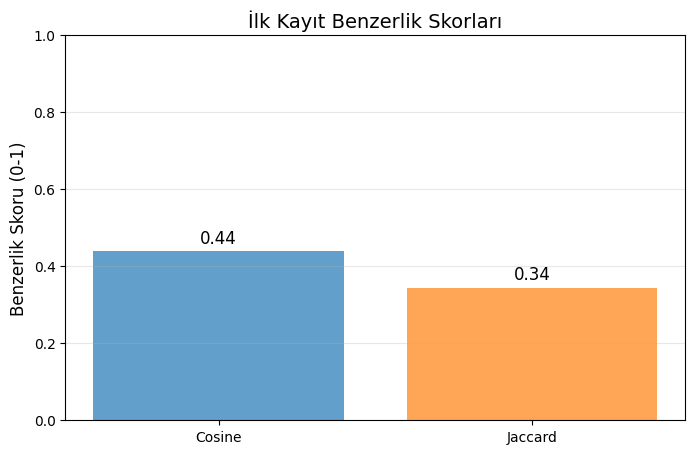

🔹 Ortak kelimeler: ['company', 'veya', 'Cevap', 'duygusal', 'sadece', "'positive'", "[{'role':", 'in', "'system',", "'neutral'", "{'role':", 'the', 'olmalıdır."},', "'content':", 'sınıflandır.', 'durumunu', '"Metnin', "'assistant',", "'user',", "{'messages':"]
🔹 Sadece gerçek veride: ['Gran', "'negative'veya", 'plans', 'move', 'growing,', 'but', 'no', 'where', 'all', 'hasNo', 'although', 'toMove', 'growing.', 'Gran."},', '"The', 'theCompany', 'Russia,', 'that', 'has', 'production']
🔹 Sadece sentetik veride: ["'The", 'EMEA', 'growth', '2024', "'negative'", 'revenue', "region.'},", '22%', 'Q4', 'reported', "'positive'}]}"]


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def stringify(x):
    return str(x)

def visualize_first_record_similarity(data1, data2):
    rec1 = stringify(data1[0])
    rec2 = stringify(data2[0])

    # Cosine Similarity (TF-IDF)
    vect = TfidfVectorizer().fit([rec1, rec2])
    tfidf = vect.transform([rec1, rec2])
    cos_sim = cosine_similarity(tfidf[0], tfidf[1])[0,0]

    # Jaccard Similarity (kelime setleri)
    set1, set2 = set(rec1.split()), set(rec2.split())
    jaccard = len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0

    plt.figure(figsize=(8,5))
    plt.bar(["Cosine", "Jaccard"], [cos_sim, jaccard], color=["tab:blue","tab:orange"], alpha=0.7)
    plt.ylim(0,1)
    plt.title("İlk Kayıt Benzerlik Skorları", fontsize=14)
    plt.ylabel("Benzerlik Skoru (0-1)", fontsize=12)
    for i, v in enumerate([cos_sim, jaccard]):
        plt.text(i, v+0.02, f"{v:.2f}", ha="center", fontsize=12)
    plt.grid(axis="y", alpha=0.3)
    plt.show()

    ortak = set1 & set2
    fark1 = set1 - set2
    fark2 = set2 - set1

    print("🔹 Ortak kelimeler:", list(ortak)[:20])
    print("🔹 Sadece gerçek veride:", list(fark1)[:20])
    print("🔹 Sadece sentetik veride:", list(fark2)[:20])

visualize_first_record_similarity(data1, data2)


📌 Orijinal veri kümesi satır sayısı: 3708
📌 www veya .com içeren satır sayısı: 138
📌 Temizlenmiş veri kümesi satır sayısı: 3570
✅ Temizlenmiş veri kümesi kaydedildi: /content/AllAgree_dataset_cleaned.jsonl


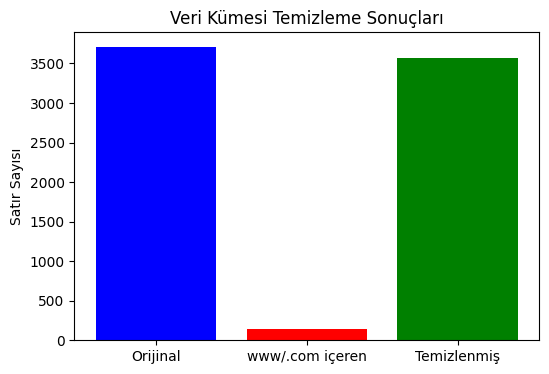

In [15]:
# İçinde "www" veya ".com" geçen satırları bulacağız. Bu satırları sayıp sileceğiz.

import json
import re
import matplotlib.pyplot as plt

input_file = "/content/AllAgree_dataset.jsonl"

data = []
with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        if not line.strip():
            continue
        entry = json.loads(line)
        data.append(entry)

print(f"📌 Orijinal veri kümesi satır sayısı: {len(data)}")

#  www veya .com içerenleri tespit et
pattern = re.compile(r"(www|\.com)", re.IGNORECASE)

matches = [entry for entry in data if pattern.search(str(entry))]
print(f"📌 www veya .com içeren satır sayısı: {len(matches)}")

# Temizleme
cleaned_data = [entry for entry in data if not pattern.search(str(entry))]
print(f"📌 Temizlenmiş veri kümesi satır sayısı: {len(cleaned_data)}")


output_file = "/content/AllAgree_dataset_cleaned.jsonl"
with open(output_file, "w", encoding="utf-8") as f:
    for entry in cleaned_data:
        f.write(json.dumps(entry, ensure_ascii=False) + "\n")

print(f"✅ Temizlenmiş veri kümesi kaydedildi: {output_file}")

plt.figure(figsize=(6,4))
plt.bar(["Orijinal", "www/.com içeren", "Temizlenmiş"],
        [len(data), len(matches), len(cleaned_data)],
        color=["blue", "red", "green"])
plt.title("Veri Kümesi Temizleme Sonuçları")
plt.ylabel("Satır Sayısı")
plt.show()


In [ ]:
!pip install deep-translator tqdm --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
import json

file_path = "/content/Translate_Özetlenmiş_CSV_JSON_DÖnüştü_dataset.json"

try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = [json.loads(line) for line in f]
        total_records = len(data)
        print(f"'{file_path}' dosyasındaki toplam kayıt sayısı: {total_records}")
except FileNotFoundError:
    print(f"Hata: '{file_path}' dosyası bulunamadı.")
except json.JSONDecodeError as e:
    print(f"Hata: Dosya çözümlenemedi (JSON format hatası): {e}")
except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")

'/content/Translate_Özetlenmiş_CSV_JSON_DÖnüştü_dataset.json' dosyasındaki toplam kayıt sayısı: 1098


In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import json
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

input_file = "/content/AllAgree_dataset.jsonl"

data = []
label2id = {
    "positive": 0,
    "neutral": 1,
    "negative": 2
}

with open(input_file, "r", encoding="utf-8") as f:
    for line_num, line in enumerate(f, 1):
        line = line.strip()
        if not line:
            continue
        try:
            entry = json.loads(line)
            messages = entry["messages"]

            user_content = None
            assistant_content = None

            for msg in messages:
                if msg["role"] == "user":
                    user_content = msg["content"]
                elif msg["role"] == "assistant":
                    assistant_content = msg["content"].strip().lower()

            if not user_content or not assistant_content:
                print(f"⚠️ Satır {line_num}: Eksik mesaj (user ya da assistant yok)")
                continue

            if assistant_content not in label2id:
                print(f"⚠️ Satır {line_num}: Bilinmeyen etiket: {assistant_content}")
                continue

            data.append({
                "text": user_content,
                "label": label2id[assistant_content]
            })

        except Exception as e:
            print(f"❌ Satır {line_num}: Hata → {e}")
            continue

print(f"✅ Toplam işlenen ve geçerli örnek sayısı: {len(data)}")

# Sınıf dağılımı
labels_str = ["positive", "neutral", "negative"]
counts = [sum(1 for d in data if d["label"] == i) for i in range(3)]
for lbl, cnt in zip(labels_str, counts):
    print(f"   {lbl}: {cnt}")

# Train ve Validation Bölme
labels = [d["label"] for d in data]
train_data, val_data = train_test_split(
    data, test_size=0.2, random_state=42, stratify=labels
)

train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)

print(f"✅ Eğitim veri sayısı: {len(train_dataset)}")
print(f"✅ Doğrulama veri sayısı: {len(val_dataset)}")

model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    id2label={i: lbl for lbl, i in label2id.items()},
    label2id=label2id
)


def tokenize(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=256,
        return_tensors=None
    )

train_tokenized = train_dataset.map(tokenize, batched=True)
val_tokenized = val_dataset.map(tokenize, batched=True)

# PyTorch formatına çevir
train_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Metrik Fonksiyonu
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    print("\n✅ Doğrulama Kümesi İçin Detaylı Sınıflandırma Raporu:")
    print(classification_report(labels, predictions, target_names=labels_str))
    return {"accuracy": acc}




from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir="./turkish-sentiment-chatformat",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    report_to="none",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    disable_tqdm=False,
    fp16=True,


)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


print("🚀 Eğitim başlatılıyor...")
train_result = trainer.train()
eval_result = trainer.evaluate()

print("✅ Eğitim tamamlandı.")
print(f"✅ Accuracy: {eval_result['eval_accuracy']:.4f}")
print(f"Eval Loss: {eval_result['eval_loss']:.4f}")

model.save_pretrained("finetuned_sentiment_tr_chatformat")
tokenizer.save_pretrained("finetuned_sentiment_tr_chatformat")
print("✅ Model 'finetuned_sentiment_tr_chatformat' klasörüne kaydedildi.")

✅ Toplam işlenen ve geçerli örnek sayısı: 3708
   positive: 1057
   neutral: 1858
   negative: 793
✅ Eğitim veri sayısı: 2966
✅ Doğrulama veri sayısı: 742


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2966 [00:00<?, ? examples/s]

Map:   0%|          | 0/742 [00:00<?, ? examples/s]

/tmp/ipython-input-3133909394.py:136: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': 2, 'bos_token_id': 1}.


🚀 Eğitim başlatılıyor...


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.163789,0.952830
2,No log,0.085708,0.982480
3,0.207200,0.090670,0.985175
4,0.207200,0.106279,0.982480
5,0.207200,0.069364,0.989218
6,0.015200,0.063685,0.990566
7,0.015200,0.065306,0.990566
8,0.015200,0.070706,0.989218
9,0.000500,0.069149,0.989218



✅ Doğrulama Kümesi İçin Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

    positive       0.86      1.00      0.93       211
     neutral       1.00      0.92      0.96       372
    negative       0.99      0.97      0.98       159

    accuracy                           0.95       742
   macro avg       0.95      0.96      0.95       742
weighted avg       0.96      0.95      0.95       742


✅ Doğrulama Kümesi İçin Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

    positive       1.00      0.97      0.98       211
     neutral       1.00      0.98      0.99       372
    negative       0.93      0.99      0.96       159

    accuracy                           0.98       742
   macro avg       0.97      0.98      0.98       742
weighted avg       0.98      0.98      0.98       742


✅ Doğrulama Kümesi İçin Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

    positive      


✅ Doğrulama Kümesi İçin Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

    positive       0.99      0.99      0.99       211
     neutral       1.00      0.99      1.00       372
    negative       0.97      0.99      0.98       159

    accuracy                           0.99       742
   macro avg       0.99      0.99      0.99       742
weighted avg       0.99      0.99      0.99       742

✅ Eğitim tamamlandı.
✅ Accuracy: 0.9906
Eval Loss: 0.0637
✅ Model 'finetuned_sentiment_tr_chatformat' klasörüne kaydedildi.


In [18]:
!zip -r /content/finetuned_sentimenttr_chatformat.zip /content/finetuned_sentiment_tr_chatformat

  adding: content/finetuned_sentiment_tr_chatformat/ (stored 0%)
  adding: content/finetuned_sentiment_tr_chatformat/tokenizer.json (deflated 77%)
  adding: content/finetuned_sentiment_tr_chatformat/spm.model (deflated 50%)
  adding: content/finetuned_sentiment_tr_chatformat/model.safetensors (deflated 21%)
  adding: content/finetuned_sentiment_tr_chatformat/config.json (deflated 56%)
  adding: content/finetuned_sentiment_tr_chatformat/tokenizer_config.json (deflated 73%)
  adding: content/finetuned_sentiment_tr_chatformat/special_tokens_map.json (deflated 50%)
  adding: content/finetuned_sentiment_tr_chatformat/added_tokens.json (stored 0%)


In [17]:
from transformers import pipeline
from tabulate import tabulate
import textwrap


classifier = pipeline(
    "text-classification",
    model="finetuned_sentiment_tr_chatformat",
    tokenizer="finetuned_sentiment_tr_chatformat"
)

# Çeviri Pipeline İngilizce Dilinden Türkçe diline erişilebilir bir model oluşturma
translator = pipeline("translation", model="ckartal/english-to-turkish-finetuned-model")

# İngilizce Haberler Listesi
haberler_en = [
    "The company announced record profits for 2024 and will pay dividends per share.",
    "The board of directors resigned and an audit process has been initiated.",
    "A new investment project was approved, increasing production capacity by 30%.",
    "The company's debt has significantly increased, raising liquidity concerns.",
    "The stock price dropped 50%, and analysts issued panic warnings.",
    "A government-backed development plan was launched to boost the economy.",
    "The firm is operating at a loss and is negotiating new financing options.",
    "A merger decision was announced, and shareholders will vote next month.",
    "The EU investment will create new jobs in the region.",
    "Workers went on strike, bringing production to a halt.",
    "A new product launch attracted huge demand with record pre-orders.",
    "Foreign exchange rates soared, exporters complained about rising costs.",
    "The Central Bank cut interest rates by 5%, sparking market activity.",
    "The company announced plans to open a new factory in the US.",
    "The audit report was negative and an administrative fine was imposed.",
    "A strategic partnership agreement was signed and will start next month.",
    "The credit rating was downgraded, leading investors to pull back.",
    "A new management team was appointed and announced a transformation plan.",
    "The logistics company reported stable revenue in line with expectations.",
    "Analysts upgraded the chipmaker to 'buy' after strong quarterly results."
]

sonuclar = []
for i, haber in enumerate(haberler_en, 1):
    sonuc = classifier(haber)[0]
    turkce = translator(haber, max_length=200)[0]['translation_text']
    sonuclar.append([
        i,
        turkce,
        sonuc['label'].upper(),
        f"{sonuc['score']:.4f}"
    ])

def wrap_text(text, width=60):
    return "\n".join(textwrap.fill(line, width) for line in text.split("\n"))

wrapped = [[r[0], wrap_text(r[1]), r[2], r[3]] for r in sonuclar]

# Tablo Oluşturma
table = tabulate(
    wrapped,
    headers=["#", "Haber (Türkçe Çeviri)", "Tahmin (Etiket)", "Güven Skoru"],
    tablefmt="fancy_grid",
    maxcolwidths=[None, 60, None, None],
    stralign=["center", "left", "center", "center"]
)

output_file = "finansal_haber_duygu_analizi_TR_tablo.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.write("="*100 + "\n")
    f.write("📊 İNGİLİZCE HABERLER → TÜRKÇE ÇEVİRİ TABLOSU (DUYGU ANALİZİ SONUÇLARI)\n")
    f.write("="*100 + "\n")
    f.write(table)

print(f"✅ Tablo '{output_file}' dosyasına kaydedildi.")


Device set to use cuda:0


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/300M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/794k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/838k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


✅ Tablo 'finansal_haber_duygu_analizi_TR_tablo.txt' dosyasına kaydedildi.
